In [1]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
  data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
  data.loc[data['Signal'] == 'buy', 'Signal'] = 0
  data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
  data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
  return data

def add_shift_day(data,day):
  r_list = []
  for i in range(day,len(data)):#Number mean day to shift
    r_list.append(data[i-day : i])
  return np.array(r_list)



In [2]:
datalist = [f for f in glob.glob("Dataset/*.csv")]
print('have stock = ',len(datalist))


have stock =  60


In [3]:
#validation 
val_list = []
for val_name in range(50,55):
  df = pd.read_csv(datalist[val_name])
  val_x = df[['MACD-SL_n','DMI_n','Close_n','Signal']]
  # val_x = add_shift_day(val_x,30)
  val_list.append(val_x)

#test
test_list = []
for test_name in range(55,60):
  df = pd.read_csv(datalist[test_name])
  test = df[['MACD-SL_n','DMI_n','Close_n','Signal']]
  # test = add_shift_day(test,30)
  test_list.append(test)


In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=((30,3))))
model.add(Dense(5,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('Model/lstm_model5.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = False)



Epoch 1/250
90/94 [===========================>..] - ETA: 0s - loss: 0.8759 - acc: 0.6781
Epoch 00001: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 19ms/step - loss: 0.8821 - acc: 0.6752 - val_loss: 0.8930 - val_acc: 0.6546
Epoch 2/250
92/94 [============================>.] - ETA: 0s - loss: 0.7752 - acc: 0.7245
Epoch 00002: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.7751 - acc: 0.7254 - val_loss: 0.8912 - val_acc: 0.6650
Epoch 3/250
92/94 [============================>.] - ETA: 0s - loss: 0.7644 - acc: 0.7245
Epoch 00003: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.7640 - acc: 0.7254 - val_loss: 0.8915 - val_acc: 0.6650
Epoch 4/250
93/94 [============================>.] - ETA: 0s - loss: 0.7618 - acc: 0.7238
Epoch 00004: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.7608 - acc: 0.72

Epoch 32/250
92/94 [============================>.] - ETA: 0s - loss: 0.5673 - acc: 0.7551
Epoch 00032: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.5648 - acc: 0.7571 - val_loss: 0.7854 - val_acc: 0.6554
Epoch 33/250
90/94 [===========================>..] - ETA: 0s - loss: 0.5644 - acc: 0.7708
Epoch 00033: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.5663 - acc: 0.7685 - val_loss: 0.7607 - val_acc: 0.6715
Epoch 34/250
94/94 [==============================] - ETA: 0s - loss: 0.5543 - acc: 0.7705- ETA: 0s - loss: 0.4733 
Epoch 00034: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.5543 - acc: 0.7705 - val_loss: 0.8203 - val_acc: 0.6446
Epoch 35/250
94/94 [==============================] - ETA: 0s - loss: 0.5522 - acc: 0.7685
Epoch 00035: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/st

93/94 [============================>.] - ETA: 0s - loss: 0.4453 - acc: 0.8175
Epoch 00063: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 19ms/step - loss: 0.4473 - acc: 0.8169 - val_loss: 0.9195 - val_acc: 0.6083
Epoch 64/250
92/94 [============================>.] - ETA: 0s - loss: 0.4498 - acc: 0.8200
Epoch 00064: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.4459 - acc: 0.8219 - val_loss: 0.8933 - val_acc: 0.6446
Epoch 65/250
90/94 [===========================>..] - ETA: 0s - loss: 0.4258 - acc: 0.8313
Epoch 00065: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 19ms/step - loss: 0.4226 - acc: 0.8329 - val_loss: 0.8924 - val_acc: 0.6542
Epoch 66/250
93/94 [============================>.] - ETA: 0s - loss: 0.4111 - acc: 0.8384
Epoch 00066: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.4097 - acc: 0.8390 - val_

90/94 [===========================>..] - ETA: 0s - loss: 0.2827 - acc: 0.8726
Epoch 00094: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.2815 - acc: 0.8727 - val_loss: 1.1232 - val_acc: 0.6492
Epoch 95/250
91/94 [============================>.] - ETA: 0s - loss: 0.2599 - acc: 0.8922
Epoch 00095: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.2612 - acc: 0.8904 - val_loss: 1.1376 - val_acc: 0.6530
Epoch 96/250
90/94 [===========================>..] - ETA: 0s - loss: 0.2794 - acc: 0.8799
Epoch 00096: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.2792 - acc: 0.8807 - val_loss: 1.2234 - val_acc: 0.5871
Epoch 97/250
91/94 [============================>.] - ETA: 0s - loss: 0.2564 - acc: 0.8932
Epoch 00097: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.2640 - acc: 0.8891 - val_

90/94 [===========================>..] - ETA: 0s - loss: 0.1720 - acc: 0.9240
Epoch 00125: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.1760 - acc: 0.9222 - val_loss: 1.4285 - val_acc: 0.6203
Epoch 126/250
90/94 [===========================>..] - ETA: 0s - loss: 0.2152 - acc: 0.9201
Epoch 00126: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.2180 - acc: 0.9188 - val_loss: 1.5916 - val_acc: 0.5910
Epoch 127/250
91/94 [============================>.] - ETA: 0s - loss: 0.1736 - acc: 0.9255
Epoch 00127: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.1747 - acc: 0.9252 - val_loss: 1.4917 - val_acc: 0.6253
Epoch 128/250
91/94 [============================>.] - ETA: 0s - loss: 0.1267 - acc: 0.9509
Epoch 00128: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.1301 - acc: 0.9499 - v

91/94 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.9773
Epoch 00156: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0596 - acc: 0.9773 - val_loss: 1.7672 - val_acc: 0.6149
Epoch 157/250
92/94 [============================>.] - ETA: 0s - loss: 0.0554 - acc: 0.9776
Epoch 00157: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.0553 - acc: 0.9776 - val_loss: 1.7376 - val_acc: 0.6291
Epoch 158/250
91/94 [============================>.] - ETA: 0s - loss: 0.0760 - acc: 0.9677
Epoch 00158: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.0755 - acc: 0.9683 - val_loss: 1.8301 - val_acc: 0.6103
Epoch 159/250
90/94 [===========================>..] - ETA: 0s - loss: 0.0587 - acc: 0.9785
Epoch 00159: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0599 - acc: 0.9776 - v

Epoch 187/250
91/94 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9873
Epoch 00187: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0473 - acc: 0.9873 - val_loss: 1.7635 - val_acc: 0.6191
Epoch 188/250
90/94 [===========================>..] - ETA: 0s - loss: 0.0354 - acc: 0.9937
Epoch 00188: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0354 - acc: 0.9933 - val_loss: 1.8188 - val_acc: 0.6172
Epoch 189/250
91/94 [============================>.] - ETA: 0s - loss: 0.0342 - acc: 0.9914- ETA: 0s - loss: 0.0367 - acc: 0.99
Epoch 00189: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0347 - acc: 0.9910 - val_loss: 1.8609 - val_acc: 0.6160
Epoch 190/250
91/94 [============================>.] - ETA: 0s - loss: 0.0474 - acc: 0.9828- ETA: 0s - loss: 0.0618 - ac
Epoch 00190: saving model to Model\lstm_model5.h5
94/94 [

Epoch 218/250
91/94 [============================>.] - ETA: 0s - loss: 0.0301 - acc: 0.9924
Epoch 00218: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.0345 - acc: 0.9906 - val_loss: 1.9526 - val_acc: 0.6106
Epoch 219/250
90/94 [===========================>..] - ETA: 0s - loss: 0.0859 - acc: 0.9684
Epoch 00219: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.0896 - acc: 0.9669 - val_loss: 1.8967 - val_acc: 0.6149
Epoch 220/250
90/94 [===========================>..] - ETA: 0s - loss: 0.1067 - acc: 0.9618
Epoch 00220: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.1334 - acc: 0.9566 - val_loss: 1.8644 - val_acc: 0.6153
Epoch 221/250
91/94 [============================>.] - ETA: 0s - loss: 0.1127 - acc: 0.9509
Epoch 00221: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 16ms/step - loss: 0.1156 - a

91/94 [============================>.] - ETA: 0s - loss: 0.0169 - acc: 0.9966
Epoch 00249: saving model to Model\lstm_model5.h5
94/94 [==============================] - 1s 15ms/step - loss: 0.0171 - acc: 0.9963 - val_loss: 1.9738 - val_acc: 0.6330
Epoch 250/250
93/94 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9946
Epoch 00250: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.0170 - acc: 0.9947 - val_loss: 2.0345 - val_acc: 0.6245


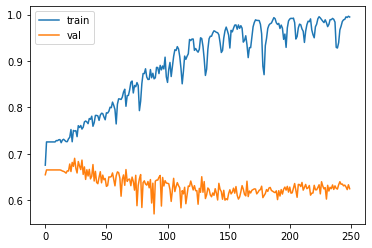

Epoch 1/250
70/70 [==============================] - ETA: 0s - loss: 1.3335 - acc: 0.7092
Epoch 00001: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 1.3335 - acc: 0.7092 - val_loss: 1.6292 - val_acc: 0.6496
Epoch 2/250
68/70 [============================>.] - ETA: 0s - loss: 0.7725 - acc: 0.7748
Epoch 00002: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.7613 - acc: 0.7767 - val_loss: 1.2961 - val_acc: 0.6465
Epoch 3/250
70/70 [==============================] - ETA: 0s - loss: 0.6152 - acc: 0.7745
Epoch 00003: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.6152 - acc: 0.7745 - val_loss: 1.1661 - val_acc: 0.6392
Epoch 4/250
66/70 [===========================>..] - ETA: 0s - loss: 0.5341 - acc: 0.7675
Epoch 00004: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.5535 - acc: 0.76

66/70 [===========================>..] - ETA: 0s - loss: 0.2402 - acc: 0.8973
Epoch 00032: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.2355 - acc: 0.8986 - val_loss: 1.8665 - val_acc: 0.5478
Epoch 33/250
66/70 [===========================>..] - ETA: 0s - loss: 0.2560 - acc: 0.8925
Epoch 00033: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.2573 - acc: 0.8928 - val_loss: 1.7754 - val_acc: 0.5902
Epoch 34/250
66/70 [===========================>..] - ETA: 0s - loss: 0.2764 - acc: 0.8802- ETA: 0s - loss: 0.3049 - acc: 0.8
Epoch 00034: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.2921 - acc: 0.8794 - val_loss: 1.5788 - val_acc: 0.6249
Epoch 35/250
70/70 [==============================] - ETA: 0s - loss: 0.3210 - acc: 0.8490
Epoch 00035: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step 

69/70 [============================>.] - ETA: 0s - loss: 0.1084 - acc: 0.9638
Epoch 00063: saving model to Model\lstm_model5.h5
70/70 [==============================] - 2s 28ms/step - loss: 0.1069 - acc: 0.9643 - val_loss: 2.1437 - val_acc: 0.5393
Epoch 64/250
70/70 [==============================] - ETA: 0s - loss: 0.0791 - acc: 0.9754
Epoch 00064: saving model to Model\lstm_model5.h5
70/70 [==============================] - 2s 23ms/step - loss: 0.0791 - acc: 0.9754 - val_loss: 2.2070 - val_acc: 0.5301
Epoch 65/250
66/70 [===========================>..] - ETA: 0s - loss: 0.0769 - acc: 0.9754
Epoch 00065: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0737 - acc: 0.9768 - val_loss: 2.2101 - val_acc: 0.5270
Epoch 66/250
69/70 [============================>.] - ETA: 0s - loss: 0.0800 - acc: 0.9764
Epoch 00066: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.0790 - acc: 0.9768 - val_

Epoch 95/250
66/70 [===========================>..] - ETA: 0s - loss: 0.0323 - acc: 0.9938
Epoch 00095: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0343 - acc: 0.9933 - val_loss: 2.4277 - val_acc: 0.5197
Epoch 96/250
70/70 [==============================] - ETA: 0s - loss: 0.0266 - acc: 0.9946
Epoch 00096: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0266 - acc: 0.9946 - val_loss: 2.4407 - val_acc: 0.5258
Epoch 97/250
68/70 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9931
Epoch 00097: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0297 - acc: 0.9929 - val_loss: 2.5284 - val_acc: 0.5146
Epoch 98/250
68/70 [============================>.] - ETA: 0s - loss: 0.0304 - acc: 0.9885
Epoch 00098: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0324 - acc: 

67/70 [===========================>..] - ETA: 0s - loss: 0.0195 - acc: 0.9977
Epoch 00126: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0191 - acc: 0.9978 - val_loss: 2.2742 - val_acc: 0.5856
Epoch 127/250
70/70 [==============================] - ETA: 0s - loss: 0.0176 - acc: 0.9982
Epoch 00127: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0176 - acc: 0.9982 - val_loss: 2.3087 - val_acc: 0.5918
Epoch 128/250
69/70 [============================>.] - ETA: 0s - loss: 0.0151 - acc: 0.9982- ETA: 0s - loss: 0.0095 - 
Epoch 00128: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0149 - acc: 0.9982 - val_loss: 2.3471 - val_acc: 0.5883
Epoch 129/250
66/70 [===========================>..] - ETA: 0s - loss: 0.0122 - acc: 0.9995
Epoch 00129: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - los

Epoch 157/250
70/70 [==============================] - ETA: 0s - loss: 0.1170 - acc: 0.9634
Epoch 00157: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.1170 - acc: 0.9634 - val_loss: 2.4566 - val_acc: 0.5621
Epoch 158/250
69/70 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9620
Epoch 00158: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.1103 - acc: 0.9625 - val_loss: 2.3141 - val_acc: 0.5837
Epoch 159/250
70/70 [==============================] - ETA: 0s - loss: 0.0932 - acc: 0.9665
Epoch 00159: saving model to Model\lstm_model5.h5
70/70 [==============================] - 2s 24ms/step - loss: 0.0932 - acc: 0.9665 - val_loss: 2.3618 - val_acc: 0.5547
Epoch 160/250
67/70 [===========================>..] - ETA: 0s - loss: 0.1571 - acc: 0.9496
Epoch 00160: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 20ms/step - loss: 0.1573 - a

68/70 [============================>.] - ETA: 0s - loss: 0.0209 - acc: 0.9968
Epoch 00188: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 20ms/step - loss: 0.0230 - acc: 0.9964 - val_loss: 2.4501 - val_acc: 0.5424
Epoch 189/250
70/70 [==============================] - ETA: 0s - loss: 0.0151 - acc: 0.9978
Epoch 00189: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0151 - acc: 0.9978 - val_loss: 2.4765 - val_acc: 0.5412
Epoch 190/250
68/70 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9995
Epoch 00190: saving model to Model\lstm_model5.h5
70/70 [==============================] - 2s 24ms/step - loss: 0.0145 - acc: 0.9991 - val_loss: 2.4923 - val_acc: 0.5436
Epoch 191/250
70/70 [==============================] - ETA: 0s - loss: 0.0115 - acc: 0.9996
Epoch 00191: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 17ms/step - loss: 0.0115 - acc: 0.9996 - v

Epoch 219/250
69/70 [============================>.] - ETA: 0s - loss: 0.0195 - acc: 0.9946
Epoch 00219: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 19ms/step - loss: 0.0193 - acc: 0.9946 - val_loss: 2.4937 - val_acc: 0.5501
Epoch 220/250
70/70 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.9982
Epoch 00220: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0122 - acc: 0.9982 - val_loss: 2.5271 - val_acc: 0.5528
Epoch 221/250
68/70 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9991
Epoch 00221: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0099 - acc: 0.9991 - val_loss: 2.5751 - val_acc: 0.5486
Epoch 222/250
67/70 [===========================>..] - ETA: 0s - loss: 0.0078 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0076 - a

66/70 [===========================>..] - ETA: 0s - loss: 0.0306 - acc: 0.9943
Epoch 00250: saving model to Model\lstm_model5.h5
70/70 [==============================] - 1s 18ms/step - loss: 0.0294 - acc: 0.9946 - val_loss: 2.3062 - val_acc: 0.5409


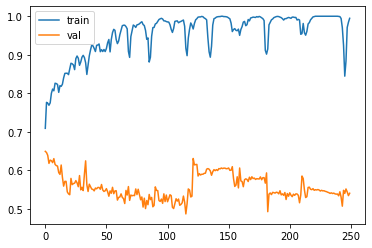

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 0.8962 - acc: 0.7922
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.9091 - acc: 0.7891 - val_loss: 1.3744 - val_acc: 0.6569
Epoch 2/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5639 - acc: 0.8308
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5591 - acc: 0.8317 - val_loss: 1.0684 - val_acc: 0.6735
Epoch 3/250
78/78 [==============================] - ETA: 0s - loss: 0.4615 - acc: 0.8445
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4615 - acc: 0.8445 - val_loss: 1.0426 - val_acc: 0.6773
Epoch 4/250
76/78 [============================>.] - ETA: 0s - loss: 0.4109 - acc: 0.8623
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.4122 - acc: 0.86

Epoch 32/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1421 - acc: 0.9525
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.1378 - acc: 0.9542 - val_loss: 1.3805 - val_acc: 0.6715
Epoch 33/250
76/78 [============================>.] - ETA: 0s - loss: 0.0978 - acc: 0.9688
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0959 - acc: 0.9695 - val_loss: 1.4571 - val_acc: 0.6677
Epoch 34/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1008 - acc: 0.9696
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0977 - acc: 0.9707 - val_loss: 1.5341 - val_acc: 0.6546
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0925 - acc: 0.9708
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0897 - acc: 

74/78 [===========================>..] - ETA: 0s - loss: 0.0667 - acc: 0.9814
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0638 - acc: 0.9823 - val_loss: 1.6898 - val_acc: 0.6496
Epoch 64/250
76/78 [============================>.] - ETA: 0s - loss: 0.0425 - acc: 0.9905
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0417 - acc: 0.9908 - val_loss: 1.7135 - val_acc: 0.6530
Epoch 65/250
78/78 [==============================] - ETA: 0s - loss: 0.0306 - acc: 0.9944
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0306 - acc: 0.9944 - val_loss: 1.7831 - val_acc: 0.6500
Epoch 66/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0271 - acc: 0.9946
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0263 - acc: 0.9948 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.0191 - acc: 0.9971
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0185 - acc: 0.9972 - val_loss: 1.9600 - val_acc: 0.6608
Epoch 95/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0197 - acc: 0.9962
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0189 - acc: 0.9964 - val_loss: 1.9947 - val_acc: 0.6596
Epoch 96/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0134 - acc: 0.9975
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0130 - acc: 0.9976 - val_loss: 1.9868 - val_acc: 0.6596
Epoch 97/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0134 - acc: 0.9962
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0130 - acc: 0.9964 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.0813 - acc: 0.9692
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0785 - acc: 0.9703 - val_loss: 1.9022 - val_acc: 0.6550
Epoch 126/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0384 - acc: 0.9867
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0371 - acc: 0.9871 - val_loss: 1.9602 - val_acc: 0.6573
Epoch 127/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0154 - acc: 0.9958
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0150 - acc: 0.9960 - val_loss: 2.0108 - val_acc: 0.6646
Epoch 128/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0111 - acc: 0.9983
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0107 - acc: 0.9984 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9988
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0070 - acc: 0.9988 - val_loss: 2.2468 - val_acc: 0.6619
Epoch 157/250
76/78 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9844
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0573 - acc: 0.9847 - val_loss: 2.3664 - val_acc: 0.6369
Epoch 158/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0587 - acc: 0.9821
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0567 - acc: 0.9827 - val_loss: 2.3348 - val_acc: 0.6515
Epoch 159/250
78/78 [==============================] - ETA: 0s - loss: 0.0836 - acc: 0.9739
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0836 - acc: 0.9739 - v

76/78 [============================>.] - ETA: 0s - loss: 0.1214 - acc: 0.9650
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.1241 - acc: 0.9630 - val_loss: 1.9237 - val_acc: 0.6396
Epoch 188/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0434 - acc: 0.9854
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0441 - acc: 0.9851 - val_loss: 1.8985 - val_acc: 0.6442
Epoch 189/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0227 - acc: 0.9958
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0219 - acc: 0.9960 - val_loss: 1.9143 - val_acc: 0.6488
Epoch 190/250
76/78 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9984
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0151 - acc: 0.9984 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.4724 - val_acc: 0.6446
Epoch 219/250
76/78 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9971
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0085 - acc: 0.9972 - val_loss: 2.5084 - val_acc: 0.6484
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.2332 - acc: 0.9391
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.2281 - acc: 0.9405 - val_loss: 2.1133 - val_acc: 0.6507
Epoch 221/250
76/78 [============================>.] - ETA: 0s - loss: 0.4095 - acc: 0.8754
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.4030 - acc: 0.8775 - v

Epoch 249/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1357 - acc: 0.9654  - ETA: 0s - loss: 0.1560 - 
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.1333 - acc: 0.9658 - val_loss: 2.2899 - val_acc: 0.6557
Epoch 250/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1406 - acc: 0.9617
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1448 - acc: 0.9610 - val_loss: 2.0261 - val_acc: 0.6708


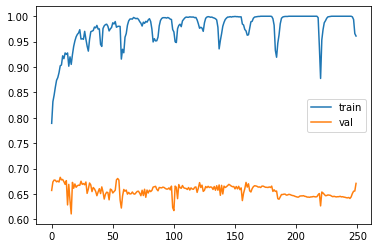

Epoch 1/250
76/78 [============================>.] - ETA: 0s - loss: 0.5414 - acc: 0.8787
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.5479 - acc: 0.8763 - val_loss: 2.1526 - val_acc: 0.6715
Epoch 2/250
76/78 [============================>.] - ETA: 0s - loss: 0.4215 - acc: 0.9215
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.4225 - acc: 0.9213 - val_loss: 1.7685 - val_acc: 0.6681
Epoch 3/250
76/78 [============================>.] - ETA: 0s - loss: 0.3134 - acc: 0.9256
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.3155 - acc: 0.9249 - val_loss: 1.5732 - val_acc: 0.6681
Epoch 4/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2408 - acc: 0.9317
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.2418 - acc: 0.93

75/78 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9871
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0453 - acc: 0.9867 - val_loss: 1.7627 - val_acc: 0.6469
Epoch 33/250
76/78 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9918
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0365 - acc: 0.9912 - val_loss: 1.7761 - val_acc: 0.6519
Epoch 34/250
76/78 [============================>.] - ETA: 0s - loss: 0.0339 - acc: 0.9918- ETA: 0s - loss: 0.0358 - acc: 0.991
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0349 - acc: 0.9916 - val_loss: 1.8144 - val_acc: 0.6469
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0290 - acc: 0.9921
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/ste

77/78 [============================>.] - ETA: 0s - loss: 0.0124 - acc: 0.9968
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0123 - acc: 0.9968 - val_loss: 2.2715 - val_acc: 0.6488
Epoch 64/250
78/78 [==============================] - ETA: 0s - loss: 0.0180 - acc: 0.9912
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0180 - acc: 0.9912 - val_loss: 2.2913 - val_acc: 0.6473
Epoch 65/250
78/78 [==============================] - ETA: 0s - loss: 0.0633 - acc: 0.9819
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0633 - acc: 0.9819 - val_loss: 2.3090 - val_acc: 0.6488
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9830
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0779 - acc: 0.9827 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.0080 - acc: 0.9988
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 21ms/step - loss: 0.0079 - acc: 0.9988 - val_loss: 2.1828 - val_acc: 0.6423
Epoch 95/250
77/78 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9992
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0069 - acc: 0.9992 - val_loss: 2.2607 - val_acc: 0.6438
Epoch 96/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.9992
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0056 - acc: 0.9992 - val_loss: 2.2606 - val_acc: 0.6415
Epoch 97/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.9996
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0051 - acc: 0.9996 - val_

Epoch 125/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9996
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0049 - acc: 0.9992 - val_loss: 2.3708 - val_acc: 0.6403
Epoch 126/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9996
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0060 - acc: 0.9988 - val_loss: 2.4128 - val_acc: 0.6388
Epoch 127/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0029 - acc: 0.9996
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0030 - acc: 0.9996 - val_loss: 2.4103 - val_acc: 0.6376
Epoch 128/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9992
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0033 - a

76/78 [============================>.] - ETA: 0s - loss: 0.0192 - acc: 0.9930
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0205 - acc: 0.9928 - val_loss: 2.3859 - val_acc: 0.6338
Epoch 157/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0312 - acc: 0.9917
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0318 - acc: 0.9916 - val_loss: 2.3397 - val_acc: 0.6507
Epoch 158/250
76/78 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9975
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0190 - acc: 0.9956 - val_loss: 2.4229 - val_acc: 0.6507
Epoch 159/250
77/78 [============================>.] - ETA: 0s - loss: 0.0101 - acc: 0.9963
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0101 - acc: 0.9964 - v

Epoch 187/250
75/78 [===========================>..] - ETA: 0s - loss: 9.6037e-04 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 9.5225e-04 - acc: 1.0000 - val_loss: 2.6473 - val_acc: 0.6446
Epoch 188/250
76/78 [============================>.] - ETA: 0s - loss: 9.0297e-04 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 9.0441e-04 - acc: 1.0000 - val_loss: 2.6626 - val_acc: 0.6438
Epoch 189/250
76/78 [============================>.] - ETA: 0s - loss: 8.5838e-04 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 8.5985e-04 - acc: 1.0000 - val_loss: 2.6776 - val_acc: 0.6438
Epoch 190/250
76/78 [============================>.] - ETA: 0s - loss: 8.1682e-04 - acc: 1.0000
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 

76/78 [============================>.] - ETA: 0s - loss: 2.6846e-04 - acc: 1.0000
Epoch 00217: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 2.6979e-04 - acc: 1.0000 - val_loss: 3.0561 - val_acc: 0.6430
Epoch 218/250
74/78 [===========================>..] - ETA: 0s - loss: 2.6314e-04 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 2.6022e-04 - acc: 1.0000 - val_loss: 3.0688 - val_acc: 0.6426
Epoch 219/250
76/78 [============================>.] - ETA: 0s - loss: 2.4974e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 2.5104e-04 - acc: 1.0000 - val_loss: 3.0814 - val_acc: 0.6430
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 2.4095e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - lo

Epoch 248/250
76/78 [============================>.] - ETA: 0s - loss: 9.1895e-05 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 9.2632e-05 - acc: 1.0000 - val_loss: 3.4413 - val_acc: 0.6453
Epoch 249/250
76/78 [============================>.] - ETA: 0s - loss: 8.8834e-05 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 8.9554e-05 - acc: 1.0000 - val_loss: 3.4537 - val_acc: 0.6453
Epoch 250/250
75/78 [===========================>..] - ETA: 0s - loss: 8.6625e-05 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 8.6577e-05 - acc: 1.0000 - val_loss: 3.4660 - val_acc: 0.6449


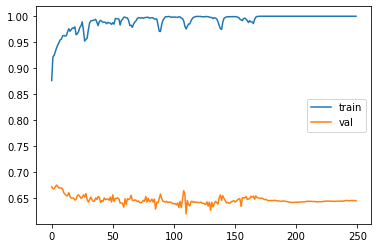

Epoch 1/250
91/95 [===========================>..] - ETA: 0s - loss: 2.1352 - acc: 0.6405
Epoch 00001: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 16ms/step - loss: 2.0550 - acc: 0.6534 - val_loss: 2.0668 - val_acc: 0.6480
Epoch 2/250
95/95 [==============================] - ETA: 0s - loss: 1.1518 - acc: 0.7487
Epoch 00002: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 1.1518 - acc: 0.7487 - val_loss: 1.7898 - val_acc: 0.6569
Epoch 3/250
95/95 [==============================] - ETA: 0s - loss: 0.9263 - acc: 0.7484
Epoch 00003: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.9263 - acc: 0.7484 - val_loss: 1.7141 - val_acc: 0.6550
Epoch 4/250
91/95 [===========================>..] - ETA: 0s - loss: 0.8398 - acc: 0.7383- ETA: 0s - loss: 0.8352 - acc: 0.735
Epoch 00004: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s

Epoch 32/250
91/95 [===========================>..] - ETA: 0s - loss: 0.4379 - acc: 0.7981
Epoch 00032: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.4256 - acc: 0.8061 - val_loss: 1.6382 - val_acc: 0.6442
Epoch 33/250
91/95 [===========================>..] - ETA: 0s - loss: 0.4385 - acc: 0.8012
Epoch 00033: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.4259 - acc: 0.8090 - val_loss: 1.6666 - val_acc: 0.6449
Epoch 34/250
91/95 [===========================>..] - ETA: 0s - loss: 0.4357 - acc: 0.7977
Epoch 00034: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.4231 - acc: 0.8057 - val_loss: 1.7095 - val_acc: 0.6415
Epoch 35/250
91/95 [===========================>..] - ETA: 0s - loss: 0.4496 - acc: 0.8039
Epoch 00035: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.4364 - acc: 

91/95 [===========================>..] - ETA: 0s - loss: 0.2641 - acc: 0.9011
Epoch 00063: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.2552 - acc: 0.9050 - val_loss: 1.9443 - val_acc: 0.6218
Epoch 64/250
91/95 [===========================>..] - ETA: 0s - loss: 0.2488 - acc: 0.9056
Epoch 00064: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.2401 - acc: 0.9093 - val_loss: 1.9621 - val_acc: 0.6214
Epoch 65/250
95/95 [==============================] - ETA: 0s - loss: 0.2515 - acc: 0.9083
Epoch 00065: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.2515 - acc: 0.9083 - val_loss: 1.9694 - val_acc: 0.6261
Epoch 66/250
91/95 [===========================>..] - ETA: 0s - loss: 0.2361 - acc: 0.9169
Epoch 00066: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.2278 - acc: 0.9202 - val_

91/95 [===========================>..] - ETA: 0s - loss: 0.1447 - acc: 0.9523
Epoch 00094: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 16ms/step - loss: 0.1394 - acc: 0.9542 - val_loss: 2.2303 - val_acc: 0.6241
Epoch 95/250
95/95 [==============================] - ETA: 0s - loss: 0.1745 - acc: 0.9462
Epoch 00095: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.1745 - acc: 0.9462 - val_loss: 2.1741 - val_acc: 0.6268
Epoch 96/250
91/95 [===========================>..] - ETA: 0s - loss: 0.2391 - acc: 0.9159
Epoch 00096: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.2310 - acc: 0.9192 - val_loss: 2.1526 - val_acc: 0.6187
Epoch 97/250
95/95 [==============================] - ETA: 0s - loss: 0.2377 - acc: 0.9152
Epoch 00097: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 16ms/step - loss: 0.2377 - acc: 0.9152 - val_

95/95 [==============================] - ETA: 0s - loss: 0.3295 - acc: 0.9070
Epoch 00125: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.3295 - acc: 0.9070 - val_loss: 2.2751 - val_acc: 0.5995
Epoch 126/250
91/95 [===========================>..] - ETA: 0s - loss: 0.2522 - acc: 0.9138
Epoch 00126: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.2426 - acc: 0.9172 - val_loss: 2.2829 - val_acc: 0.5933
Epoch 127/250
95/95 [==============================] - ETA: 0s - loss: 0.1570 - acc: 0.9492
Epoch 00127: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.1570 - acc: 0.9492 - val_loss: 2.3183 - val_acc: 0.5910
Epoch 128/250
91/95 [===========================>..] - ETA: 0s - loss: 0.1298 - acc: 0.9612
Epoch 00128: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.1250 - acc: 0.9627 - v

95/95 [==============================] - ETA: 0s - loss: 0.0614 - acc: 0.9792
Epoch 00156: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.0614 - acc: 0.9792 - val_loss: 2.3879 - val_acc: 0.6122
Epoch 157/250
91/95 [===========================>..] - ETA: 0s - loss: 0.0502 - acc: 0.9845
Epoch 00157: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.0483 - acc: 0.9852 - val_loss: 2.4301 - val_acc: 0.6103
Epoch 158/250
93/95 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9859
Epoch 00158: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.0472 - acc: 0.9861 - val_loss: 2.4284 - val_acc: 0.6133
Epoch 159/250
95/95 [==============================] - ETA: 0s - loss: 0.0424 - acc: 0.9881
Epoch 00159: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.0424 - acc: 0.9881 - v

93/95 [============================>.] - ETA: 0s - loss: 0.1643 - acc: 0.9459
Epoch 00187: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.1613 - acc: 0.9469 - val_loss: 2.5788 - val_acc: 0.5705
Epoch 188/250
93/95 [============================>.] - ETA: 0s - loss: 0.1273 - acc: 0.9553
Epoch 00188: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 19ms/step - loss: 0.1250 - acc: 0.9561 - val_loss: 2.6327 - val_acc: 0.5594
Epoch 189/250
95/95 [==============================] - ETA: 0s - loss: 0.1206 - acc: 0.9591
Epoch 00189: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.1206 - acc: 0.9591 - val_loss: 2.5825 - val_acc: 0.5598
Epoch 190/250
95/95 [==============================] - ETA: 0s - loss: 0.0653 - acc: 0.9786
Epoch 00190: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.0653 - acc: 0.9786 - v

Epoch 218/250
94/95 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9970
Epoch 00218: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 16ms/step - loss: 0.0128 - acc: 0.9970 - val_loss: 2.5656 - val_acc: 0.5968
Epoch 219/250
95/95 [==============================] - ETA: 0s - loss: 0.0103 - acc: 0.9980
Epoch 00219: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9980 - val_loss: 2.5900 - val_acc: 0.5944
Epoch 220/250
91/95 [===========================>..] - ETA: 0s - loss: 0.0142 - acc: 0.9959
Epoch 00220: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.0137 - acc: 0.9960 - val_loss: 2.6103 - val_acc: 0.5968
Epoch 221/250
93/95 [============================>.] - ETA: 0s - loss: 0.0155 - acc: 0.9956
Epoch 00221: saving model to Model\lstm_model5.h5
95/95 [==============================] - 1s 15ms/step - loss: 0.0152 - a

93/95 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9765
Epoch 00249: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 16ms/step - loss: 0.0860 - acc: 0.9769 - val_loss: 2.6481 - val_acc: 0.5736
Epoch 250/250
93/95 [============================>.] - ETA: 0s - loss: 0.0390 - acc: 0.9869
Epoch 00250: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0383 - acc: 0.9871 - val_loss: 2.6859 - val_acc: 0.5694


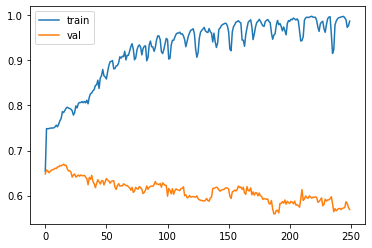

Epoch 1/250
76/78 [============================>.] - ETA: 0s - loss: 1.2501 - acc: 0.7023
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 22ms/step - loss: 1.2246 - acc: 0.7091 - val_loss: 1.5450 - val_acc: 0.6280
Epoch 2/250
76/78 [============================>.] - ETA: 0s - loss: 0.5180 - acc: 0.7956
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.5098 - acc: 0.8003 - val_loss: 1.4252 - val_acc: 0.6207
Epoch 3/250
76/78 [============================>.] - ETA: 0s - loss: 0.4389 - acc: 0.8183
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4319 - acc: 0.8224 - val_loss: 1.4800 - val_acc: 0.6137
Epoch 4/250
78/78 [==============================] - ETA: 0s - loss: 0.3906 - acc: 0.8381
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.3906 - acc: 0.83

78/78 [==============================] - ETA: 0s - loss: 0.1066 - acc: 0.9590
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1066 - acc: 0.9590 - val_loss: 2.0758 - val_acc: 0.5968
Epoch 33/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0905 - acc: 0.9654
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0863 - acc: 0.9671 - val_loss: 2.0946 - val_acc: 0.5960
Epoch 34/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0776 - acc: 0.9700
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0750 - acc: 0.9711 - val_loss: 2.0991 - val_acc: 0.6083
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0984 - acc: 0.9667
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0951 - acc: 0.9679 - val_

77/78 [============================>.] - ETA: 0s - loss: 0.0187 - acc: 0.9972
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0185 - acc: 0.9972 - val_loss: 2.1541 - val_acc: 0.6608
Epoch 64/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0186 - acc: 0.9949
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0178 - acc: 0.9952 - val_loss: 2.1563 - val_acc: 0.6550
Epoch 65/250
76/78 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9947
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0214 - acc: 0.9948 - val_loss: 2.2025 - val_acc: 0.6588
Epoch 66/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0240 - acc: 0.9942
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0232 - acc: 0.9944 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9942
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0164 - acc: 0.9944 - val_loss: 2.4649 - val_acc: 0.6195
Epoch 95/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0176 - acc: 0.9933
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 2.4890 - val_acc: 0.6311
Epoch 96/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0164 - acc: 0.9949
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0157 - acc: 0.9952 - val_loss: 2.5362 - val_acc: 0.6052
Epoch 97/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0200 - acc: 0.9942
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0193 - acc: 0.9944 - val_

74/78 [===========================>..] - ETA: 0s - loss: 0.2673 - acc: 0.9189
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.2545 - acc: 0.9229 - val_loss: 2.2929 - val_acc: 0.5995
Epoch 126/250
76/78 [============================>.] - ETA: 0s - loss: 0.1767 - acc: 0.9387
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1727 - acc: 0.9401 - val_loss: 2.2000 - val_acc: 0.6234
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 0.0580 - acc: 0.9790
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0568 - acc: 0.9795 - val_loss: 2.2777 - val_acc: 0.6257
Epoch 128/250
76/78 [============================>.] - ETA: 0s - loss: 0.0378 - acc: 0.9844
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 21ms/step - loss: 0.0370 - acc: 0.9847 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9979
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0087 - acc: 0.9980 - val_loss: 2.4121 - val_acc: 0.6276
Epoch 157/250
76/78 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9979
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0087 - acc: 0.9980 - val_loss: 2.4319 - val_acc: 0.6264
Epoch 158/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0106 - acc: 0.9967
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 2.4479 - val_acc: 0.6276
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0126 - acc: 0.9958
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0122 - acc: 0.9960 - v

Epoch 187/250
78/78 [==============================] - ETA: 0s - loss: 0.0130 - acc: 0.9972
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0130 - acc: 0.9972 - val_loss: 2.5807 - val_acc: 0.6519
Epoch 188/250
76/78 [============================>.] - ETA: 0s - loss: 0.0251 - acc: 0.9914
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0246 - acc: 0.9916 - val_loss: 2.5331 - val_acc: 0.6519
Epoch 189/250
78/78 [==============================] - ETA: 0s - loss: 0.0453 - acc: 0.9851
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0453 - acc: 0.9851 - val_loss: 2.6041 - val_acc: 0.6569
Epoch 190/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1359 - acc: 0.9613
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1310 - a

75/78 [===========================>..] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.8781 - val_acc: 0.6361
Epoch 219/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.8902 - val_acc: 0.6361
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.9022 - val_acc: 0.6353
Epoch 221/250
77/78 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0012 - acc: 1.0000 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.0713 - acc: 0.9796
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0688 - acc: 0.9803 - val_loss: 2.5713 - val_acc: 0.6280
Epoch 250/250
76/78 [============================>.] - ETA: 0s - loss: 0.1555 - acc: 0.9556
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1520 - acc: 0.9566 - val_loss: 2.4215 - val_acc: 0.6407


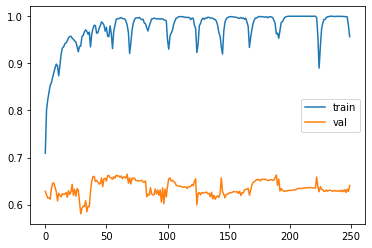

Epoch 1/250
76/78 [============================>.] - ETA: 0s - loss: 0.9979 - acc: 0.7697
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 1.0087 - acc: 0.7686 - val_loss: 1.5968 - val_acc: 0.6689
Epoch 2/250
77/78 [============================>.] - ETA: 0s - loss: 0.6277 - acc: 0.8015
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.6294 - acc: 0.8003 - val_loss: 1.3365 - val_acc: 0.6750
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 0.4672 - acc: 0.8205
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4745 - acc: 0.8192 - val_loss: 1.3009 - val_acc: 0.6696
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.4198 - acc: 0.8295
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.4209 - acc: 0.82

74/78 [===========================>..] - ETA: 0s - loss: 0.1244 - acc: 0.9497
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1202 - acc: 0.9514 - val_loss: 1.8137 - val_acc: 0.6488
Epoch 33/250
76/78 [============================>.] - ETA: 0s - loss: 0.1256 - acc: 0.9523
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1239 - acc: 0.9530 - val_loss: 1.8251 - val_acc: 0.6546
Epoch 34/250
78/78 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.9642
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0943 - acc: 0.9642 - val_loss: 1.8975 - val_acc: 0.6473
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0726 - acc: 0.9700
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0709 - acc: 0.9707 - val_

77/78 [============================>.] - ETA: 0s - loss: 0.0262 - acc: 0.9931
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0260 - acc: 0.9932 - val_loss: 2.1721 - val_acc: 0.6342
Epoch 64/250
77/78 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9947
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0198 - acc: 0.9948 - val_loss: 2.2048 - val_acc: 0.6426
Epoch 65/250
77/78 [============================>.] - ETA: 0s - loss: 0.0141 - acc: 0.9984
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0140 - acc: 0.9984 - val_loss: 2.2066 - val_acc: 0.6434
Epoch 66/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0112 - acc: 0.9983
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0114 - acc: 0.9984 - val_

74/78 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9983
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0103 - acc: 0.9980 - val_loss: 2.3811 - val_acc: 0.6430
Epoch 95/250
77/78 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9976
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0129 - acc: 0.9976 - val_loss: 2.3829 - val_acc: 0.6272
Epoch 96/250
76/78 [============================>.] - ETA: 0s - loss: 0.0183 - acc: 0.9934- ETA: 0s - loss: 0.0173 - a
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0184 - acc: 0.9932 - val_loss: 2.3718 - val_acc: 0.6322
Epoch 97/250
76/78 [============================>.] - ETA: 0s - loss: 0.0247 - acc: 0.9934
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss:

Epoch 125/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0151 - acc: 0.9967
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0161 - acc: 0.9964 - val_loss: 2.2645 - val_acc: 0.6631
Epoch 126/250
76/78 [============================>.] - ETA: 0s - loss: 0.0168 - acc: 0.9951
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0166 - acc: 0.9952 - val_loss: 2.2784 - val_acc: 0.6662
Epoch 127/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0097 - acc: 0.9987
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0112 - acc: 0.9980 - val_loss: 2.3093 - val_acc: 0.6665
Epoch 128/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0082 - acc: 0.9987
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0089 - a

78/78 [==============================] - ETA: 0s - loss: 0.0201 - acc: 0.9928
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0201 - acc: 0.9928 - val_loss: 2.4862 - val_acc: 0.6415
Epoch 157/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0724 - acc: 0.9812
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0731 - acc: 0.9799 - val_loss: 2.3381 - val_acc: 0.6149
Epoch 158/250
78/78 [==============================] - ETA: 0s - loss: 0.1143 - acc: 0.9703
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1143 - acc: 0.9703 - val_loss: 2.3420 - val_acc: 0.6465
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0381 - acc: 0.9875
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0389 - acc: 0.9871 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0705 - acc: 0.9794
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0695 - acc: 0.9795 - val_loss: 2.4848 - val_acc: 0.6596
Epoch 188/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0571 - acc: 0.9837
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0572 - acc: 0.9835 - val_loss: 2.4449 - val_acc: 0.6503
Epoch 189/250
77/78 [============================>.] - ETA: 0s - loss: 0.0752 - acc: 0.9740
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0744 - acc: 0.9743 - val_loss: 2.3370 - val_acc: 0.6384
Epoch 190/250
76/78 [============================>.] - ETA: 0s - loss: 0.0846 - acc: 0.9770
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0833 - acc: 0.9771 - v

Epoch 218/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0092 - acc: 0.9983
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0096 - acc: 0.9980 - val_loss: 2.4209 - val_acc: 0.6534
Epoch 219/250
76/78 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9967
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0219 - acc: 0.9956 - val_loss: 2.4291 - val_acc: 0.6407
Epoch 220/250
78/78 [==============================] - ETA: 0s - loss: 0.0127 - acc: 0.9964
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0127 - acc: 0.9964 - val_loss: 2.4457 - val_acc: 0.6615
Epoch 221/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0128 - acc: 0.9975
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0137 - a

74/78 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.9996
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0059 - acc: 0.9996 - val_loss: 2.3815 - val_acc: 0.6596
Epoch 250/250
76/78 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 1.0000- ETA: 0s - loss: 0.0057 - ac
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 2.3990 - val_acc: 0.6588


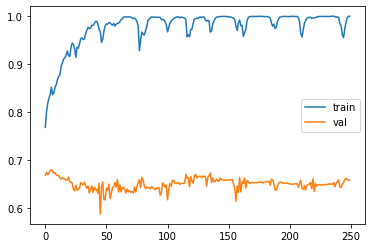

Epoch 1/250
74/78 [===========================>..] - ETA: 0s - loss: 0.9513 - acc: 0.8138
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.9546 - acc: 0.8132 - val_loss: 1.8845 - val_acc: 0.6638
Epoch 2/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4730 - acc: 0.8575
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4876 - acc: 0.8554 - val_loss: 1.3108 - val_acc: 0.6596
Epoch 3/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3626 - acc: 0.8779
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.3753 - acc: 0.8746 - val_loss: 1.2154 - val_acc: 0.6538
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.3099 - acc: 0.8937
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3127 - acc: 0.89

Epoch 33/250
76/78 [============================>.] - ETA: 0s - loss: 0.0362 - acc: 0.9901
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0355 - acc: 0.9904 - val_loss: 1.8911 - val_acc: 0.6534
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0412 - acc: 0.9865
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0418 - acc: 0.9863 - val_loss: 1.8310 - val_acc: 0.6253
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0589 - acc: 0.9800
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0582 - acc: 0.9803 - val_loss: 1.8273 - val_acc: 0.6272
Epoch 36/250
76/78 [============================>.] - ETA: 0s - loss: 0.0870 - acc: 0.9688
Epoch 00036: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0852 - acc: 

74/78 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0113 - acc: 0.9964 - val_loss: 2.0650 - val_acc: 0.6322
Epoch 65/250
77/78 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9976
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0107 - acc: 0.9976 - val_loss: 2.0986 - val_acc: 0.6388
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9980
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0073 - acc: 0.9980 - val_loss: 2.1699 - val_acc: 0.6372
Epoch 67/250
78/78 [==============================] - ETA: 0s - loss: 0.0069 - acc: 0.9984
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0069 - acc: 0.9984 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.0090 - acc: 0.9979
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0088 - acc: 0.9980 - val_loss: 2.3288 - val_acc: 0.6318
Epoch 96/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 0.9979
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0076 - acc: 0.9980 - val_loss: 2.2894 - val_acc: 0.6315
Epoch 97/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.9975
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0085 - acc: 0.9976 - val_loss: 2.3137 - val_acc: 0.6307
Epoch 98/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.9987
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0055 - acc: 0.9988 - val_

Epoch 126/250
78/78 [==============================] - ETA: 0s - loss: 0.0383 - acc: 0.9871
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0383 - acc: 0.9871 - val_loss: 2.2031 - val_acc: 0.6237
Epoch 127/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0624 - acc: 0.9800
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0606 - acc: 0.9807 - val_loss: 2.4103 - val_acc: 0.6515
Epoch 128/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0535 - acc: 0.9844
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0571 - acc: 0.9827 - val_loss: 2.1889 - val_acc: 0.6492
Epoch 129/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0231 - acc: 0.9937
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0239 - a

Epoch 157/250
78/78 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 22ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.2674 - val_acc: 0.6376
Epoch 158/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.2953 - val_acc: 0.6353
Epoch 159/250
77/78 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.3202 - val_acc: 0.6349
Epoch 160/250
77/78 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0023 - a

78/78 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.5003 - val_acc: 0.6372
Epoch 189/250
78/78 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000    - ETA: 0s - loss: 8.4457e-04 - acc
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.5204 - val_acc: 0.6388
Epoch 190/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5348 - val_acc: 0.6372
Epoch 191/250
78/78 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms

75/78 [===========================>..] - ETA: 0s - loss: 0.0017 - acc: 0.9996 
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 2.5479 - val_acc: 0.6241
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992 
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0030 - acc: 0.9992 - val_loss: 2.5509 - val_acc: 0.6276
Epoch 221/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0037 - acc: 0.9996 
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0036 - acc: 0.9996 - val_loss: 2.5497 - val_acc: 0.6199
Epoch 222/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0021 - acc: 0.9992
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0020 - acc: 0.9992 

76/78 [============================>.] - ETA: 0s - loss: 0.0260 - acc: 0.9905
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0254 - acc: 0.9908 - val_loss: 2.2917 - val_acc: 0.6407


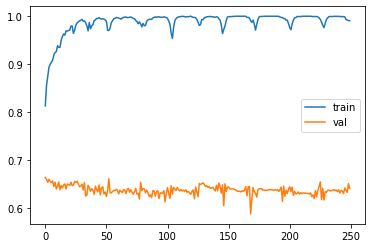

Epoch 1/250
74/78 [===========================>..] - ETA: 0s - loss: 0.7478 - acc: 0.8142
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.7565 - acc: 0.8156 - val_loss: 1.9255 - val_acc: 0.6596
Epoch 2/250
74/78 [===========================>..] - ETA: 0s - loss: 0.4152 - acc: 0.8970
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4188 - acc: 0.8947 - val_loss: 1.5339 - val_acc: 0.6654
Epoch 3/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2974 - acc: 0.9067
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2898 - acc: 0.9092 - val_loss: 1.4824 - val_acc: 0.6654
Epoch 4/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2572 - acc: 0.9154
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2498 - acc: 0.91

75/78 [===========================>..] - ETA: 0s - loss: 0.0590 - acc: 0.9767
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0574 - acc: 0.9775 - val_loss: 1.9449 - val_acc: 0.6434
Epoch 33/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0313 - acc: 0.9879
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0311 - acc: 0.9879 - val_loss: 1.9712 - val_acc: 0.6380
Epoch 34/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0278 - acc: 0.9925
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0290 - acc: 0.9924 - val_loss: 1.9526 - val_acc: 0.6480
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0279 - acc: 0.9942
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0295 - acc: 0.9932 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.9988
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0090 - acc: 0.9988 - val_loss: 2.2741 - val_acc: 0.6110
Epoch 64/250
76/78 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.9988
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0075 - acc: 0.9988 - val_loss: 2.3021 - val_acc: 0.6118
Epoch 65/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.9987
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0065 - acc: 0.9988 - val_loss: 2.3286 - val_acc: 0.6118
Epoch 66/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.9987
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0058 - acc: 0.9988 - val_

Epoch 94/250
76/78 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9963
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0198 - acc: 0.9964 - val_loss: 2.1196 - val_acc: 0.6230
Epoch 95/250
78/78 [==============================] - ETA: 0s - loss: 0.0110 - acc: 0.9984
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0110 - acc: 0.9984 - val_loss: 2.1722 - val_acc: 0.6237
Epoch 96/250
76/78 [============================>.] - ETA: 0s - loss: 0.0126 - acc: 0.9984
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0124 - acc: 0.9984 - val_loss: 2.2091 - val_acc: 0.6214
Epoch 97/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.9996
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0105 - acc: 

Epoch 125/250
75/78 [===========================>..] - ETA: 0s - loss: 9.1562e-04 - acc: 1.0000
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 9.0894e-04 - acc: 1.0000 - val_loss: 2.6909 - val_acc: 0.6264
Epoch 126/250
74/78 [===========================>..] - ETA: 0s - loss: 8.4826e-04 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 8.6802e-04 - acc: 1.0000 - val_loss: 2.7040 - val_acc: 0.6264
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 8.3259e-04 - acc: 1.0000
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 8.2953e-04 - acc: 1.0000 - val_loss: 2.7170 - val_acc: 0.6268
Epoch 128/250
75/78 [===========================>..] - ETA: 0s - loss: 7.9887e-04 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 

75/78 [===========================>..] - ETA: 0s - loss: 2.8129e-04 - acc: 1.0000
Epoch 00155: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 2.8014e-04 - acc: 1.0000 - val_loss: 3.0553 - val_acc: 0.6241
Epoch 156/250
74/78 [===========================>..] - ETA: 0s - loss: 2.6732e-04 - acc: 1.0000- ETA: 0s - loss: 2.6000e-04 - acc: 1.000
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 2.7059e-04 - acc: 1.0000 - val_loss: 3.0666 - val_acc: 0.6237
Epoch 157/250
76/78 [============================>.] - ETA: 0s - loss: 2.6112e-04 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 2.6118e-04 - acc: 1.0000 - val_loss: 3.0787 - val_acc: 0.6230
Epoch 158/250
75/78 [===========================>..] - ETA: 0s - loss: 2.5337e-04 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==========

Epoch 185/250
74/78 [===========================>..] - ETA: 0s - loss: 1.0225e-04 - acc: 1.0000
Epoch 00185: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 1.0322e-04 - acc: 1.0000 - val_loss: 3.4121 - val_acc: 0.6214
Epoch 186/250
75/78 [===========================>..] - ETA: 0s - loss: 1.0022e-04 - acc: 1.0000- ETA: 0s - loss: 1.2545e-04 
Epoch 00186: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 9.9930e-05 - acc: 1.0000 - val_loss: 3.4243 - val_acc: 0.6210
Epoch 187/250
75/78 [===========================>..] - ETA: 0s - loss: 9.7023e-05 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 9.6747e-05 - acc: 1.0000 - val_loss: 3.4366 - val_acc: 0.6214
Epoch 188/250
78/78 [==============================] - ETA: 0s - loss: 9.3667e-05 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [========

74/78 [===========================>..] - ETA: 0s - loss: 3.8456e-05 - acc: 1.0000
Epoch 00215: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 3.8803e-05 - acc: 1.0000 - val_loss: 3.7898 - val_acc: 0.6203
Epoch 216/250
76/78 [============================>.] - ETA: 0s - loss: 3.7403e-05 - acc: 1.0000
Epoch 00216: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 3.7537e-05 - acc: 1.0000 - val_loss: 3.8027 - val_acc: 0.6203
Epoch 217/250
74/78 [===========================>..] - ETA: 0s - loss: 3.5984e-05 - acc: 1.0000
Epoch 00217: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 3.6310e-05 - acc: 1.0000 - val_loss: 3.8156 - val_acc: 0.6203
Epoch 218/250
76/78 [============================>.] - ETA: 0s - loss: 3.4997e-05 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - lo

Epoch 246/250
76/78 [============================>.] - ETA: 0s - loss: 1.3519e-05 - acc: 1.0000
Epoch 00246: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 1.3572e-05 - acc: 1.0000 - val_loss: 4.1994 - val_acc: 0.6195
Epoch 247/250
76/78 [============================>.] - ETA: 0s - loss: 1.3058e-05 - acc: 1.0000- ETA: 0s - loss: 1.4001e-05 -
Epoch 00247: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 1.3110e-05 - acc: 1.0000 - val_loss: 4.2129 - val_acc: 0.6195
Epoch 248/250
76/78 [============================>.] - ETA: 0s - loss: 1.2612e-05 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 1.2662e-05 - acc: 1.0000 - val_loss: 4.2265 - val_acc: 0.6191
Epoch 249/250
76/78 [============================>.] - ETA: 0s - loss: 1.2183e-05 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [=======

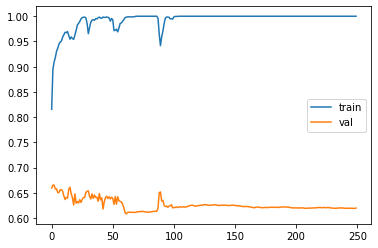

Epoch 1/250
86/87 [============================>.] - ETA: 0s - loss: 2.4243 - acc: 0.7202
Epoch 00001: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 2.4164 - acc: 0.7211 - val_loss: 3.0233 - val_acc: 0.6106
Epoch 2/250
84/87 [===========================>..] - ETA: 0s - loss: 1.2689 - acc: 0.8144
Epoch 00002: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 1.2553 - acc: 0.8109 - val_loss: 2.2895 - val_acc: 0.6114
Epoch 3/250
84/87 [===========================>..] - ETA: 0s - loss: 0.8544 - acc: 0.8385
Epoch 00003: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.8441 - acc: 0.8385 - val_loss: 2.1414 - val_acc: 0.6095
Epoch 4/250
84/87 [===========================>..] - ETA: 0s - loss: 0.6513 - acc: 0.8538
Epoch 00004: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.6432 - acc: 0.85

84/87 [===========================>..] - ETA: 0s - loss: 0.1198 - acc: 0.9583
Epoch 00032: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.1200 - acc: 0.9583 - val_loss: 2.0505 - val_acc: 0.6076
Epoch 33/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0561 - acc: 0.9834
Epoch 00033: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 2.1320 - val_acc: 0.6064
Epoch 34/250
85/87 [============================>.] - ETA: 0s - loss: 0.0320 - acc: 0.9908
Epoch 00034: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0316 - acc: 0.9909 - val_loss: 2.2321 - val_acc: 0.5995
Epoch 35/250
86/87 [============================>.] - ETA: 0s - loss: 0.0226 - acc: 0.9964
Epoch 00035: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0226 - acc: 0.9964 - val_

Epoch 64/250
86/87 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 0.9996
Epoch 00064: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0035 - acc: 0.9996 - val_loss: 2.6852 - val_acc: 0.6022
Epoch 65/250
86/87 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9993
Epoch 00065: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 2.6929 - val_acc: 0.6049
Epoch 66/250
85/87 [============================>.] - ETA: 0s - loss: 0.0039 - acc: 0.9996
Epoch 00066: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0039 - acc: 0.9996 - val_loss: 2.7167 - val_acc: 0.6033
Epoch 67/250
86/87 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9985
Epoch 00067: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0042 - acc: 

84/87 [===========================>..] - ETA: 0s - loss: 0.0940 - acc: 0.9736
Epoch 00095: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0916 - acc: 0.9743 - val_loss: 2.2424 - val_acc: 0.6126
Epoch 96/250
86/87 [============================>.] - ETA: 0s - loss: 0.0800 - acc: 0.9771
Epoch 00096: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0797 - acc: 0.9772 - val_loss: 2.2775 - val_acc: 0.5998
Epoch 97/250
85/87 [============================>.] - ETA: 0s - loss: 0.0221 - acc: 0.9945
Epoch 00097: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0219 - acc: 0.9946 - val_loss: 2.4097 - val_acc: 0.5875
Epoch 98/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0103 - acc: 0.9974
Epoch 00098: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0102 - acc: 0.9975 - val_

86/87 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.5381 - val_acc: 0.6083
Epoch 127/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0018 - acc: 1.0000
Epoch 00127: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.5684 - val_acc: 0.6083
Epoch 128/250
86/87 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.5959 - val_acc: 0.6083
Epoch 129/250
85/87 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00129: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0014 - acc: 1.0000 - v

Epoch 157/250
85/87 [============================>.] - ETA: 0s - loss: 2.7702e-04 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 2.7578e-04 - acc: 1.0000 - val_loss: 3.0948 - val_acc: 0.6079
Epoch 158/250
84/87 [===========================>..] - ETA: 0s - loss: 2.6612e-04 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 2.6386e-04 - acc: 1.0000 - val_loss: 3.1080 - val_acc: 0.6087
Epoch 159/250
83/87 [===========================>..] - ETA: 0s - loss: 2.5641e-04 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 2.5259e-04 - acc: 1.0000 - val_loss: 3.1212 - val_acc: 0.6095
Epoch 160/250
83/87 [===========================>..] - ETA: 0s - loss: 2.4555e-04 - acc: 1.0000
Epoch 00160: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 

Epoch 187/250
84/87 [===========================>..] - ETA: 0s - loss: 8.5761e-05 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 8.5182e-05 - acc: 1.0000 - val_loss: 3.4653 - val_acc: 0.6122
Epoch 188/250
84/87 [===========================>..] - ETA: 0s - loss: 8.2779e-05 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 8.2223e-05 - acc: 1.0000 - val_loss: 3.4775 - val_acc: 0.6126
Epoch 189/250
83/87 [===========================>..] - ETA: 0s - loss: 8.0404e-05 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 7.9378e-05 - acc: 1.0000 - val_loss: 3.4897 - val_acc: 0.6126
Epoch 190/250
84/87 [===========================>..] - ETA: 0s - loss: 7.7154e-05 - acc: 1.0000
Epoch 00190: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 

Epoch 217/250
85/87 [============================>.] - ETA: 0s - loss: 3.0789e-05 - acc: 1.0000
Epoch 00217: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 3.0714e-05 - acc: 1.0000 - val_loss: 3.8386 - val_acc: 0.6110
Epoch 218/250
85/87 [============================>.] - ETA: 0s - loss: 2.9781e-05 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 2.9709e-05 - acc: 1.0000 - val_loss: 3.8514 - val_acc: 0.6110
Epoch 219/250
84/87 [===========================>..] - ETA: 0s - loss: 2.8902e-05 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 2.8738e-05 - acc: 1.0000 - val_loss: 3.8642 - val_acc: 0.6110
Epoch 220/250
86/87 [============================>.] - ETA: 0s - loss: 2.7832e-05 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 

Epoch 247/250
85/87 [============================>.] - ETA: 0s - loss: 1.1135e-05 - acc: 1.0000
Epoch 00247: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 1.1118e-05 - acc: 1.0000 - val_loss: 4.2383 - val_acc: 0.6091
Epoch 248/250
84/87 [===========================>..] - ETA: 0s - loss: 1.0782e-05 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 1.0733e-05 - acc: 1.0000 - val_loss: 4.2522 - val_acc: 0.6091
Epoch 249/250
83/87 [===========================>..] - ETA: 0s - loss: 1.0483e-05 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 1.0364e-05 - acc: 1.0000 - val_loss: 4.2661 - val_acc: 0.6091
Epoch 250/250
84/87 [===========================>..] - ETA: 0s - loss: 1.0049e-05 - acc: 1.0000- ETA: 0s - loss: 1.1352e-05 - acc
Epoch 00250: saving model to Model\lstm_model5.h5
87/87 [===

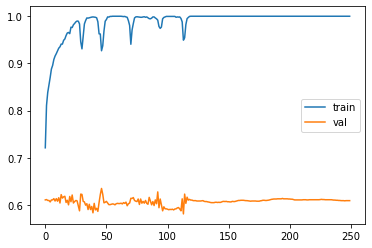

Epoch 1/250
74/77 [===========================>..] - ETA: 0s - loss: 3.3813 - acc: 0.5908
Epoch 00001: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 18ms/step - loss: 3.3205 - acc: 0.5944 - val_loss: 2.1949 - val_acc: 0.6546
Epoch 2/250
74/77 [===========================>..] - ETA: 0s - loss: 1.7390 - acc: 0.6001
Epoch 00002: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 1.6983 - acc: 0.6100 - val_loss: 1.5989 - val_acc: 0.6569
Epoch 3/250
76/77 [============================>.] - ETA: 0s - loss: 0.9094 - acc: 0.6517
Epoch 00003: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 18ms/step - loss: 0.9081 - acc: 0.6523 - val_loss: 1.2652 - val_acc: 0.6623
Epoch 4/250
75/77 [============================>.] - ETA: 0s - loss: 0.6923 - acc: 0.6929
Epoch 00004: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.6919 - acc: 0.69

75/77 [============================>.] - ETA: 0s - loss: 0.3610 - acc: 0.8263
Epoch 00032: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.3610 - acc: 0.8251 - val_loss: 1.4036 - val_acc: 0.6712
Epoch 33/250
76/77 [============================>.] - ETA: 0s - loss: 0.4455 - acc: 0.7837
Epoch 00033: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.4448 - acc: 0.7841 - val_loss: 1.3988 - val_acc: 0.6689
Epoch 34/250
75/77 [============================>.] - ETA: 0s - loss: 0.4013 - acc: 0.8079
Epoch 00034: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.3996 - acc: 0.8079 - val_loss: 1.3919 - val_acc: 0.6689
Epoch 35/250
74/77 [===========================>..] - ETA: 0s - loss: 0.3588 - acc: 0.8235
Epoch 00035: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.3543 - acc: 0.8259 - val_

75/77 [============================>.] - ETA: 0s - loss: 0.1589 - acc: 0.9400
Epoch 00063: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1569 - acc: 0.9409 - val_loss: 1.8835 - val_acc: 0.6527
Epoch 64/250
76/77 [============================>.] - ETA: 0s - loss: 0.1619 - acc: 0.9334
Epoch 00064: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1616 - acc: 0.9335 - val_loss: 1.8838 - val_acc: 0.6496
Epoch 65/250
73/77 [===========================>..] - ETA: 0s - loss: 0.2231 - acc: 0.9259
Epoch 00065: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.2149 - acc: 0.9290 - val_loss: 1.8313 - val_acc: 0.6665
Epoch 66/250
76/77 [============================>.] - ETA: 0s - loss: 0.1735 - acc: 0.9383
Epoch 00066: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 18ms/step - loss: 0.1732 - acc: 0.9384 - val_

73/77 [===========================>..] - ETA: 0s - loss: 0.1823 - acc: 0.9336
Epoch 00094: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1821 - acc: 0.9351 - val_loss: 2.1664 - val_acc: 0.6480
Epoch 95/250
75/77 [============================>.] - ETA: 0s - loss: 0.1401 - acc: 0.9533
Epoch 00095: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1383 - acc: 0.9540 - val_loss: 2.1476 - val_acc: 0.6473
Epoch 96/250
76/77 [============================>.] - ETA: 0s - loss: 0.0890 - acc: 0.9733
Epoch 00096: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0889 - acc: 0.9733 - val_loss: 2.2055 - val_acc: 0.6415
Epoch 97/250
73/77 [===========================>..] - ETA: 0s - loss: 0.0668 - acc: 0.9777
Epoch 00097: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0643 - acc: 0.9787 - val_

75/77 [============================>.] - ETA: 0s - loss: 0.2584 - acc: 0.9183
Epoch 00125: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.2549 - acc: 0.9195 - val_loss: 2.4413 - val_acc: 0.6133
Epoch 126/250
75/77 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9475
Epoch 00126: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1514 - acc: 0.9479 - val_loss: 2.2843 - val_acc: 0.6245
Epoch 127/250
76/77 [============================>.] - ETA: 0s - loss: 0.0890 - acc: 0.9716
Epoch 00127: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0888 - acc: 0.9717 - val_loss: 2.3156 - val_acc: 0.6334
Epoch 128/250
76/77 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9831
Epoch 00128: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0528 - acc: 0.9832 - v

74/77 [===========================>..] - ETA: 0s - loss: 0.0137 - acc: 0.9979
Epoch 00156: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0170 - acc: 0.9975 - val_loss: 2.4826 - val_acc: 0.6311
Epoch 157/250
73/77 [===========================>..] - ETA: 0s - loss: 0.0133 - acc: 0.9983
Epoch 00157: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0165 - acc: 0.9979 - val_loss: 2.4898 - val_acc: 0.6268
Epoch 158/250
75/77 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9992
Epoch 00158: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 19ms/step - loss: 0.0115 - acc: 0.9988 - val_loss: 2.5095 - val_acc: 0.6303
Epoch 159/250
76/77 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9979
Epoch 00159: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0117 - acc: 0.9979 - v

74/77 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9996
Epoch 00187: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0031 - acc: 0.9996 - val_loss: 2.8486 - val_acc: 0.6141
Epoch 188/250
74/77 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 0.9996
Epoch 00188: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0035 - acc: 0.9996 - val_loss: 2.8631 - val_acc: 0.6110
Epoch 189/250
75/77 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9950
Epoch 00189: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0200 - acc: 0.9951 - val_loss: 2.8222 - val_acc: 0.6153
Epoch 190/250
75/77 [============================>.] - ETA: 0s - loss: 0.2167 - acc: 0.9458
Epoch 00190: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.2136 - acc: 0.9466 - v

76/77 [============================>.] - ETA: 0s - loss: 0.2888 - acc: 0.9268
Epoch 00218: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.2884 - acc: 0.9269 - val_loss: 2.4986 - val_acc: 0.6484
Epoch 219/250
75/77 [============================>.] - ETA: 0s - loss: 0.3612 - acc: 0.8933
Epoch 00219: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.3569 - acc: 0.8949 - val_loss: 2.1827 - val_acc: 0.6187
Epoch 220/250
74/77 [===========================>..] - ETA: 0s - loss: 0.1606 - acc: 0.9476
Epoch 00220: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.1569 - acc: 0.9491 - val_loss: 2.2197 - val_acc: 0.6122
Epoch 221/250
75/77 [============================>.] - ETA: 0s - loss: 0.0795 - acc: 0.9746
Epoch 00221: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0785 - acc: 0.9750 - v

74/77 [===========================>..] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 18ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.9359 - val_acc: 0.6118
Epoch 250/250
77/77 [==============================] - ETA: 0s - loss: 0.0010 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
77/77 [==============================] - 1s 17ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.9502 - val_acc: 0.6114


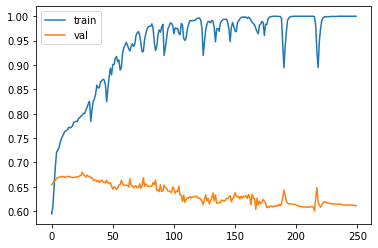

Epoch 1/250
84/87 [===========================>..] - ETA: 0s - loss: 0.8002 - acc: 0.8876
Epoch 00001: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.8150 - acc: 0.8859 - val_loss: 2.4976 - val_acc: 0.6596
Epoch 2/250
85/87 [============================>.] - ETA: 0s - loss: 0.4261 - acc: 0.9224
Epoch 00002: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.4202 - acc: 0.9236 - val_loss: 1.6529 - val_acc: 0.6677
Epoch 3/250
87/87 [==============================] - ETA: 0s - loss: 0.2879 - acc: 0.9283
Epoch 00003: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.2879 - acc: 0.9283 - val_loss: 1.4106 - val_acc: 0.6638
Epoch 4/250
83/87 [===========================>..] - ETA: 0s - loss: 0.2133 - acc: 0.9458
Epoch 00004: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.2400 - acc: 0.93

84/87 [===========================>..] - ETA: 0s - loss: 0.1015 - acc: 0.9695
Epoch 00032: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.1046 - acc: 0.9681 - val_loss: 1.7582 - val_acc: 0.6727
Epoch 33/250
85/87 [============================>.] - ETA: 0s - loss: 0.1597 - acc: 0.9393
Epoch 00033: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.1574 - acc: 0.9402 - val_loss: 1.8622 - val_acc: 0.6689
Epoch 34/250
86/87 [============================>.] - ETA: 0s - loss: 0.1010 - acc: 0.9691
Epoch 00034: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.1008 - acc: 0.9692 - val_loss: 1.7611 - val_acc: 0.6723
Epoch 35/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0757 - acc: 0.9754
Epoch 00035: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0794 - acc: 0.9746 - val_

83/87 [===========================>..] - ETA: 0s - loss: 0.0484 - acc: 0.9838
Epoch 00063: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0510 - acc: 0.9822 - val_loss: 1.9035 - val_acc: 0.6557
Epoch 64/250
86/87 [============================>.] - ETA: 0s - loss: 0.0389 - acc: 0.9873
Epoch 00064: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0388 - acc: 0.9873 - val_loss: 1.9321 - val_acc: 0.6615
Epoch 65/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0197 - acc: 0.9955
Epoch 00065: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0213 - acc: 0.9942 - val_loss: 1.9502 - val_acc: 0.6604
Epoch 66/250
86/87 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9971
Epoch 00066: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0180 - acc: 0.9971 - val_

84/87 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.9993
Epoch 00094: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0062 - acc: 0.9993 - val_loss: 2.2225 - val_acc: 0.6611
Epoch 95/250
85/87 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9985
Epoch 00095: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0077 - acc: 0.9986 - val_loss: 2.2415 - val_acc: 0.6581
Epoch 96/250
86/87 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9971
Epoch 00096: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0084 - acc: 0.9971 - val_loss: 2.2380 - val_acc: 0.6646
Epoch 97/250
86/87 [============================>.] - ETA: 0s - loss: 0.0160 - acc: 0.9949
Epoch 00097: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0159 - acc: 0.9949 - val_

87/87 [==============================] - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 00125: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.2099 - val_acc: 0.6719
Epoch 126/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0027 - acc: 0.9996- ETA: 0s - loss: 0.0045 - 
Epoch 00126: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0029 - acc: 0.9996 - val_loss: 2.2302 - val_acc: 0.6739
Epoch 127/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0048 - acc: 0.9993
Epoch 00127: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0049 - acc: 0.9993 - val_loss: 2.2469 - val_acc: 0.6708
Epoch 128/250
86/87 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9985
Epoch 00128: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - los

Epoch 156/250
86/87 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.9996
Epoch 00156: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0053 - acc: 0.9996 - val_loss: 2.0844 - val_acc: 0.6700
Epoch 157/250
85/87 [============================>.] - ETA: 0s - loss: 0.0046 - acc: 0.9996
Epoch 00157: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0046 - acc: 0.9996 - val_loss: 2.1060 - val_acc: 0.6681
Epoch 158/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0040 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 2.1308 - val_acc: 0.6692
Epoch 159/250
85/87 [============================>.] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0037 - a

Epoch 187/250
85/87 [============================>.] - ETA: 0s - loss: 0.0868 - acc: 0.9746
Epoch 00187: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0856 - acc: 0.9750 - val_loss: 2.4078 - val_acc: 0.6685
Epoch 188/250
86/87 [============================>.] - ETA: 0s - loss: 0.1197 - acc: 0.9717
Epoch 00188: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.1194 - acc: 0.9717 - val_loss: 2.3654 - val_acc: 0.6619
Epoch 189/250
85/87 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9724
Epoch 00189: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.1079 - acc: 0.9728 - val_loss: 2.1011 - val_acc: 0.6654
Epoch 190/250
87/87 [==============================] - ETA: 0s - loss: 0.0389 - acc: 0.9870
Epoch 00190: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 0.0389 - a

Epoch 218/250
85/87 [============================>.] - ETA: 0s - loss: 5.4857e-04 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 5.4570e-04 - acc: 1.0000 - val_loss: 2.5414 - val_acc: 0.6642
Epoch 219/250
85/87 [============================>.] - ETA: 0s - loss: 5.1942e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 5.1670e-04 - acc: 1.0000 - val_loss: 2.5533 - val_acc: 0.6635
Epoch 220/250
83/87 [===========================>..] - ETA: 0s - loss: 4.6721e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 4.8970e-04 - acc: 1.0000 - val_loss: 2.5653 - val_acc: 0.6627
Epoch 221/250
85/87 [============================>.] - ETA: 0s - loss: 4.6684e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 

87/87 [==============================] - ETA: 0s - loss: 1.3658e-04 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 1.3658e-04 - acc: 1.0000 - val_loss: 2.8843 - val_acc: 0.6635
Epoch 249/250
83/87 [===========================>..] - ETA: 0s - loss: 1.2994e-04 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 1.3115e-04 - acc: 1.0000 - val_loss: 2.8955 - val_acc: 0.6635
Epoch 250/250
85/87 [============================>.] - ETA: 0s - loss: 1.2684e-04 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 16ms/step - loss: 1.2596e-04 - acc: 1.0000 - val_loss: 2.9067 - val_acc: 0.6642


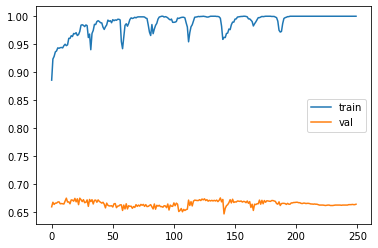

Epoch 1/250
78/78 [==============================] - ETA: 0s - loss: 1.1504 - acc: 0.848 - ETA: 0s - loss: 1.1790 - acc: 0.8445
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.1790 - acc: 0.8445 - val_loss: 2.3768 - val_acc: 0.6646
Epoch 2/250
74/78 [===========================>..] - ETA: 0s - loss: 0.5237 - acc: 0.8775
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.5237 - acc: 0.8767 - val_loss: 1.3006 - val_acc: 0.6669
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3596 - acc: 0.8763- ETA: 0s - loss: 0.3594 - acc: 0.8
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3615 - acc: 0.8763 - val_loss: 1.1231 - val_acc: 0.6642
Epoch 4/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3105 - acc: 0.8867
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [

Epoch 32/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0658 - acc: 0.9775
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0641 - acc: 0.9783 - val_loss: 1.8608 - val_acc: 0.6372
Epoch 33/250
78/78 [==============================] - ETA: 0s - loss: 0.0794 - acc: 0.9703
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0794 - acc: 0.9703 - val_loss: 1.8542 - val_acc: 0.6330
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0728 - acc: 0.9751
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0733 - acc: 0.9751 - val_loss: 1.8641 - val_acc: 0.6345
Epoch 35/250
78/78 [==============================] - ETA: 0s - loss: 0.0704 - acc: 0.9747
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0704 - acc: 

Epoch 63/250
76/78 [============================>.] - ETA: 0s - loss: 0.0393 - acc: 0.9881
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0386 - acc: 0.9883 - val_loss: 2.1662 - val_acc: 0.6388
Epoch 64/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0433 - acc: 0.9867
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0419 - acc: 0.9871 - val_loss: 2.1504 - val_acc: 0.6392
Epoch 65/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0429 - acc: 0.9865
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0421 - acc: 0.9863 - val_loss: 2.2070 - val_acc: 0.6469
Epoch 66/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0481 - acc: 0.9818
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0464 - acc: 

Epoch 94/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0349 - acc: 0.9883
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0338 - acc: 0.9888 - val_loss: 2.2576 - val_acc: 0.6565
Epoch 95/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0401 - acc: 0.9850
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0387 - acc: 0.9855 - val_loss: 2.3287 - val_acc: 0.6268
Epoch 96/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0468 - acc: 0.9856
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0455 - acc: 0.9859 - val_loss: 2.2829 - val_acc: 0.6519
Epoch 97/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0376 - acc: 0.9867
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0365 - acc: 

Epoch 125/250
76/78 [============================>.] - ETA: 0s - loss: 0.0714 - acc: 0.9852
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0707 - acc: 0.9851 - val_loss: 2.3712 - val_acc: 0.6631
Epoch 126/250
76/78 [============================>.] - ETA: 0s - loss: 0.0243 - acc: 0.9922
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0238 - acc: 0.9924 - val_loss: 2.4499 - val_acc: 0.6492
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9947
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0168 - acc: 0.9948 - val_loss: 2.4237 - val_acc: 0.6519
Epoch 128/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0098 - acc: 0.9979
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0095 - a

75/78 [===========================>..] - ETA: 0s - loss: 0.0161 - acc: 0.9975
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0156 - acc: 0.9976 - val_loss: 2.5866 - val_acc: 0.6500
Epoch 157/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9966
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0085 - acc: 0.9968 - val_loss: 2.6570 - val_acc: 0.6507
Epoch 158/250
76/78 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9955
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0080 - acc: 0.9956 - val_loss: 2.6299 - val_acc: 0.6503
Epoch 159/250
76/78 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9975
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0094 - acc: 0.9976 - v

Epoch 187/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.9987- ETA: 0s - loss: 0.0077 - acc: 
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0051 - acc: 0.9988 - val_loss: 2.5998 - val_acc: 0.6407
Epoch 188/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0076 - acc: 0.9975
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0074 - acc: 0.9976 - val_loss: 2.5628 - val_acc: 0.6619
Epoch 189/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0145 - acc: 0.996 - ETA: 0s - loss: 0.0142 - acc: 0.9962
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0142 - acc: 0.9960 - val_loss: 2.6864 - val_acc: 0.6423
Epoch 190/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0141 - acc: 0.9962
Epoch 00190: saving model to Model\lstm_model5.h5
78

Epoch 218/250
76/78 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.5230 - val_acc: 0.6476
Epoch 219/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 16ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.5399 - val_acc: 0.6480
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 2.5549 - val_acc: 0.6484
Epoch 221/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0018 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0018 - a

Epoch 249/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0146 - acc: 0.9958
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0142 - acc: 0.9960 - val_loss: 2.4916 - val_acc: 0.6399
Epoch 250/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.9992
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0055 - acc: 0.9992 - val_loss: 2.5531 - val_acc: 0.6299


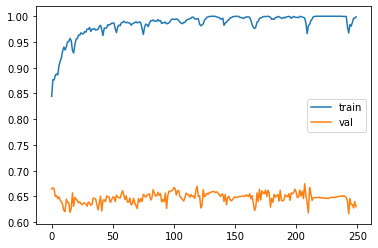

Epoch 1/250
90/91 [============================>.] - ETA: 0s - loss: 1.7111 - acc: 0.6642
Epoch 00001: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 1.7071 - acc: 0.6652 - val_loss: 1.7751 - val_acc: 0.6018
Epoch 2/250
89/91 [============================>.] - ETA: 0s - loss: 1.0319 - acc: 0.6896- ETA: 0s - loss: 1.0667 - ac
Epoch 00002: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 1.0201 - acc: 0.6936 - val_loss: 1.0356 - val_acc: 0.6380
Epoch 3/250
90/91 [============================>.] - ETA: 0s - loss: 0.7152 - acc: 0.7205
Epoch 00003: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.7146 - acc: 0.7209 - val_loss: 0.9269 - val_acc: 0.6480
Epoch 4/250
87/91 [===========================>..] - ETA: 0s - loss: 0.6394 - acc: 0.7335
Epoch 00004: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/st

Epoch 32/250
90/91 [============================>.] - ETA: 0s - loss: 0.3282 - acc: 0.8896
Epoch 00032: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.3275 - acc: 0.8899 - val_loss: 1.1121 - val_acc: 0.6423
Epoch 33/250
89/91 [============================>.] - ETA: 0s - loss: 0.3176 - acc: 0.8922
Epoch 00033: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.3179 - acc: 0.8909 - val_loss: 1.1691 - val_acc: 0.6210
Epoch 34/250
88/91 [============================>.] - ETA: 0s - loss: 0.3064 - acc: 0.8956
Epoch 00034: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.3066 - acc: 0.8951 - val_loss: 1.0969 - val_acc: 0.6465
Epoch 35/250
90/91 [============================>.] - ETA: 0s - loss: 0.3058 - acc: 0.8965
Epoch 00035: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.3052 - acc: 

88/91 [============================>.] - ETA: 0s - loss: 0.1477 - acc: 0.9624
Epoch 00063: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1472 - acc: 0.9623 - val_loss: 1.4890 - val_acc: 0.6191
Epoch 64/250
89/91 [============================>.] - ETA: 0s - loss: 0.1604 - acc: 0.9579
Epoch 00064: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1591 - acc: 0.9581 - val_loss: 1.5673 - val_acc: 0.6110
Epoch 65/250
90/91 [============================>.] - ETA: 0s - loss: 0.1234 - acc: 0.9688
Epoch 00065: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1231 - acc: 0.9688 - val_loss: 1.5289 - val_acc: 0.6218
Epoch 66/250
91/91 [==============================] - ETA: 0s - loss: 0.1594 - acc: 0.9512
Epoch 00066: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1594 - acc: 0.9512 - val_

91/91 [==============================] - ETA: 0s - loss: 0.0584 - acc: 0.9872
Epoch 00094: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0584 - acc: 0.9872 - val_loss: 1.9349 - val_acc: 0.5956
Epoch 95/250
88/91 [============================>.] - ETA: 0s - loss: 0.0524 - acc: 0.9890
Epoch 00095: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0523 - acc: 0.9893 - val_loss: 1.9520 - val_acc: 0.5952
Epoch 96/250
89/91 [============================>.] - ETA: 0s - loss: 0.0508 - acc: 0.9898
Epoch 00096: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0504 - acc: 0.9900 - val_loss: 1.8981 - val_acc: 0.6022
Epoch 97/250
90/91 [============================>.] - ETA: 0s - loss: 0.0582 - acc: 0.9861
Epoch 00097: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0581 - acc: 0.9861 - val_

89/91 [============================>.] - ETA: 0s - loss: 0.0253 - acc: 0.9961
Epoch 00125: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0251 - acc: 0.9962 - val_loss: 1.9329 - val_acc: 0.6149
Epoch 126/250
89/91 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9951
Epoch 00126: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0242 - acc: 0.9952 - val_loss: 1.9794 - val_acc: 0.6122
Epoch 127/250
90/91 [============================>.] - ETA: 0s - loss: 0.0323 - acc: 0.9913
Epoch 00127: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0322 - acc: 0.9913 - val_loss: 2.0020 - val_acc: 0.6072
Epoch 128/250
90/91 [============================>.] - ETA: 0s - loss: 0.0281 - acc: 0.9927
Epoch 00128: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0280 - acc: 0.9927 - v

90/91 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9990
Epoch 00156: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0090 - acc: 0.9990 - val_loss: 2.1864 - val_acc: 0.6149
Epoch 157/250
91/91 [==============================] - ETA: 0s - loss: 0.0091 - acc: 0.9990
Epoch 00157: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.0091 - acc: 0.9990 - val_loss: 2.1955 - val_acc: 0.6133
Epoch 158/250
90/91 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9993
Epoch 00158: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0082 - acc: 0.9993 - val_loss: 2.2532 - val_acc: 0.6091
Epoch 159/250
91/91 [==============================] - ETA: 0s - loss: 0.0208 - acc: 0.9945
Epoch 00159: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0208 - acc: 0.9945 - v

90/91 [============================>.] - ETA: 0s - loss: 0.1112 - acc: 0.9635
Epoch 00187: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1109 - acc: 0.9636 - val_loss: 2.1414 - val_acc: 0.6045
Epoch 188/250
89/91 [============================>.] - ETA: 0s - loss: 0.0747 - acc: 0.9793
Epoch 00188: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0738 - acc: 0.9796 - val_loss: 2.0617 - val_acc: 0.6187
Epoch 189/250
91/91 [==============================] - ETA: 0s - loss: 0.0423 - acc: 0.9913
Epoch 00189: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0423 - acc: 0.9913 - val_loss: 2.0825 - val_acc: 0.6214
Epoch 190/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0326 - acc: 0.9928
Epoch 00190: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0327 - acc: 0.9927 - v

90/91 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.9997
Epoch 00218: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0087 - acc: 0.9997 - val_loss: 2.2062 - val_acc: 0.6164
Epoch 219/250
90/91 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9997
Epoch 00219: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0081 - acc: 0.9997 - val_loss: 2.2270 - val_acc: 0.6122
Epoch 220/250
90/91 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9997
Epoch 00220: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0078 - acc: 0.9997 - val_loss: 2.2614 - val_acc: 0.6157
Epoch 221/250
88/91 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.9993
Epoch 00221: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0077 - acc: 0.9993 - v

Epoch 249/250
88/91 [============================>.] - ETA: 0s - loss: 0.1567 - acc: 0.9549
Epoch 00249: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.1542 - acc: 0.9553 - val_loss: 1.9842 - val_acc: 0.5952
Epoch 250/250
91/91 [==============================] - ETA: 0s - loss: 0.0642 - acc: 0.9778
Epoch 00250: saving model to Model\lstm_model5.h5
91/91 [==============================] - 1s 16ms/step - loss: 0.0642 - acc: 0.9778 - val_loss: 2.0217 - val_acc: 0.5937


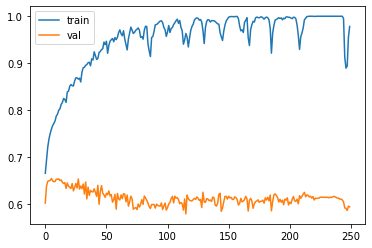

Epoch 1/250
81/81 [==============================] - ETA: 0s - loss: 1.3663 - acc: 0.6983
Epoch 00001: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 1.3663 - acc: 0.6983 - val_loss: 1.5728 - val_acc: 0.6388
Epoch 2/250
81/81 [==============================] - ETA: 0s - loss: 0.8161 - acc: 0.7785
Epoch 00002: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.8161 - acc: 0.7785 - val_loss: 1.2732 - val_acc: 0.6253
Epoch 3/250
81/81 [==============================] - ETA: 0s - loss: 0.6219 - acc: 0.7932
Epoch 00003: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.6219 - acc: 0.7932 - val_loss: 1.1563 - val_acc: 0.6199
Epoch 4/250
79/81 [============================>.] - ETA: 0s - loss: 0.4846 - acc: 0.8220
Epoch 00004: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.4814 - acc: 0.82

Epoch 33/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0737 - acc: 0.9844
Epoch 00033: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0722 - acc: 0.9850 - val_loss: 1.6587 - val_acc: 0.5879
Epoch 34/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0633 - acc: 0.9876
Epoch 00034: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0620 - acc: 0.9880 - val_loss: 1.6879 - val_acc: 0.5883
Epoch 35/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0622 - acc: 0.9868
Epoch 00035: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0609 - acc: 0.9873 - val_loss: 1.7118 - val_acc: 0.5898
Epoch 36/250
79/81 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9881
Epoch 00036: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0579 - acc: 

Epoch 65/250
77/81 [===========================>..] - ETA: 0s - loss: 0.0585 - acc: 0.9834
Epoch 00065: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0572 - acc: 0.9838 - val_loss: 2.1115 - val_acc: 0.5752
Epoch 66/250
81/81 [==============================] - ETA: 0s - loss: 0.0422 - acc: 0.9880
Epoch 00066: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0422 - acc: 0.9880 - val_loss: 2.0942 - val_acc: 0.5810
Epoch 67/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0193 - acc: 0.9956
Epoch 00067: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0189 - acc: 0.9958 - val_loss: 2.2275 - val_acc: 0.5709
Epoch 68/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0145 - acc: 0.9976
Epoch 00068: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0142 - acc: 

Epoch 97/250
81/81 [==============================] - ETA: 0s - loss: 0.0117 - acc: 0.9988
Epoch 00097: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0117 - acc: 0.9988 - val_loss: 2.3213 - val_acc: 0.5952
Epoch 98/250
77/81 [===========================>..] - ETA: 0s - loss: 0.0112 - acc: 0.9988
Epoch 00098: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0108 - acc: 0.9988 - val_loss: 2.3253 - val_acc: 0.5941
Epoch 99/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0105 - acc: 0.9992
Epoch 00099: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0103 - acc: 0.9992 - val_loss: 2.3604 - val_acc: 0.5914
Epoch 100/250
81/81 [==============================] - ETA: 0s - loss: 0.0105 - acc: 0.9992
Epoch 00100: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0105 - acc:

80/81 [============================>.] - ETA: 0s - loss: 0.0040 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 16ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.2880 - val_acc: 0.5944
Epoch 129/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00129: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 2.3064 - val_acc: 0.5937
Epoch 130/250
81/81 [==============================] - ETA: 0s - loss: 0.0034 - acc: 1.0000
Epoch 00130: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 16ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.3245 - val_acc: 0.5944
Epoch 131/250
79/81 [============================>.] - ETA: 0s - loss: 0.0032 - acc: 1.0000
Epoch 00131: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 17ms/step - loss: 0.0032 - acc: 1.0000 - v

76/81 [===========================>..] - ETA: 0s - loss: 0.0041 - acc: 0.9996
Epoch 00159: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 16ms/step - loss: 0.0040 - acc: 0.9996 - val_loss: 2.4750 - val_acc: 0.6106
Epoch 160/250
80/81 [============================>.] - ETA: 0s - loss: 0.0032 - acc: 0.9996
Epoch 00160: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0032 - acc: 0.9996 - val_loss: 2.4863 - val_acc: 0.6110
Epoch 161/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0296 - acc: 0.9924
Epoch 00161: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 16ms/step - loss: 0.0287 - acc: 0.9927 - val_loss: 2.5811 - val_acc: 0.6014
Epoch 162/250
79/81 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9889
Epoch 00162: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0346 - acc: 0.9892 - v

78/81 [===========================>..] - ETA: 0s - loss: 0.0017 - acc: 0.9996
Epoch 00190: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0016 - acc: 0.9996 - val_loss: 2.7665 - val_acc: 0.5964
Epoch 191/250
76/81 [===========================>..] - ETA: 0s - loss: 0.0016 - acc: 0.9996
Epoch 00191: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0015 - acc: 0.9996 - val_loss: 2.7830 - val_acc: 0.5964
Epoch 192/250
79/81 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 0.9996
Epoch 00192: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0014 - acc: 0.9996 - val_loss: 2.7993 - val_acc: 0.5971
Epoch 193/250
77/81 [===========================>..] - ETA: 0s - loss: 0.0014 - acc: 0.9996
Epoch 00193: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0013 - acc: 0.9996 - v

Epoch 221/250
81/81 [==============================] - ETA: 0s - loss: 0.0048 - acc: 0.9996
Epoch 00221: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0048 - acc: 0.9996 - val_loss: 2.2768 - val_acc: 0.5975
Epoch 222/250
81/81 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 17ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.2951 - val_acc: 0.5975
Epoch 223/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0041 - acc: 1.0000
Epoch 00223: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.3116 - val_acc: 0.5987
Epoch 224/250
79/81 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 00224: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.0038 - a

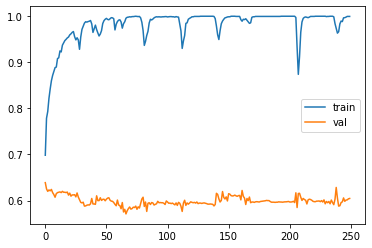

Epoch 1/250
90/93 [============================>.] - ETA: 0s - loss: 1.1073 - acc: 0.7712
Epoch 00001: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 1.0753 - acc: 0.7778 - val_loss: 1.6821 - val_acc: 0.6423
Epoch 2/250
92/93 [============================>.] - ETA: 0s - loss: 0.6791 - acc: 0.8247
Epoch 00002: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.6736 - acc: 0.8263 - val_loss: 1.3859 - val_acc: 0.6184
Epoch 3/250
91/93 [============================>.] - ETA: 0s - loss: 0.4905 - acc: 0.8376
Epoch 00003: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.4818 - acc: 0.8407 - val_loss: 1.2729 - val_acc: 0.6315
Epoch 4/250
90/93 [============================>.] - ETA: 0s - loss: 0.3919 - acc: 0.8698
Epoch 00004: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.3817 - acc: 0.87

Epoch 32/250
91/93 [============================>.] - ETA: 0s - loss: 0.0542 - acc: 0.9887
Epoch 00032: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0537 - acc: 0.9889 - val_loss: 1.5921 - val_acc: 0.6438
Epoch 33/250
93/93 [==============================] - ETA: 0s - loss: 0.0554 - acc: 0.9862
Epoch 00033: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0554 - acc: 0.9862 - val_loss: 1.5977 - val_acc: 0.6500
Epoch 34/250
90/93 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9847
Epoch 00034: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 19ms/step - loss: 0.0577 - acc: 0.9852 - val_loss: 1.6159 - val_acc: 0.6438
Epoch 35/250
90/93 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9868
Epoch 00035: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0525 - acc: 

92/93 [============================>.] - ETA: 0s - loss: 0.0337 - acc: 0.9925
Epoch 00063: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0334 - acc: 0.9926 - val_loss: 1.9125 - val_acc: 0.6396
Epoch 64/250
91/93 [============================>.] - ETA: 0s - loss: 0.0270 - acc: 0.9948
Epoch 00064: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0265 - acc: 0.9949 - val_loss: 1.9339 - val_acc: 0.6334
Epoch 65/250
89/93 [===========================>..] - ETA: 0s - loss: 0.0232 - acc: 0.9937
Epoch 00065: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0224 - acc: 0.9939 - val_loss: 1.9751 - val_acc: 0.6315
Epoch 66/250
93/93 [==============================] - ETA: 0s - loss: 0.0215 - acc: 0.9949
Epoch 00066: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0215 - acc: 0.9949 - val_

90/93 [============================>.] - ETA: 0s - loss: 0.0287 - acc: 0.9937
Epoch 00094: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0279 - acc: 0.9939 - val_loss: 2.0253 - val_acc: 0.6415
Epoch 95/250
91/93 [============================>.] - ETA: 0s - loss: 0.0298 - acc: 0.9921
Epoch 00095: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0293 - acc: 0.9923 - val_loss: 2.0868 - val_acc: 0.6353
Epoch 96/250
89/93 [===========================>..] - ETA: 0s - loss: 0.0210 - acc: 0.9940
Epoch 00096: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0202 - acc: 0.9943 - val_loss: 2.0609 - val_acc: 0.6380
Epoch 97/250
92/93 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9980
Epoch 00097: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0118 - acc: 0.9980 - val_

89/93 [===========================>..] - ETA: 0s - loss: 0.0043 - acc: 0.9993
Epoch 00125: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 2.2071 - val_acc: 0.6357
Epoch 126/250
93/93 [==============================] - ETA: 0s - loss: 0.0036 - acc: 0.9997
Epoch 00126: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 18ms/step - loss: 0.0036 - acc: 0.9997 - val_loss: 2.2318 - val_acc: 0.6384
Epoch 127/250
91/93 [============================>.] - ETA: 0s - loss: 0.0032 - acc: 0.9997
Epoch 00127: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0032 - acc: 0.9997 - val_loss: 2.2564 - val_acc: 0.6369
Epoch 128/250
91/93 [============================>.] - ETA: 0s - loss: 0.0030 - acc: 0.9997
Epoch 00128: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0029 - acc: 0.9997 - v

92/93 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00156: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.5268 - val_acc: 0.6264
Epoch 157/250
89/93 [===========================>..] - ETA: 0s - loss: 0.0012 - acc: 1.0000- ETA: 0s - loss: 0.0012 - a
Epoch 00157: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5455 - val_acc: 0.6264
Epoch 158/250
92/93 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.5638 - val_acc: 0.6261
Epoch 159/250
89/93 [===========================>..] - ETA: 0s - loss: 0.0011 - acc: 1.0000  
Epoch 00159: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - 

93/93 [==============================] - ETA: 0s - loss: 2.2902e-04 - acc: 1.0000
Epoch 00186: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 2.2902e-04 - acc: 1.0000 - val_loss: 3.0276 - val_acc: 0.6241
Epoch 187/250
93/93 [==============================] - ETA: 0s - loss: 2.1722e-04 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 2.1722e-04 - acc: 1.0000 - val_loss: 3.0440 - val_acc: 0.6241
Epoch 188/250
89/93 [===========================>..] - ETA: 0s - loss: 2.0849e-04 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 2.0613e-04 - acc: 1.0000 - val_loss: 3.0603 - val_acc: 0.6241
Epoch 189/250
90/93 [============================>.] - ETA: 0s - loss: 1.9751e-04 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - lo

Epoch 216/250
90/93 [============================>.] - ETA: 0s - loss: 5.7694e-05 - acc: 1.0000- ETA: 0s - loss: 6.1419e-0
Epoch 00216: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 16ms/step - loss: 5.7205e-05 - acc: 1.0000 - val_loss: 3.4674 - val_acc: 0.6210
Epoch 217/250
90/93 [============================>.] - ETA: 0s - loss: 5.5292e-05 - acc: 1.0000- ETA: 0s - loss: 5.3291e-0
Epoch 00217: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 5.4821e-05 - acc: 1.0000 - val_loss: 3.4813 - val_acc: 0.6210
Epoch 218/250
92/93 [============================>.] - ETA: 0s - loss: 5.2693e-05 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 5.2542e-05 - acc: 1.0000 - val_loss: 3.4953 - val_acc: 0.6218
Epoch 219/250
89/93 [===========================>..] - ETA: 0s - loss: 5.0908e-05 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_

Epoch 247/250
90/93 [============================>.] - ETA: 0s - loss: 0.0039 - acc: 0.9997
Epoch 00247: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0038 - acc: 0.9997 - val_loss: 2.5843 - val_acc: 0.6511
Epoch 248/250
92/93 [============================>.] - ETA: 0s - loss: 0.0046 - acc: 0.9997
Epoch 00248: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0046 - acc: 0.9997 - val_loss: 2.5804 - val_acc: 0.6484
Epoch 249/250
90/93 [============================>.] - ETA: 0s - loss: 0.0028 - acc: 0.9997
Epoch 00249: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0027 - acc: 0.9997 - val_loss: 2.5958 - val_acc: 0.6496
Epoch 250/250
91/93 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
93/93 [==============================] - 2s 17ms/step - loss: 0.0023 - a

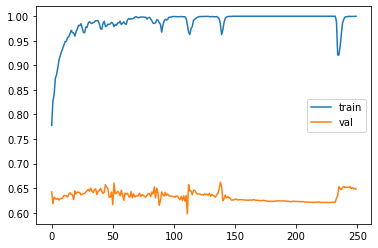

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 3.0450 - acc: 0.6124
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 3.0161 - acc: 0.6159 - val_loss: 2.2398 - val_acc: 0.6600
Epoch 2/250
76/78 [============================>.] - ETA: 0s - loss: 1.5718 - acc: 0.6641
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 1.5462 - acc: 0.6661 - val_loss: 1.5771 - val_acc: 0.6496
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 0.8919 - acc: 0.7035
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.8917 - acc: 0.7051 - val_loss: 1.4030 - val_acc: 0.6573
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.7327 - acc: 0.7228
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.7286 - acc: 0.72

78/78 [==============================] - ETA: 0s - loss: 0.3091 - acc: 0.8775
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3091 - acc: 0.8775 - val_loss: 1.3152 - val_acc: 0.6423
Epoch 33/250
77/78 [============================>.] - ETA: 0s - loss: 0.2943 - acc: 0.8835
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2918 - acc: 0.8847 - val_loss: 1.3302 - val_acc: 0.6453
Epoch 34/250
76/78 [============================>.] - ETA: 0s - loss: 0.3182 - acc: 0.8762
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3121 - acc: 0.8791 - val_loss: 1.3442 - val_acc: 0.6446
Epoch 35/250
77/78 [============================>.] - ETA: 0s - loss: 0.3121 - acc: 0.8600
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3093 - acc: 0.8614 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.2091 - acc: 0.9211
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2070 - acc: 0.9217 - val_loss: 1.6998 - val_acc: 0.6449
Epoch 64/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2114 - acc: 0.9117
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2051 - acc: 0.9148 - val_loss: 1.7212 - val_acc: 0.6507
Epoch 65/250
78/78 [==============================] - ETA: 0s - loss: 0.1518 - acc: 0.9385
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1518 - acc: 0.9385 - val_loss: 1.7227 - val_acc: 0.6446
Epoch 66/250
76/78 [============================>.] - ETA: 0s - loss: 0.1264 - acc: 0.9465
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1238 - acc: 0.9478 - val_

Epoch 95/250
76/78 [============================>.] - ETA: 0s - loss: 0.0766 - acc: 0.9638
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0750 - acc: 0.9646 - val_loss: 2.0013 - val_acc: 0.6449
Epoch 96/250
78/78 [==============================] - ETA: 0s - loss: 0.0866 - acc: 0.9550
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0866 - acc: 0.9550 - val_loss: 2.0154 - val_acc: 0.6392
Epoch 97/250
76/78 [============================>.] - ETA: 0s - loss: 0.1488 - acc: 0.9375
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1456 - acc: 0.9389 - val_loss: 2.0011 - val_acc: 0.6476
Epoch 98/250
78/78 [==============================] - ETA: 0s - loss: 0.1214 - acc: 0.9353
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1214 - acc: 

78/78 [==============================] - ETA: 0s - loss: 0.0480 - acc: 0.9847
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0480 - acc: 0.9847 - val_loss: 2.0898 - val_acc: 0.6349
Epoch 127/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5631 - acc: 0.8242
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5511 - acc: 0.8297 - val_loss: 1.8342 - val_acc: 0.6476
Epoch 128/250
76/78 [============================>.] - ETA: 0s - loss: 0.2831 - acc: 0.8828
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2815 - acc: 0.8851 - val_loss: 1.7892 - val_acc: 0.6500
Epoch 129/250
77/78 [============================>.] - ETA: 0s - loss: 0.2216 - acc: 0.9233
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2196 - acc: 0.9241 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9877
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0432 - acc: 0.9879 - val_loss: 2.2388 - val_acc: 0.6415
Epoch 158/250
78/78 [==============================] - ETA: 0s - loss: 0.0286 - acc: 0.9904
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0286 - acc: 0.9904 - val_loss: 2.2561 - val_acc: 0.6442
Epoch 159/250
76/78 [============================>.] - ETA: 0s - loss: 0.0280 - acc: 0.9905
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0274 - acc: 0.9908 - val_loss: 2.2627 - val_acc: 0.6446
Epoch 160/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0170 - acc: 0.9962
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0164 - acc: 0.9964 - v

78/78 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.5283 - val_acc: 0.6307
Epoch 189/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0026 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 2.5446 - val_acc: 0.6303
Epoch 190/250
77/78 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.5608 - val_acc: 0.6303
Epoch 191/250
77/78 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0023 - acc: 1.0000 - v

Epoch 219/250
77/78 [============================>.] - ETA: 0s - loss: 5.9196e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 5.8808e-04 - acc: 1.0000 - val_loss: 2.9878 - val_acc: 0.6218
Epoch 220/250
74/78 [===========================>..] - ETA: 0s - loss: 5.6580e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 5.6329e-04 - acc: 1.0000 - val_loss: 3.0019 - val_acc: 0.6218
Epoch 221/250
76/78 [============================>.] - ETA: 0s - loss: 5.4551e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 5.3966e-04 - acc: 1.0000 - val_loss: 3.0160 - val_acc: 0.6214
Epoch 222/250
77/78 [============================>.] - ETA: 0s - loss: 5.2053e-04 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 

75/78 [===========================>..] - ETA: 0s - loss: 1.7414e-04 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.7477e-04 - acc: 1.0000 - val_loss: 3.4056 - val_acc: 0.6180
Epoch 250/250
76/78 [============================>.] - ETA: 0s - loss: 1.6965e-04 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.6827e-04 - acc: 1.0000 - val_loss: 3.4192 - val_acc: 0.6180


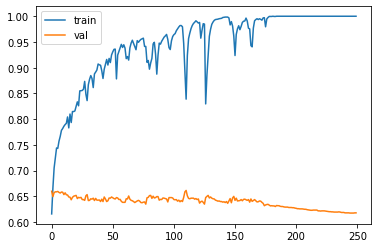

Epoch 1/250
76/78 [============================>.] - ETA: 0s - loss: 1.3626 - acc: 0.7796
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.3348 - acc: 0.7830 - val_loss: 2.1904 - val_acc: 0.6565
Epoch 2/250
74/78 [===========================>..] - ETA: 0s - loss: 0.8689 - acc: 0.8273
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.8437 - acc: 0.8264 - val_loss: 1.3467 - val_acc: 0.6654
Epoch 3/250
76/78 [============================>.] - ETA: 0s - loss: 0.5510 - acc: 0.8347
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5451 - acc: 0.8357 - val_loss: 1.2395 - val_acc: 0.6635
Epoch 4/250
76/78 [============================>.] - ETA: 0s - loss: 0.4817 - acc: 0.8351
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4760 - acc: 0.83

78/78 [==============================] - ETA: 0s - loss: 0.1229 - acc: 0.9610
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1229 - acc: 0.9610 - val_loss: 1.6591 - val_acc: 0.6457
Epoch 33/250
78/78 [==============================] - ETA: 0s - loss: 0.1114 - acc: 0.9598
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.1114 - acc: 0.9598 - val_loss: 1.7026 - val_acc: 0.6434
Epoch 34/250
77/78 [============================>.] - ETA: 0s - loss: 0.0877 - acc: 0.9756- ETA: 0s - loss: 0.0801 - acc: 
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0869 - acc: 0.9759 - val_loss: 1.7426 - val_acc: 0.6446
Epoch 35/250
77/78 [============================>.] - ETA: 0s - loss: 0.0790 - acc: 0.9801
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - l

75/78 [===========================>..] - ETA: 0s - loss: 0.0305 - acc: 0.9933
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0296 - acc: 0.9936 - val_loss: 2.1548 - val_acc: 0.6330
Epoch 64/250
78/78 [==============================] - ETA: 0s - loss: 0.0298 - acc: 0.9944
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0298 - acc: 0.9944 - val_loss: 2.1765 - val_acc: 0.6353
Epoch 65/250
78/78 [==============================] - ETA: 0s - loss: 0.0287 - acc: 0.9940
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0287 - acc: 0.9940 - val_loss: 2.1950 - val_acc: 0.6280
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.0287 - acc: 0.9939
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0284 - acc: 0.9940 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.0542 - acc: 0.9827
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0531 - acc: 0.9831 - val_loss: 2.1406 - val_acc: 0.6338
Epoch 95/250
78/78 [==============================] - ETA: 0s - loss: 0.0343 - acc: 0.9888
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0343 - acc: 0.9888 - val_loss: 2.2153 - val_acc: 0.6365
Epoch 96/250
76/78 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9918
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0241 - acc: 0.9920 - val_loss: 2.1856 - val_acc: 0.6407
Epoch 97/250
76/78 [============================>.] - ETA: 0s - loss: 0.0195 - acc: 0.9967
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0191 - acc: 0.9968 - val_

78/78 [==============================] - ETA: 0s - loss: 0.0116 - acc: 0.9984
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0116 - acc: 0.9984 - val_loss: 2.2601 - val_acc: 0.6407
Epoch 126/250
77/78 [============================>.] - ETA: 0s - loss: 0.0136 - acc: 0.9980
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0135 - acc: 0.9980 - val_loss: 2.2692 - val_acc: 0.6396
Epoch 127/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.9996
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0081 - acc: 0.9996 - val_loss: 2.3149 - val_acc: 0.6396
Epoch 128/250
76/78 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9992
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0083 - acc: 0.9992 - v

78/78 [==============================] - ETA: 0s - loss: 0.0071 - acc: 0.9988
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0071 - acc: 0.9988 - val_loss: 2.5094 - val_acc: 0.6349
Epoch 157/250
76/78 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9975
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0106 - acc: 0.9976 - val_loss: 2.4877 - val_acc: 0.6353
Epoch 158/250
78/78 [==============================] - ETA: 0s - loss: 0.0047 - acc: 0.9996
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0047 - acc: 0.9996 - val_loss: 2.5257 - val_acc: 0.6399
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0040 - acc: 0.9996
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0039 - acc: 0.9996 - v

Epoch 187/250
76/78 [============================>.] - ETA: 0s - loss: 5.1441e-04 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 5.1105e-04 - acc: 1.0000 - val_loss: 2.9798 - val_acc: 0.6299
Epoch 188/250
78/78 [==============================] - ETA: 0s - loss: 4.8780e-04 - acc: 1.0000- ETA: 0s - loss: 5.1818e-04 - acc: 1
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 4.8780e-04 - acc: 1.0000 - val_loss: 2.9929 - val_acc: 0.6295
Epoch 189/250
76/78 [============================>.] - ETA: 0s - loss: 4.6889e-04 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 4.6583e-04 - acc: 1.0000 - val_loss: 3.0062 - val_acc: 0.6295
Epoch 190/250
77/78 [============================>.] - ETA: 0s - loss: 4.4790e-04 - acc: 1.0000- ETA: 0s - loss: 6.3472e-04
Epoch 00190: saving model to 

Epoch 217/250
76/78 [============================>.] - ETA: 0s - loss: 1.4757e-04 - acc: 1.0000
Epoch 00217: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.4662e-04 - acc: 1.0000 - val_loss: 3.3358 - val_acc: 0.6264
Epoch 218/250
78/78 [==============================] - ETA: 0s - loss: 1.4111e-04 - acc: 1.0000- ETA: 0s - loss: 1.6829e-04 - a
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 1.4111e-04 - acc: 1.0000 - val_loss: 3.3470 - val_acc: 0.6264
Epoch 219/250
76/78 [============================>.] - ETA: 0s - loss: 1.3670e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 1.3582e-04 - acc: 1.0000 - val_loss: 3.3583 - val_acc: 0.6268
Epoch 220/250
77/78 [============================>.] - ETA: 0s - loss: 1.3143e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [=====

74/78 [===========================>..] - ETA: 0s - loss: 4.8571e-05 - acc: 1.0000
Epoch 00247: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 4.8100e-05 - acc: 1.0000 - val_loss: 3.6788 - val_acc: 0.6218
Epoch 248/250
74/78 [===========================>..] - ETA: 0s - loss: 4.6837e-05 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 4.6384e-05 - acc: 1.0000 - val_loss: 3.6906 - val_acc: 0.6218
Epoch 249/250
78/78 [==============================] - ETA: 0s - loss: 4.4731e-05 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 4.4731e-05 - acc: 1.0000 - val_loss: 3.7023 - val_acc: 0.6218
Epoch 250/250
74/78 [===========================>..] - ETA: 0s - loss: 4.3556e-05 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - lo

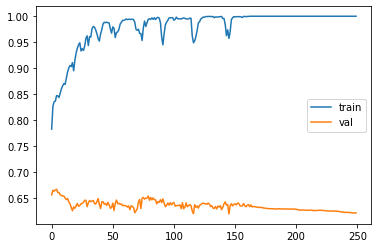

Epoch 1/250
87/88 [============================>.] - ETA: 0s - loss: 1.3578 - acc: 0.8405
Epoch 00001: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 1.3481 - acc: 0.8417 - val_loss: 3.1532 - val_acc: 0.6542
Epoch 2/250
86/88 [============================>.] - ETA: 0s - loss: 0.7275 - acc: 0.8823
Epoch 00002: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.7241 - acc: 0.8816 - val_loss: 2.3599 - val_acc: 0.6496
Epoch 3/250
88/88 [==============================] - ETA: 0s - loss: 0.4944 - acc: 0.8784
Epoch 00003: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.4944 - acc: 0.8784 - val_loss: 2.0297 - val_acc: 0.6288
Epoch 4/250
85/88 [===========================>..] - ETA: 0s - loss: 0.3554 - acc: 0.9026
Epoch 00004: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.3565 - acc: 0.90

87/88 [============================>.] - ETA: 0s - loss: 0.1297 - acc: 0.9587
Epoch 00032: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.1288 - acc: 0.9590 - val_loss: 1.9396 - val_acc: 0.6207
Epoch 33/250
88/88 [==============================] - ETA: 0s - loss: 0.1161 - acc: 0.9636
Epoch 00033: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 0.1161 - acc: 0.9636 - val_loss: 1.9463 - val_acc: 0.6191
Epoch 34/250
85/88 [===========================>..] - ETA: 0s - loss: 0.1611 - acc: 0.9515
Epoch 00034: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.1571 - acc: 0.9529 - val_loss: 1.8878 - val_acc: 0.6222
Epoch 35/250
84/88 [===========================>..] - ETA: 0s - loss: 0.1225 - acc: 0.9624
Epoch 00035: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.1181 - acc: 0.9640 - val_

86/88 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9913
Epoch 00063: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.0349 - acc: 0.9914 - val_loss: 2.4803 - val_acc: 0.6199
Epoch 64/250
87/88 [============================>.] - ETA: 0s - loss: 0.1239 - acc: 0.9662
Epoch 00064: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 0.1231 - acc: 0.9665 - val_loss: 2.5239 - val_acc: 0.6106
Epoch 65/250
88/88 [==============================] - ETA: 0s - loss: 0.2262 - acc: 0.9451
Epoch 00065: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.2262 - acc: 0.9451 - val_loss: 2.4265 - val_acc: 0.6083
Epoch 66/250
86/88 [============================>.] - ETA: 0s - loss: 0.0933 - acc: 0.9691
Epoch 00066: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.0918 - acc: 0.9697 - val_

87/88 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.9993
Epoch 00094: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.0070 - acc: 0.9993 - val_loss: 2.6810 - val_acc: 0.6191
Epoch 95/250
88/88 [==============================] - ETA: 0s - loss: 0.0070 - acc: 0.9993
Epoch 00095: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 0.0070 - acc: 0.9993 - val_loss: 2.6878 - val_acc: 0.6180
Epoch 96/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0071 - acc: 0.9993
Epoch 00096: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.0069 - acc: 0.9993 - val_loss: 2.6888 - val_acc: 0.6172
Epoch 97/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0218 - acc: 0.9949
Epoch 00097: saving model to Model\lstm_model5.h5
88/88 [==============================] - 1s 17ms/step - loss: 0.0212 - acc: 0.9950 - val_

86/88 [============================>.] - ETA: 0s - loss: 0.0624 - acc: 0.9866
Epoch 00125: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 0.0613 - acc: 0.9868 - val_loss: 2.0518 - val_acc: 0.6126
Epoch 126/250
86/88 [============================>.] - ETA: 0s - loss: 0.0512 - acc: 0.9895- ETA: 0s - loss: 0.0763 
Epoch 00126: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss: 0.0504 - acc: 0.9897 - val_loss: 2.1100 - val_acc: 0.6118
Epoch 127/250
84/88 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9900
Epoch 00127: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0404 - acc: 0.9904 - val_loss: 2.1505 - val_acc: 0.6114
Epoch 128/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0361 - acc: 0.9912
Epoch 00128: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 17ms/step - loss:

85/88 [===========================>..] - ETA: 0s - loss: 0.0049 - acc: 0.9996
Epoch 00156: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0070 - acc: 0.9989 - val_loss: 2.4664 - val_acc: 0.6234
Epoch 157/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.9996
Epoch 00157: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0059 - acc: 0.9993 - val_loss: 2.4854 - val_acc: 0.6234
Epoch 158/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.9993
Epoch 00158: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0074 - acc: 0.9986 - val_loss: 2.4999 - val_acc: 0.6214
Epoch 159/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.9982
Epoch 00159: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0079 - acc: 0.9979 - v

85/88 [===========================>..] - ETA: 0s - loss: 0.0758 - acc: 0.9776
Epoch 00187: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0739 - acc: 0.9782 - val_loss: 2.1869 - val_acc: 0.6234
Epoch 188/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0303 - acc: 0.9937
Epoch 00188: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 19ms/step - loss: 0.0296 - acc: 0.9939 - val_loss: 2.2495 - val_acc: 0.6222
Epoch 189/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0212 - acc: 0.9963
Epoch 00189: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0207 - acc: 0.9964 - val_loss: 2.2878 - val_acc: 0.6226
Epoch 190/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0147 - acc: 0.9967
Epoch 00190: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0144 - acc: 0.9968 - v

85/88 [===========================>..] - ETA: 0s - loss: 0.0356 - acc: 0.9945
Epoch 00218: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0376 - acc: 0.9939 - val_loss: 2.2956 - val_acc: 0.6195
Epoch 219/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0162 - acc: 0.9971
Epoch 00219: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0167 - acc: 0.9968 - val_loss: 2.2583 - val_acc: 0.6237
Epoch 220/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0091 - acc: 0.9985
Epoch 00220: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 19ms/step - loss: 0.0160 - acc: 0.9975 - val_loss: 2.2905 - val_acc: 0.6222
Epoch 221/250
85/88 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9989
Epoch 00221: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0083 - acc: 0.9982 - v

85/88 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 0.9996
Epoch 00249: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0033 - acc: 0.9996 - val_loss: 2.7135 - val_acc: 0.6268
Epoch 250/250
86/88 [============================>.] - ETA: 0s - loss: 0.0034 - acc: 0.9996
Epoch 00250: saving model to Model\lstm_model5.h5
88/88 [==============================] - 2s 18ms/step - loss: 0.0033 - acc: 0.9996 - val_loss: 2.7233 - val_acc: 0.6268


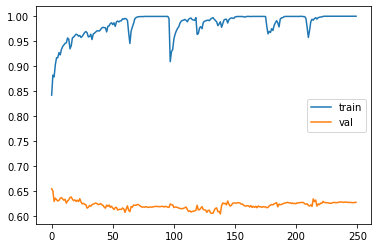

Epoch 1/250
81/82 [============================>.] - ETA: 0s - loss: 1.1627 - acc: 0.7824
Epoch 00001: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 1.1638 - acc: 0.7821 - val_loss: 1.2479 - val_acc: 0.6507
Epoch 2/250
79/82 [===========================>..] - ETA: 0s - loss: 0.5468 - acc: 0.8263- ETA: 0s - loss: 0.5403 - acc: 0.834
Epoch 00002: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.5404 - acc: 0.8265 - val_loss: 1.1196 - val_acc: 0.6426
Epoch 3/250
79/82 [===========================>..] - ETA: 0s - loss: 0.4769 - acc: 0.8445
Epoch 00003: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.4702 - acc: 0.8457 - val_loss: 1.1124 - val_acc: 0.6315
Epoch 4/250
79/82 [===========================>..] - ETA: 0s - loss: 0.4077 - acc: 0.8623
Epoch 00004: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s

81/82 [============================>.] - ETA: 0s - loss: 0.0416 - acc: 0.9927
Epoch 00032: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0416 - acc: 0.9927 - val_loss: 1.9813 - val_acc: 0.6033
Epoch 33/250
80/82 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9910
Epoch 00033: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0430 - acc: 0.9911 - val_loss: 2.0289 - val_acc: 0.6006
Epoch 34/250
80/82 [============================>.] - ETA: 0s - loss: 0.0432 - acc: 0.9914
Epoch 00034: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0428 - acc: 0.9915 - val_loss: 2.0071 - val_acc: 0.6029
Epoch 35/250
80/82 [============================>.] - ETA: 0s - loss: 0.0698 - acc: 0.9844
Epoch 00035: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0690 - acc: 0.9846 - val_

Epoch 64/250
80/82 [============================>.] - ETA: 0s - loss: 0.0205 - acc: 0.9969
Epoch 00064: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 0.0202 - acc: 0.9969 - val_loss: 2.2186 - val_acc: 0.6029
Epoch 65/250
79/82 [===========================>..] - ETA: 0s - loss: 0.0194 - acc: 0.9968
Epoch 00065: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 0.0192 - acc: 0.9969 - val_loss: 2.2519 - val_acc: 0.6052
Epoch 66/250
81/82 [============================>.] - ETA: 0s - loss: 0.0187 - acc: 0.9969
Epoch 00066: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0187 - acc: 0.9969 - val_loss: 2.2799 - val_acc: 0.6052
Epoch 67/250
78/82 [===========================>..] - ETA: 0s - loss: 0.0184 - acc: 0.9972
Epoch 00067: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0180 - acc: 

82/82 [==============================] - ETA: 0s - loss: 0.0110 - acc: 0.9985
Epoch 00095: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0110 - acc: 0.9985 - val_loss: 2.5047 - val_acc: 0.6037
Epoch 96/250
81/82 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9985
Epoch 00096: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0109 - acc: 0.9985 - val_loss: 2.5184 - val_acc: 0.6037
Epoch 97/250
82/82 [==============================] - ETA: 0s - loss: 0.0108 - acc: 0.9985
Epoch 00097: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0108 - acc: 0.9985 - val_loss: 2.5314 - val_acc: 0.6037
Epoch 98/250
78/82 [===========================>..] - ETA: 0s - loss: 0.0110 - acc: 0.9984
Epoch 00098: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0107 - acc: 0.9985 - val_

81/82 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.9985
Epoch 00126: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0077 - acc: 0.9985 - val_loss: 2.8716 - val_acc: 0.6130
Epoch 127/250
80/82 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9984
Epoch 00127: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0075 - acc: 0.9985 - val_loss: 2.8895 - val_acc: 0.6133
Epoch 128/250
82/82 [==============================] - ETA: 0s - loss: 0.0074 - acc: 0.9985
Epoch 00128: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0074 - acc: 0.9985 - val_loss: 2.9050 - val_acc: 0.6133
Epoch 129/250
80/82 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.9984
Epoch 00129: saving model to Model\lstm_model5.h5
82/82 [==============================] - 1s 18ms/step - loss: 0.0072 - acc: 0.9985 - v

81/82 [============================>.] - ETA: 0s - loss: 0.1133 - acc: 0.9715
Epoch 00157: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 20ms/step - loss: 0.1132 - acc: 0.9715 - val_loss: 2.0150 - val_acc: 0.6137
Epoch 158/250
81/82 [============================>.] - ETA: 0s - loss: 0.0609 - acc: 0.9823
Epoch 00158: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 24ms/step - loss: 0.0609 - acc: 0.9823 - val_loss: 2.0629 - val_acc: 0.6025
Epoch 159/250
80/82 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9875
Epoch 00159: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 20ms/step - loss: 0.0448 - acc: 0.9877 - val_loss: 2.0762 - val_acc: 0.6114
Epoch 160/250
80/82 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9910
Epoch 00160: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 23ms/step - loss: 0.0361 - acc: 0.9911 - v

79/82 [===========================>..] - ETA: 0s - loss: 0.0174 - acc: 0.9945
Epoch 00188: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 21ms/step - loss: 0.0170 - acc: 0.9946 - val_loss: 2.3135 - val_acc: 0.6045
Epoch 189/250
79/82 [===========================>..] - ETA: 0s - loss: 0.0168 - acc: 0.9945
Epoch 00189: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 18ms/step - loss: 0.0164 - acc: 0.9946 - val_loss: 2.3274 - val_acc: 0.6037
Epoch 190/250
82/82 [==============================] - ETA: 0s - loss: 0.0158 - acc: 0.9946
Epoch 00190: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 0.0158 - acc: 0.9946 - val_loss: 2.3428 - val_acc: 0.6052
Epoch 191/250
81/82 [============================>.] - ETA: 0s - loss: 0.0152 - acc: 0.9946
Epoch 00191: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 22ms/step - loss: 0.0152 - acc: 0.9946 - v

81/82 [============================>.] - ETA: 0s - loss: 0.0263 - acc: 0.9900
Epoch 00219: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 20ms/step - loss: 0.0263 - acc: 0.9900 - val_loss: 2.4287 - val_acc: 0.6122
Epoch 220/250
80/82 [============================>.] - ETA: 0s - loss: 0.0332 - acc: 0.9859
Epoch 00220: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 20ms/step - loss: 0.0329 - acc: 0.9861 - val_loss: 2.4492 - val_acc: 0.6029
Epoch 221/250
79/82 [===========================>..] - ETA: 0s - loss: 0.0315 - acc: 0.9869
Epoch 00221: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 22ms/step - loss: 0.0308 - acc: 0.9873 - val_loss: 2.4821 - val_acc: 0.6010
Epoch 222/250
81/82 [============================>.] - ETA: 0s - loss: 0.0358 - acc: 0.9865
Epoch 00222: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 0.0358 - acc: 0.9865 - v

81/82 [============================>.] - ETA: 0s - loss: 0.0222 - acc: 0.9950
Epoch 00250: saving model to Model\lstm_model5.h5
82/82 [==============================] - 2s 19ms/step - loss: 0.0222 - acc: 0.9950 - val_loss: 2.6774 - val_acc: 0.6029


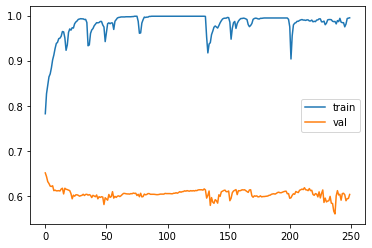

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 1.1178 - acc: 0.7545
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 1.1075 - acc: 0.7569 - val_loss: 1.7587 - val_acc: 0.5617
Epoch 2/250
77/78 [============================>.] - ETA: 0s - loss: 0.7206 - acc: 0.7666
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.7139 - acc: 0.7690 - val_loss: 1.3610 - val_acc: 0.5964
Epoch 3/250
77/78 [============================>.] - ETA: 0s - loss: 0.5510 - acc: 0.7979
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.5467 - acc: 0.7999 - val_loss: 1.2914 - val_acc: 0.6153
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.4607 - acc: 0.8222
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.4578 - acc: 0.82

Epoch 33/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0813 - acc: 0.9796
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0792 - acc: 0.9803 - val_loss: 2.3676 - val_acc: 0.5871
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1088 - acc: 0.9717
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1062 - acc: 0.9727 - val_loss: 2.3522 - val_acc: 0.5914
Epoch 35/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1262 - acc: 0.9633
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.1220 - acc: 0.9646 - val_loss: 2.3038 - val_acc: 0.5898
Epoch 36/250
78/78 [==============================] - ETA: 0s - loss: 0.1074 - acc: 0.9711
Epoch 00036: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1074 - acc: 

Epoch 65/250
77/78 [============================>.] - ETA: 0s - loss: 0.1196 - acc: 0.9696
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1210 - acc: 0.9687 - val_loss: 2.2204 - val_acc: 0.5948
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9903
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0486 - acc: 0.9904 - val_loss: 2.2512 - val_acc: 0.6029
Epoch 67/250
77/78 [============================>.] - ETA: 0s - loss: 0.0349 - acc: 0.9919
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0347 - acc: 0.9920 - val_loss: 2.3279 - val_acc: 0.5968
Epoch 68/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0277 - acc: 0.9946
Epoch 00068: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0270 - acc: 

Epoch 97/250
78/78 [==============================] - ETA: 0s - loss: 0.0137 - acc: 0.9988
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0137 - acc: 0.9988 - val_loss: 2.6415 - val_acc: 0.5887
Epoch 98/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0181 - acc: 0.9975
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0175 - acc: 0.9976 - val_loss: 2.6757 - val_acc: 0.5852
Epoch 99/250
78/78 [==============================] - ETA: 0s - loss: 0.0119 - acc: 0.9980
Epoch 00099: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0119 - acc: 0.9980 - val_loss: 2.6665 - val_acc: 0.5914
Epoch 100/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0166 - acc: 0.9962
Epoch 00100: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0162 - acc:

77/78 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9988
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0061 - acc: 0.9988 - val_loss: 2.8461 - val_acc: 0.6006
Epoch 129/250
77/78 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9980
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 2.8584 - val_acc: 0.5944
Epoch 130/250
77/78 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.9972
Epoch 00130: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0095 - acc: 0.9972 - val_loss: 2.9856 - val_acc: 0.5840
Epoch 131/250
77/78 [============================>.] - ETA: 0s - loss: 0.0330 - acc: 0.9903
Epoch 00131: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0327 - acc: 0.9904 - v

77/78 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9980
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0066 - acc: 0.9980 - val_loss: 2.8810 - val_acc: 0.5894
Epoch 160/250
77/78 [============================>.] - ETA: 0s - loss: 0.0089 - acc: 0.9976
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0088 - acc: 0.9976 - val_loss: 2.8182 - val_acc: 0.5995
Epoch 161/250
77/78 [============================>.] - ETA: 0s - loss: 0.0142 - acc: 0.9955
Epoch 00161: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0141 - acc: 0.9956 - val_loss: 2.8559 - val_acc: 0.5833
Epoch 162/250
77/78 [============================>.] - ETA: 0s - loss: 0.0856 - acc: 0.9748
Epoch 00162: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0847 - acc: 0.9751 - v

77/78 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9976
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0075 - acc: 0.9976 - val_loss: 2.9377 - val_acc: 0.5906
Epoch 191/250
77/78 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9984
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0075 - acc: 0.9984 - val_loss: 2.9213 - val_acc: 0.5979
Epoch 192/250
77/78 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 0.9992
Epoch 00192: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0048 - acc: 0.9992 - val_loss: 2.9475 - val_acc: 0.5937
Epoch 193/250
77/78 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9988
Epoch 00193: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0050 - acc: 0.9988 - v

77/78 [============================>.] - ETA: 0s - loss: 0.0044 - acc: 0.9992
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0044 - acc: 0.9992 - val_loss: 2.9114 - val_acc: 0.5948
Epoch 222/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0029 - acc: 0.9996
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0028 - acc: 0.9996 - val_loss: 2.9234 - val_acc: 0.5929
Epoch 223/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.9983
Epoch 00223: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0051 - acc: 0.9984 - val_loss: 2.9460 - val_acc: 0.5975
Epoch 224/250
76/78 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9992
Epoch 00224: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0066 - acc: 0.9992 - v

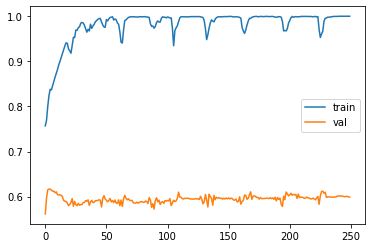

Epoch 1/250
85/87 [============================>.] - ETA: 0s - loss: 1.1719 - acc: 0.7842
Epoch 00001: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 1.1868 - acc: 0.7819 - val_loss: 2.1678 - val_acc: 0.5960
Epoch 2/250
87/87 [==============================] - ETA: 0s - loss: 0.6369 - acc: 0.8164
Epoch 00002: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.6369 - acc: 0.8164 - val_loss: 1.9609 - val_acc: 0.5925
Epoch 3/250
85/87 [============================>.] - ETA: 0s - loss: 0.4506 - acc: 0.8404
Epoch 00003: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.4496 - acc: 0.8397 - val_loss: 1.8935 - val_acc: 0.5948
Epoch 4/250
87/87 [==============================] - ETA: 0s - loss: 0.3787 - acc: 0.8494- ETA: 0s - loss: 0.
Epoch 00004: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss

85/87 [============================>.] - ETA: 0s - loss: 0.1802 - acc: 0.9254
Epoch 00032: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.1864 - acc: 0.9224 - val_loss: 2.1827 - val_acc: 0.5871
Epoch 33/250
84/87 [===========================>..] - ETA: 0s - loss: 0.1728 - acc: 0.9356
Epoch 00033: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.1721 - acc: 0.9360 - val_loss: 2.1943 - val_acc: 0.5825
Epoch 34/250
86/87 [============================>.] - ETA: 0s - loss: 0.1586 - acc: 0.9386
Epoch 00034: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.1591 - acc: 0.9386 - val_loss: 2.1983 - val_acc: 0.5848
Epoch 35/250
87/87 [==============================] - ETA: 0s - loss: 0.1499 - acc: 0.9389
Epoch 00035: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.1499 - acc: 0.9389 - val_

85/87 [============================>.] - ETA: 0s - loss: 0.1028 - acc: 0.9574
Epoch 00063: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.1079 - acc: 0.9565 - val_loss: 2.3513 - val_acc: 0.5848
Epoch 64/250
86/87 [============================>.] - ETA: 0s - loss: 0.0973 - acc: 0.9597
Epoch 00064: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0969 - acc: 0.9598 - val_loss: 2.4226 - val_acc: 0.5756
Epoch 65/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0714 - acc: 0.9759
Epoch 00065: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0734 - acc: 0.9745 - val_loss: 2.4257 - val_acc: 0.5740
Epoch 66/250
87/87 [==============================] - ETA: 0s - loss: 0.0707 - acc: 0.9705
Epoch 00066: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0707 - acc: 0.9705 - val_

86/87 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9807
Epoch 00094: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0687 - acc: 0.9810 - val_loss: 2.4278 - val_acc: 0.5759
Epoch 95/250
87/87 [==============================] - ETA: 0s - loss: 0.0789 - acc: 0.9741
Epoch 00095: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0789 - acc: 0.9741 - val_loss: 2.4378 - val_acc: 0.5690
Epoch 96/250
85/87 [============================>.] - ETA: 0s - loss: 0.0695 - acc: 0.9757
Epoch 00096: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0690 - acc: 0.9763 - val_loss: 2.4612 - val_acc: 0.5652
Epoch 97/250
86/87 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9844
Epoch 00097: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0486 - acc: 0.9845 - val_

84/87 [===========================>..] - ETA: 0s - loss: 0.0184 - acc: 0.9959
Epoch 00125: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0182 - acc: 0.9960 - val_loss: 2.5951 - val_acc: 0.5574
Epoch 126/250
86/87 [============================>.] - ETA: 0s - loss: 0.0221 - acc: 0.9935
Epoch 00126: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0219 - acc: 0.9935 - val_loss: 2.6127 - val_acc: 0.5578
Epoch 127/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0293 - acc: 0.9903
Epoch 00127: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0288 - acc: 0.9907 - val_loss: 2.5715 - val_acc: 0.5582
Epoch 128/250
85/87 [============================>.] - ETA: 0s - loss: 0.0279 - acc: 0.9904
Epoch 00128: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0278 - acc: 0.9907 - v

87/87 [==============================] - ETA: 0s - loss: 0.0093 - acc: 0.9993
Epoch 00156: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0093 - acc: 0.9993 - val_loss: 2.7012 - val_acc: 0.5536
Epoch 157/250
87/87 [==============================] - ETA: 0s - loss: 0.0086 - acc: 0.9993
Epoch 00157: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0086 - acc: 0.9993 - val_loss: 2.7098 - val_acc: 0.5540
Epoch 158/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 2.7177 - val_acc: 0.5540
Epoch 159/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0073 - acc: 1.0000 - v

84/87 [===========================>..] - ETA: 0s - loss: 0.0247 - acc: 0.9914
Epoch 00187: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0249 - acc: 0.9914 - val_loss: 2.6575 - val_acc: 0.5628
Epoch 188/250
86/87 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9945
Epoch 00188: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0188 - acc: 0.9946 - val_loss: 2.6999 - val_acc: 0.5567
Epoch 189/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0209 - acc: 0.9952
Epoch 00189: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0230 - acc: 0.9946 - val_loss: 2.9132 - val_acc: 0.5320
Epoch 190/250
86/87 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9927
Epoch 00190: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0398 - acc: 0.9928 - v

85/87 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.9642 - val_acc: 0.5505
Epoch 219/250
85/87 [============================>.] - ETA: 0s - loss: 0.0025 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 2.9745 - val_acc: 0.5497
Epoch 220/250
87/87 [==============================] - ETA: 0s - loss: 0.0040 - acc: 0.9989
Epoch 00220: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0040 - acc: 0.9989 - val_loss: 2.9095 - val_acc: 0.5594
Epoch 221/250
84/87 [===========================>..] - ETA: 0s - loss: 0.1698 - acc: 0.9550
Epoch 00221: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.1646 - acc: 0.9565 - v

85/87 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 20ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 2.7590 - val_acc: 0.5752
Epoch 250/250
87/87 [==============================] - ETA: 0s - loss: 0.0027 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 2.7668 - val_acc: 0.5767


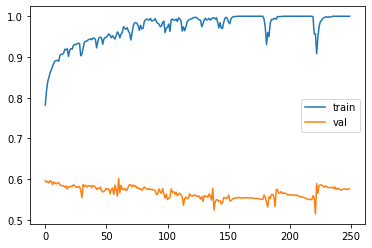

Epoch 1/250
85/89 [===========================>..] - ETA: 0s - loss: 1.7796 - acc: 0.6397
Epoch 00001: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 1.8407 - acc: 0.6322 - val_loss: 2.1152 - val_acc: 0.5744
Epoch 2/250
87/89 [============================>.] - ETA: 0s - loss: 1.0187 - acc: 0.6746
Epoch 00002: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 1.0436 - acc: 0.6712 - val_loss: 1.8780 - val_acc: 0.6095
Epoch 3/250
85/89 [===========================>..] - ETA: 0s - loss: 0.8033 - acc: 0.7118
Epoch 00003: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.8071 - acc: 0.7126 - val_loss: 1.6459 - val_acc: 0.6369
Epoch 4/250
87/89 [============================>.] - ETA: 0s - loss: 0.6824 - acc: 0.7378
Epoch 00004: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.6844 - acc: 0.73

89/89 [==============================] - ETA: 0s - loss: 0.2692 - acc: 0.8965
Epoch 00032: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.2692 - acc: 0.8965 - val_loss: 1.8496 - val_acc: 0.6056
Epoch 33/250
89/89 [==============================] - ETA: 0s - loss: 0.2625 - acc: 0.8948
Epoch 00033: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.2625 - acc: 0.8948 - val_loss: 1.9214 - val_acc: 0.5891
Epoch 34/250
89/89 [==============================] - ETA: 0s - loss: 0.2302 - acc: 0.9125
Epoch 00034: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.2302 - acc: 0.9125 - val_loss: 1.8770 - val_acc: 0.6002
Epoch 35/250
89/89 [==============================] - ETA: 0s - loss: 0.2236 - acc: 0.9178
Epoch 00035: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.2236 - acc: 0.9178 - val_

Epoch 64/250
87/89 [============================>.] - ETA: 0s - loss: 0.2117 - acc: 0.9296
Epoch 00064: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.2090 - acc: 0.9305 - val_loss: 2.1734 - val_acc: 0.5655
Epoch 65/250
88/89 [============================>.] - ETA: 0s - loss: 0.1905 - acc: 0.9357
Epoch 00065: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1901 - acc: 0.9359 - val_loss: 2.2363 - val_acc: 0.5636
Epoch 66/250
85/89 [===========================>..] - ETA: 0s - loss: 0.1801 - acc: 0.9408
Epoch 00066: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.1742 - acc: 0.9429 - val_loss: 2.2572 - val_acc: 0.5652
Epoch 67/250
85/89 [===========================>..] - ETA: 0s - loss: 0.1721 - acc: 0.9456
Epoch 00067: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1664 - acc: 

87/89 [============================>.] - ETA: 0s - loss: 0.2152 - acc: 0.9282
Epoch 00095: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.2124 - acc: 0.9291 - val_loss: 2.4990 - val_acc: 0.5482
Epoch 96/250
86/89 [===========================>..] - ETA: 0s - loss: 0.2158 - acc: 0.9237
Epoch 00096: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.2107 - acc: 0.9256 - val_loss: 2.4895 - val_acc: 0.5451
Epoch 97/250
88/89 [============================>.] - ETA: 0s - loss: 0.1717 - acc: 0.9435
Epoch 00097: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.1713 - acc: 0.9437 - val_loss: 2.4904 - val_acc: 0.5517
Epoch 98/250
87/89 [============================>.] - ETA: 0s - loss: 0.1402 - acc: 0.9547- ETA: 0s - loss: 0.2
Epoch 00098: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.1384

85/89 [===========================>..] - ETA: 0s - loss: 0.1937 - acc: 0.9180
Epoch 00126: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.1874 - acc: 0.9210 - val_loss: 2.6454 - val_acc: 0.5520
Epoch 127/250
86/89 [===========================>..] - ETA: 0s - loss: 0.1819 - acc: 0.9270
Epoch 00127: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.1777 - acc: 0.9288 - val_loss: 2.6533 - val_acc: 0.5590
Epoch 128/250
88/89 [============================>.] - ETA: 0s - loss: 0.1668 - acc: 0.9364
Epoch 00128: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1665 - acc: 0.9366 - val_loss: 2.7144 - val_acc: 0.5517
Epoch 129/250
86/89 [===========================>..] - ETA: 0s - loss: 0.1772 - acc: 0.9335
Epoch 00129: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1731 - acc: 0.9352 - v

85/89 [===========================>..] - ETA: 0s - loss: 0.1348 - acc: 0.9518
Epoch 00157: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1305 - acc: 0.9536 - val_loss: 2.8241 - val_acc: 0.5235
Epoch 158/250
87/89 [============================>.] - ETA: 0s - loss: 0.1287 - acc: 0.9526
Epoch 00158: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1271 - acc: 0.9532 - val_loss: 2.8104 - val_acc: 0.5247
Epoch 159/250
89/89 [==============================] - ETA: 0s - loss: 0.1232 - acc: 0.9564
Epoch 00159: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.1232 - acc: 0.9564 - val_loss: 2.8683 - val_acc: 0.5220
Epoch 160/250
87/89 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9594
Epoch 00160: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1152 - acc: 0.9600 - v

86/89 [===========================>..] - ETA: 0s - loss: 0.1148 - acc: 0.9564
Epoch 00188: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1123 - acc: 0.9575 - val_loss: 2.7166 - val_acc: 0.5239
Epoch 189/250
88/89 [============================>.] - ETA: 0s - loss: 0.1042 - acc: 0.9641
Epoch 00189: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1040 - acc: 0.9642 - val_loss: 2.8293 - val_acc: 0.5162
Epoch 190/250
87/89 [============================>.] - ETA: 0s - loss: 0.0998 - acc: 0.9616
Epoch 00190: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0986 - acc: 0.9621 - val_loss: 2.8511 - val_acc: 0.5127
Epoch 191/250
88/89 [============================>.] - ETA: 0s - loss: 0.0956 - acc: 0.9656
Epoch 00191: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0954 - acc: 0.9656 - v

89/89 [==============================] - ETA: 0s - loss: 0.0844 - acc: 0.9709
Epoch 00219: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0844 - acc: 0.9709 - val_loss: 2.7964 - val_acc: 0.5146
Epoch 220/250
85/89 [===========================>..] - ETA: 0s - loss: 0.0955 - acc: 0.9651
Epoch 00220: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.0924 - acc: 0.9663 - val_loss: 2.9216 - val_acc: 0.5120
Epoch 221/250
87/89 [============================>.] - ETA: 0s - loss: 0.1109 - acc: 0.9573
Epoch 00221: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.1095 - acc: 0.9578 - val_loss: 2.9299 - val_acc: 0.5100
Epoch 222/250
87/89 [============================>.] - ETA: 0s - loss: 0.0969 - acc: 0.9670
Epoch 00222: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0957 - acc: 0.9674 - v

85/89 [===========================>..] - ETA: 0s - loss: 0.0897 - acc: 0.9669
Epoch 00250: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0867 - acc: 0.9681 - val_loss: 3.1269 - val_acc: 0.5166


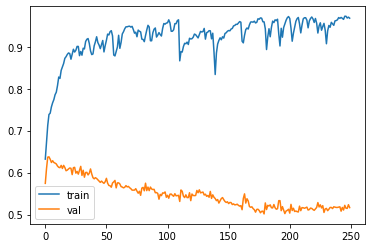

Epoch 1/250
79/81 [============================>.] - ETA: 0s - loss: 1.5973 - acc: 0.7235
Epoch 00001: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 1.5770 - acc: 0.7268 - val_loss: 1.6138 - val_acc: 0.6384
Epoch 2/250
79/81 [============================>.] - ETA: 0s - loss: 1.0073 - acc: 0.7654
Epoch 00002: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 20ms/step - loss: 0.9959 - acc: 0.7680 - val_loss: 1.3030 - val_acc: 0.6237
Epoch 3/250
80/81 [============================>.] - ETA: 0s - loss: 0.7429 - acc: 0.7898
Epoch 00003: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.7395 - acc: 0.7909 - val_loss: 1.1622 - val_acc: 0.6083
Epoch 4/250
79/81 [============================>.] - ETA: 0s - loss: 0.5968 - acc: 0.8097
Epoch 00004: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.5904 - acc: 0.81

78/81 [===========================>..] - ETA: 0s - loss: 0.2043 - acc: 0.9415
Epoch 00032: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.1996 - acc: 0.9433 - val_loss: 1.4649 - val_acc: 0.5759
Epoch 33/250
79/81 [============================>.] - ETA: 0s - loss: 0.2057 - acc: 0.9462
Epoch 00033: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.2030 - acc: 0.9471 - val_loss: 1.3964 - val_acc: 0.5921
Epoch 34/250
80/81 [============================>.] - ETA: 0s - loss: 0.1922 - acc: 0.9457
Epoch 00034: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.1914 - acc: 0.9460 - val_loss: 1.4957 - val_acc: 0.5860
Epoch 35/250
81/81 [==============================] - ETA: 0s - loss: 0.1729 - acc: 0.9530
Epoch 00035: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.1729 - acc: 0.9530 - val_

Epoch 64/250
81/81 [==============================] - ETA: 0s - loss: 0.0794 - acc: 0.9829
Epoch 00064: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 22ms/step - loss: 0.0794 - acc: 0.9829 - val_loss: 1.6748 - val_acc: 0.5964
Epoch 65/250
77/81 [===========================>..] - ETA: 0s - loss: 0.0838 - acc: 0.9777
Epoch 00065: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0810 - acc: 0.9786 - val_loss: 1.7456 - val_acc: 0.5933
Epoch 66/250
79/81 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9798
Epoch 00066: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0810 - acc: 0.9802 - val_loss: 1.7295 - val_acc: 0.5806
Epoch 67/250
80/81 [============================>.] - ETA: 0s - loss: 0.0790 - acc: 0.9785
Epoch 00067: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0787 - acc: 

80/81 [============================>.] - ETA: 0s - loss: 0.0486 - acc: 0.9887- ETA: 0s - loss: 0.0470 
Epoch 00095: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0483 - acc: 0.9887 - val_loss: 1.8755 - val_acc: 0.5910
Epoch 96/250
80/81 [============================>.] - ETA: 0s - loss: 0.0426 - acc: 0.9910
Epoch 00096: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0424 - acc: 0.9911 - val_loss: 1.9525 - val_acc: 0.5864
Epoch 97/250
81/81 [==============================] - ETA: 0s - loss: 0.0302 - acc: 0.9914
Epoch 00097: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0302 - acc: 0.9914 - val_loss: 1.9308 - val_acc: 0.5798
Epoch 98/250
77/81 [===========================>..] - ETA: 0s - loss: 0.0402 - acc: 0.9907
Epoch 00098: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.

79/81 [============================>.] - ETA: 0s - loss: 0.0461 - acc: 0.9858
Epoch 00126: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0453 - acc: 0.9860 - val_loss: 2.0731 - val_acc: 0.5802
Epoch 127/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0608 - acc: 0.9844
Epoch 00127: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0591 - acc: 0.9848 - val_loss: 2.0738 - val_acc: 0.5825
Epoch 128/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0477 - acc: 0.9844
Epoch 00128: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0463 - acc: 0.9848 - val_loss: 2.0965 - val_acc: 0.5848
Epoch 129/250
80/81 [============================>.] - ETA: 0s - loss: 0.0527 - acc: 0.9848
Epoch 00129: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 20ms/step - loss: 0.0525 - acc: 0.9848 - v

77/81 [===========================>..] - ETA: 0s - loss: 0.0339 - acc: 0.9919
Epoch 00157: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0326 - acc: 0.9922 - val_loss: 2.1439 - val_acc: 0.5918
Epoch 158/250
81/81 [==============================] - ETA: 0s - loss: 0.0200 - acc: 0.9957
Epoch 00158: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0200 - acc: 0.9957 - val_loss: 2.1778 - val_acc: 0.5906
Epoch 159/250
80/81 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9980
Epoch 00159: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0128 - acc: 0.9981 - val_loss: 2.2254 - val_acc: 0.5852
Epoch 160/250
81/81 [==============================] - ETA: 0s - loss: 0.0108 - acc: 0.9988
Epoch 00160: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0108 - acc: 0.9988 - v

79/81 [============================>.] - ETA: 0s - loss: 0.2370 - acc: 0.9331
Epoch 00188: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.2331 - acc: 0.9343 - val_loss: 1.8013 - val_acc: 0.6199
Epoch 189/250
79/81 [============================>.] - ETA: 0s - loss: 0.2116 - acc: 0.9426
Epoch 00189: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.2081 - acc: 0.9436 - val_loss: 1.9563 - val_acc: 0.5921
Epoch 190/250
79/81 [============================>.] - ETA: 0s - loss: 0.1069 - acc: 0.9707
Epoch 00190: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.1052 - acc: 0.9712 - val_loss: 1.8224 - val_acc: 0.6157
Epoch 191/250
80/81 [============================>.] - ETA: 0s - loss: 0.0975 - acc: 0.9723
Epoch 00191: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.0970 - acc: 0.9724 - v

77/81 [===========================>..] - ETA: 0s - loss: 0.0924 - acc: 0.9683
Epoch 00219: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 20ms/step - loss: 0.1156 - acc: 0.9639 - val_loss: 2.1665 - val_acc: 0.6103
Epoch 220/250
81/81 [==============================] - ETA: 0s - loss: 0.0646 - acc: 0.9771
Epoch 00220: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 20ms/step - loss: 0.0646 - acc: 0.9771 - val_loss: 2.2107 - val_acc: 0.6087
Epoch 221/250
78/81 [===========================>..] - ETA: 0s - loss: 0.0430 - acc: 0.9888
Epoch 00221: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 19ms/step - loss: 0.0450 - acc: 0.9880 - val_loss: 2.1123 - val_acc: 0.6149
Epoch 222/250
78/81 [===========================>..] - ETA: 0s - loss: 0.1049 - acc: 0.9756
Epoch 00222: saving model to Model\lstm_model5.h5
81/81 [==============================] - 1s 18ms/step - loss: 0.1041 - acc: 0.9755 - v

79/81 [============================>.] - ETA: 0s - loss: 0.0361 - acc: 0.9913
Epoch 00250: saving model to Model\lstm_model5.h5
81/81 [==============================] - 2s 20ms/step - loss: 0.0359 - acc: 0.9911 - val_loss: 2.3156 - val_acc: 0.6045


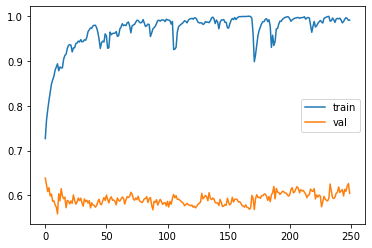

Epoch 1/250
 99/102 [============================>.] - ETA: 0s - loss: 1.7626 - acc: 0.6449
Epoch 00001: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 1.7459 - acc: 0.6486 - val_loss: 1.3571 - val_acc: 0.6800
Epoch 2/250
101/102 [============================>.] - ETA: 0s - loss: 1.1813 - acc: 0.6912
Epoch 00002: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 1.1770 - acc: 0.6924 - val_loss: 1.0739 - val_acc: 0.6793
Epoch 3/250
100/102 [============================>.] - ETA: 0s - loss: 0.7691 - acc: 0.7159
Epoch 00003: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.7597 - acc: 0.7198 - val_loss: 0.9580 - val_acc: 0.6793
Epoch 4/250
 99/102 [============================>.] - ETA: 0s - loss: 0.6462 - acc: 0.7364
Epoch 00004: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.

Epoch 32/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.3056 - acc: 0.8996
Epoch 00032: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.2980 - acc: 0.9029 - val_loss: 1.4147 - val_acc: 0.6503
Epoch 33/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.2696 - acc: 0.9098
Epoch 00033: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.2631 - acc: 0.9125 - val_loss: 1.4711 - val_acc: 0.6384
Epoch 34/250
102/102 [==============================] - ETA: 0s - loss: 0.2325 - acc: 0.9232
Epoch 00034: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.2325 - acc: 0.9232 - val_loss: 1.5363 - val_acc: 0.6372
Epoch 35/250
101/102 [============================>.] - ETA: 0s - loss: 0.2236 - acc: 0.9273
Epoch 00035: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss

Epoch 63/250
101/102 [============================>.] - ETA: 0s - loss: 0.2694 - acc: 0.9072
Epoch 00063: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.2685 - acc: 0.9075 - val_loss: 1.7288 - val_acc: 0.6164
Epoch 64/250
 99/102 [============================>.] - ETA: 0s - loss: 0.2562 - acc: 0.9198
Epoch 00064: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.2516 - acc: 0.9214 - val_loss: 1.6082 - val_acc: 0.6299
Epoch 65/250
101/102 [============================>.] - ETA: 0s - loss: 0.2288 - acc: 0.9211
Epoch 00065: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.2280 - acc: 0.9214 - val_loss: 1.7626 - val_acc: 0.6095
Epoch 66/250
 99/102 [============================>.] - ETA: 0s - loss: 0.1507 - acc: 0.9530
Epoch 00066: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss

Epoch 94/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0816 - acc: 0.9719
Epoch 00094: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0898 - acc: 0.9701 - val_loss: 2.2113 - val_acc: 0.5810
Epoch 95/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.1285 - acc: 0.9576
Epoch 00095: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.1262 - acc: 0.9587 - val_loss: 2.1540 - val_acc: 0.5894
Epoch 96/250
101/102 [============================>.] - ETA: 0s - loss: 0.3827 - acc: 0.8923
Epoch 00096: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.3813 - acc: 0.8927 - val_loss: 2.2350 - val_acc: 0.5621
Epoch 97/250
 99/102 [============================>.] - ETA: 0s - loss: 0.3200 - acc: 0.9059
Epoch 00097: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss

Epoch 125/250
 99/102 [============================>.] - ETA: 0s - loss: 0.0126 - acc: 0.9987
Epoch 00125: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0124 - acc: 0.9988 - val_loss: 2.5798 - val_acc: 0.5486
Epoch 126/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0121 - acc: 0.9990
Epoch 00126: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0118 - acc: 0.9991 - val_loss: 2.6013 - val_acc: 0.5470
Epoch 127/250
102/102 [==============================] - ETA: 0s - loss: 0.0112 - acc: 0.9988
Epoch 00127: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0112 - acc: 0.9988 - val_loss: 2.6208 - val_acc: 0.5470
Epoch 128/250
101/102 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9991
Epoch 00128: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - 

Epoch 156/250
101/102 [============================>.] - ETA: 0s - loss: 0.0271 - acc: 0.9932
Epoch 00156: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0270 - acc: 0.9932 - val_loss: 2.5731 - val_acc: 0.5601
Epoch 157/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0282 - acc: 0.9917
Epoch 00157: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0274 - acc: 0.9920 - val_loss: 2.4796 - val_acc: 0.5632
Epoch 158/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0304 - acc: 0.9901
Epoch 00158: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0295 - acc: 0.9904 - val_loss: 2.5236 - val_acc: 0.5605
Epoch 159/250
100/102 [============================>.] - ETA: 0s - loss: 0.0220 - acc: 0.9953
Epoch 00159: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - 

Epoch 187/250
100/102 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9984
Epoch 00187: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0083 - acc: 0.9985 - val_loss: 2.7572 - val_acc: 0.5609
Epoch 188/250
101/102 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.9991
Epoch 00188: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0070 - acc: 0.9991 - val_loss: 2.7718 - val_acc: 0.5648
Epoch 189/250
101/102 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9991
Epoch 00189: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0050 - acc: 0.9991 - val_loss: 2.7855 - val_acc: 0.5598
Epoch 190/250
100/102 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.9994
Epoch 00190: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - 

Epoch 218/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 0.9997
Epoch 00218: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0034 - acc: 0.9997 - val_loss: 2.9123 - val_acc: 0.5536
Epoch 219/250
100/102 [============================>.] - ETA: 0s - loss: 0.0034 - acc: 0.9997
Epoch 00219: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0033 - acc: 0.9997 - val_loss: 2.9297 - val_acc: 0.5520
Epoch 220/250
101/102 [============================>.] - ETA: 0s - loss: 0.0034 - acc: 0.9997
Epoch 00220: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - loss: 0.0034 - acc: 0.9997 - val_loss: 2.9526 - val_acc: 0.5517
Epoch 221/250
 98/102 [===========================>..] - ETA: 0s - loss: 0.0040 - acc: 0.9994
Epoch 00221: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 17ms/step - 

Epoch 249/250
101/102 [============================>.] - ETA: 0s - loss: 0.0029 - acc: 0.9997
Epoch 00249: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0029 - acc: 0.9997 - val_loss: 2.9531 - val_acc: 0.5540
Epoch 250/250
101/102 [============================>.] - ETA: 0s - loss: 0.0028 - acc: 0.9997
Epoch 00250: saving model to Model\lstm_model5.h5
102/102 [==============================] - 2s 18ms/step - loss: 0.0028 - acc: 0.9997 - val_loss: 2.9676 - val_acc: 0.5536


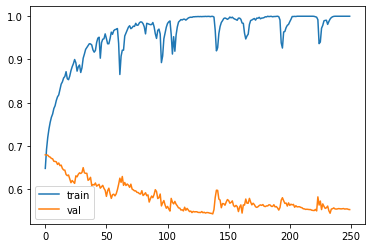

Epoch 1/250
77/79 [============================>.] - ETA: 0s - loss: 1.5014 - acc: 0.7589
Epoch 00001: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 19ms/step - loss: 1.4919 - acc: 0.7585 - val_loss: 1.9161 - val_acc: 0.6380
Epoch 2/250
77/79 [============================>.] - ETA: 0s - loss: 0.8538 - acc: 0.8218
Epoch 00002: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.8482 - acc: 0.8234 - val_loss: 1.7291 - val_acc: 0.6230
Epoch 3/250
77/79 [============================>.] - ETA: 0s - loss: 0.6280 - acc: 0.8324
Epoch 00003: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 19ms/step - loss: 0.6223 - acc: 0.8342 - val_loss: 1.6251 - val_acc: 0.6264
Epoch 4/250
77/79 [============================>.] - ETA: 0s - loss: 0.4877 - acc: 0.8620
Epoch 00004: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.4839 - acc: 0.86

Epoch 33/250
77/79 [============================>.] - ETA: 0s - loss: 0.1383 - acc: 0.9537
Epoch 00033: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.1368 - acc: 0.9543 - val_loss: 2.0630 - val_acc: 0.5636
Epoch 34/250
78/79 [============================>.] - ETA: 0s - loss: 0.1397 - acc: 0.9575
Epoch 00034: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.1397 - acc: 0.9575 - val_loss: 1.9167 - val_acc: 0.5864
Epoch 35/250
77/79 [============================>.] - ETA: 0s - loss: 0.1421 - acc: 0.9545
Epoch 00035: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.1408 - acc: 0.9547 - val_loss: 2.0927 - val_acc: 0.5721
Epoch 36/250
77/79 [============================>.] - ETA: 0s - loss: 0.1497 - acc: 0.9489
Epoch 00036: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.1480 - acc: 

Epoch 65/250
76/79 [===========================>..] - ETA: 0s - loss: 0.0273 - acc: 0.9934
Epoch 00065: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0274 - acc: 0.9936 - val_loss: 2.3145 - val_acc: 0.5594
Epoch 66/250
78/79 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9936
Epoch 00066: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 20ms/step - loss: 0.0265 - acc: 0.9936 - val_loss: 2.2752 - val_acc: 0.5617
Epoch 67/250
77/79 [============================>.] - ETA: 0s - loss: 0.0654 - acc: 0.9838
Epoch 00067: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 20ms/step - loss: 0.0647 - acc: 0.9840 - val_loss: 2.3946 - val_acc: 0.5513
Epoch 68/250
77/79 [============================>.] - ETA: 0s - loss: 0.0373 - acc: 0.9882
Epoch 00068: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.0369 - acc: 

Epoch 97/250
75/79 [===========================>..] - ETA: 0s - loss: 0.0672 - acc: 0.9779
Epoch 00097: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0653 - acc: 0.9784 - val_loss: 2.0570 - val_acc: 0.5883
Epoch 98/250
75/79 [===========================>..] - ETA: 0s - loss: 0.0769 - acc: 0.9742
Epoch 00098: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0925 - acc: 0.9688 - val_loss: 1.9156 - val_acc: 0.6157
Epoch 99/250
75/79 [===========================>..] - ETA: 0s - loss: 0.1082 - acc: 0.9646
Epoch 00099: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.1172 - acc: 0.9624 - val_loss: 1.9364 - val_acc: 0.6056
Epoch 100/250
76/79 [===========================>..] - ETA: 0s - loss: 0.0567 - acc: 0.9873
Epoch 00100: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0582 - acc:

78/79 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.4264 - val_acc: 0.5763
Epoch 129/250
78/79 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00129: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.4431 - val_acc: 0.5759
Epoch 130/250
78/79 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00130: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 19ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.4598 - val_acc: 0.5763
Epoch 131/250
75/79 [===========================>..] - ETA: 0s - loss: 0.0020 - acc: 1.0000- ETA: 0s - loss: 0.0021 - acc: 1.00
Epoch 00131: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 19ms/s

Epoch 159/250
76/79 [===========================>..] - ETA: 0s - loss: 5.1246e-04 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 5.2229e-04 - acc: 1.0000 - val_loss: 3.0088 - val_acc: 0.5648
Epoch 160/250
75/79 [===========================>..] - ETA: 0s - loss: 4.9427e-04 - acc: 1.0000
Epoch 00160: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 4.9996e-04 - acc: 1.0000 - val_loss: 3.0260 - val_acc: 0.5652
Epoch 161/250
77/79 [============================>.] - ETA: 0s - loss: 4.7897e-04 - acc: 1.0000
Epoch 00161: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 4.7874e-04 - acc: 1.0000 - val_loss: 3.0431 - val_acc: 0.5648
Epoch 162/250
78/79 [============================>.] - ETA: 0s - loss: 4.5844e-04 - acc: 1.0000
Epoch 00162: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 

Epoch 190/250
76/79 [===========================>..] - ETA: 0s - loss: 0.5278 - acc: 0.8914
Epoch 00190: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.5167 - acc: 0.8935 - val_loss: 2.1640 - val_acc: 0.6249
Epoch 191/250
76/79 [===========================>..] - ETA: 0s - loss: 0.3970 - acc: 0.9169
Epoch 00191: saving model to Model\lstm_model5.h5
79/79 [==============================] - 2s 19ms/step - loss: 0.3870 - acc: 0.9191 - val_loss: 2.1422 - val_acc: 0.5952
Epoch 192/250
75/79 [===========================>..] - ETA: 0s - loss: 0.2717 - acc: 0.9308
Epoch 00192: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.2615 - acc: 0.9335 - val_loss: 2.0297 - val_acc: 0.6010
Epoch 193/250
77/79 [============================>.] - ETA: 0s - loss: 0.1919 - acc: 0.9529
Epoch 00193: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.1894 - a

77/79 [============================>.] - ETA: 0s - loss: 0.0349 - acc: 0.9943
Epoch 00221: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0396 - acc: 0.9936 - val_loss: 2.0972 - val_acc: 0.6137
Epoch 222/250
79/79 [==============================] - ETA: 0s - loss: 0.0338 - acc: 0.9932
Epoch 00222: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.0338 - acc: 0.9932 - val_loss: 2.0998 - val_acc: 0.6087
Epoch 223/250
78/79 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9964
Epoch 00223: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 18ms/step - loss: 0.0245 - acc: 0.9964 - val_loss: 2.1036 - val_acc: 0.6106
Epoch 224/250
77/79 [============================>.] - ETA: 0s - loss: 0.0561 - acc: 0.9886
Epoch 00224: saving model to Model\lstm_model5.h5
79/79 [==============================] - 1s 17ms/step - loss: 0.0554 - acc: 0.9888 - v

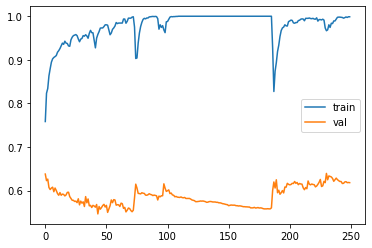

Epoch 1/250
77/80 [===========================>..] - ETA: 0s - loss: 1.0288 - acc: 0.8019
Epoch 00001: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 1.0226 - acc: 0.8009 - val_loss: 1.5827 - val_acc: 0.6577
Epoch 2/250
77/80 [===========================>..] - ETA: 0s - loss: 0.6783 - acc: 0.8336
Epoch 00002: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.6725 - acc: 0.8354 - val_loss: 1.3088 - val_acc: 0.6588
Epoch 3/250
79/80 [============================>.] - ETA: 0s - loss: 0.5377 - acc: 0.8414
Epoch 00003: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.5423 - acc: 0.8405 - val_loss: 1.1929 - val_acc: 0.6565
Epoch 4/250
79/80 [============================>.] - ETA: 0s - loss: 0.4509 - acc: 0.8643
Epoch 00004: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 0.4552 - acc: 0.86

78/80 [============================>.] - ETA: 0s - loss: 0.1077 - acc: 0.9688
Epoch 00032: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 19ms/step - loss: 0.1061 - acc: 0.9690 - val_loss: 1.6959 - val_acc: 0.6261
Epoch 33/250
77/80 [===========================>..] - ETA: 0s - loss: 0.1197 - acc: 0.9623
Epoch 00033: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.1182 - acc: 0.9632 - val_loss: 1.7137 - val_acc: 0.6315
Epoch 34/250
80/80 [==============================] - ETA: 0s - loss: 0.1053 - acc: 0.9714
Epoch 00034: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.1053 - acc: 0.9714 - val_loss: 1.7681 - val_acc: 0.6288
Epoch 35/250
78/80 [============================>.] - ETA: 0s - loss: 0.0869 - acc: 0.9780
Epoch 00035: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 0.0859 - acc: 0.9780 - val_

80/80 [==============================] - ETA: 0s - loss: 0.0157 - acc: 0.9969
Epoch 00063: saving model to Model\lstm_model5.h5
80/80 [==============================] - 2s 19ms/step - loss: 0.0157 - acc: 0.9969 - val_loss: 2.1785 - val_acc: 0.6295
Epoch 64/250
80/80 [==============================] - ETA: 0s - loss: 0.0147 - acc: 0.9976
Epoch 00064: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 0.0147 - acc: 0.9976 - val_loss: 2.2120 - val_acc: 0.6295
Epoch 65/250
77/80 [===========================>..] - ETA: 0s - loss: 0.0138 - acc: 0.9972
Epoch 00065: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0135 - acc: 0.9973 - val_loss: 2.2254 - val_acc: 0.6318
Epoch 66/250
78/80 [============================>.] - ETA: 0s - loss: 0.0726 - acc: 0.9796
Epoch 00066: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0713 - acc: 0.9800 - val_

76/80 [===========================>..] - ETA: 0s - loss: 0.0406 - acc: 0.9893
Epoch 00094: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 19ms/step - loss: 0.0390 - acc: 0.9898 - val_loss: 2.2830 - val_acc: 0.6315
Epoch 95/250
78/80 [============================>.] - ETA: 0s - loss: 0.0374 - acc: 0.9916
Epoch 00095: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0367 - acc: 0.9918 - val_loss: 2.2866 - val_acc: 0.6280
Epoch 96/250
78/80 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9948
Epoch 00096: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0172 - acc: 0.9949 - val_loss: 2.2905 - val_acc: 0.6315
Epoch 97/250
78/80 [============================>.] - ETA: 0s - loss: 0.0122 - acc: 0.9984
Epoch 00097: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0120 - acc: 0.9984 - val_

Epoch 125/250
76/80 [===========================>..] - ETA: 0s - loss: 8.3360e-04 - acc: 1.0000
Epoch 00125: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 8.1646e-04 - acc: 1.0000 - val_loss: 2.7744 - val_acc: 0.6184
Epoch 126/250
78/80 [============================>.] - ETA: 0s - loss: 7.8670e-04 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 7.8019e-04 - acc: 1.0000 - val_loss: 2.7896 - val_acc: 0.6180
Epoch 127/250
76/80 [===========================>..] - ETA: 0s - loss: 7.6111e-04 - acc: 1.0000
Epoch 00127: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 7.4570e-04 - acc: 1.0000 - val_loss: 2.8046 - val_acc: 0.6180
Epoch 128/250
80/80 [==============================] - ETA: 0s - loss: 7.1289e-04 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 

79/80 [============================>.] - ETA: 0s - loss: 2.2463e-04 - acc: 1.0000
Epoch 00155: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 2.2435e-04 - acc: 1.0000 - val_loss: 3.2171 - val_acc: 0.6195
Epoch 156/250
80/80 [==============================] - ETA: 0s - loss: 2.1536e-04 - acc: 1.0000
Epoch 00156: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 2.1536e-04 - acc: 1.0000 - val_loss: 3.2315 - val_acc: 0.6195
Epoch 157/250
79/80 [============================>.] - ETA: 0s - loss: 2.0698e-04 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 2.0675e-04 - acc: 1.0000 - val_loss: 3.2459 - val_acc: 0.6199
Epoch 158/250
78/80 [============================>.] - ETA: 0s - loss: 1.9900e-04 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - lo

78/80 [============================>.] - ETA: 0s - loss: 6.6238e-05 - acc: 1.0000
Epoch 00185: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 6.6485e-05 - acc: 1.0000 - val_loss: 3.6479 - val_acc: 0.6176
Epoch 186/250
80/80 [==============================] - ETA: 0s - loss: 6.3811e-05 - acc: 1.0000
Epoch 00186: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 6.3811e-05 - acc: 1.0000 - val_loss: 3.6623 - val_acc: 0.6180
Epoch 187/250
77/80 [===========================>..] - ETA: 0s - loss: 6.1357e-05 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 18ms/step - loss: 6.1247e-05 - acc: 1.0000 - val_loss: 3.6767 - val_acc: 0.6172
Epoch 188/250
78/80 [============================>.] - ETA: 0s - loss: 5.8533e-05 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - lo

Epoch 216/250
80/80 [==============================] - ETA: 0s - loss: 0.0749 - acc: 0.9788
Epoch 00216: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0749 - acc: 0.9788 - val_loss: 3.0302 - val_acc: 0.6361
Epoch 217/250
77/80 [===========================>..] - ETA: 0s - loss: 0.0469 - acc: 0.9894- ETA: 0s - loss: 0.0452 - acc: 0
Epoch 00217: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0501 - acc: 0.9886 - val_loss: 3.0106 - val_acc: 0.6380
Epoch 218/250
78/80 [============================>.] - ETA: 0s - loss: 0.0287 - acc: 0.9924
Epoch 00218: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0294 - acc: 0.9922 - val_loss: 3.0032 - val_acc: 0.6349
Epoch 219/250
77/80 [===========================>..] - ETA: 0s - loss: 0.0201 - acc: 0.9955
Epoch 00219: saving model to Model\lstm_model5.h5
80/80 [==============================] 

Epoch 247/250
78/80 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.9988
Epoch 00247: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0055 - acc: 0.9984 - val_loss: 3.0444 - val_acc: 0.6419
Epoch 248/250
76/80 [===========================>..] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 3.0383 - val_acc: 0.6353
Epoch 249/250
76/80 [===========================>..] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.0422 - val_acc: 0.6345
Epoch 250/250
80/80 [==============================] - ETA: 0s - loss: 0.0010 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
80/80 [==============================] - 1s 17ms/step - loss: 0.0010 - a

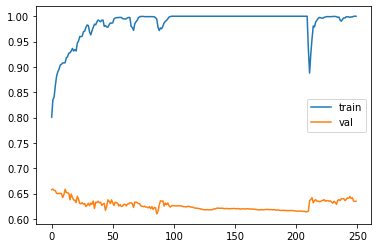

Epoch 1/250
83/87 [===========================>..] - ETA: 0s - loss: 1.7621 - acc: 0.6852
Epoch 00001: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 1.7104 - acc: 0.6867 - val_loss: 2.1608 - val_acc: 0.6523
Epoch 2/250
87/87 [==============================] - ETA: 0s - loss: 0.8964 - acc: 0.7637- ETA: 0s - loss: 1.0522 - acc: 0
Epoch 00002: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.8964 - acc: 0.7637 - val_loss: 1.8145 - val_acc: 0.6546
Epoch 3/250
87/87 [==============================] - ETA: 0s - loss: 0.7342 - acc: 0.7647
Epoch 00003: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.7342 - acc: 0.7647 - val_loss: 1.7381 - val_acc: 0.6534
Epoch 4/250
85/87 [============================>.] - ETA: 0s - loss: 0.6360 - acc: 0.7710
Epoch 00004: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17m

86/87 [============================>.] - ETA: 0s - loss: 0.1829 - acc: 0.9371
Epoch 00032: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.1912 - acc: 0.9335 - val_loss: 2.1238 - val_acc: 0.5039
Epoch 33/250
83/87 [===========================>..] - ETA: 0s - loss: 0.2129 - acc: 0.9232
Epoch 00033: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.2076 - acc: 0.9248 - val_loss: 2.1148 - val_acc: 0.5127
Epoch 34/250
85/87 [============================>.] - ETA: 0s - loss: 0.1586 - acc: 0.9482- ETA: 0s - loss: 0.1416 -
Epoch 00034: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.1585 - acc: 0.9482 - val_loss: 2.3216 - val_acc: 0.4900
Epoch 35/250
85/87 [============================>.] - ETA: 0s - loss: 0.1381 - acc: 0.9551
Epoch 00035: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0

84/87 [===========================>..] - ETA: 0s - loss: 0.0533 - acc: 0.9840
Epoch 00063: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0526 - acc: 0.9845 - val_loss: 2.7289 - val_acc: 0.5046
Epoch 64/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0678 - acc: 0.9814
Epoch 00064: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0691 - acc: 0.9809 - val_loss: 2.6689 - val_acc: 0.5150
Epoch 65/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0987 - acc: 0.9688- ETA: 0s - loss: 0.0783 
Epoch 00065: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0985 - acc: 0.9680 - val_loss: 2.4578 - val_acc: 0.5285
Epoch 66/250
85/87 [============================>.] - ETA: 0s - loss: 0.1139 - acc: 0.9603
Epoch 00066: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.

85/87 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9985
Epoch 00094: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0117 - acc: 0.9986 - val_loss: 2.8885 - val_acc: 0.5239
Epoch 95/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0115 - acc: 0.9985
Epoch 00095: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0112 - acc: 0.9986 - val_loss: 2.9138 - val_acc: 0.5220
Epoch 96/250
85/87 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9989
Epoch 00096: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0106 - acc: 0.9989 - val_loss: 2.9153 - val_acc: 0.5270
Epoch 97/250
87/87 [==============================] - ETA: 0s - loss: 0.0175 - acc: 0.9968
Epoch 00097: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0175 - acc: 0.9968 - val_

83/87 [===========================>..] - ETA: 0s - loss: 0.0472 - acc: 0.9887
Epoch 00125: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0464 - acc: 0.9885 - val_loss: 2.4877 - val_acc: 0.5617
Epoch 126/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0265 - acc: 0.9921
Epoch 00126: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0262 - acc: 0.9921 - val_loss: 2.4655 - val_acc: 0.5586
Epoch 127/250
86/87 [============================>.] - ETA: 0s - loss: 0.0196 - acc: 0.9967
Epoch 00127: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0195 - acc: 0.9968 - val_loss: 2.4821 - val_acc: 0.5621
Epoch 128/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0155 - acc: 0.9981- ETA: 0s - loss: 0.0079 - ac
Epoch 00128: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - l

Epoch 156/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0094 - acc: 0.9981- ETA: 0s - loss: 0.0074 -
Epoch 00156: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0093 - acc: 0.9982 - val_loss: 2.8473 - val_acc: 0.5428
Epoch 157/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.9985
Epoch 00157: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0080 - acc: 0.9986 - val_loss: 2.8386 - val_acc: 0.5443
Epoch 158/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0094 - acc: 0.9981
Epoch 00158: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0093 - acc: 0.9982 - val_loss: 2.9041 - val_acc: 0.5424
Epoch 159/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0097 - acc: 0.9978
Epoch 00159: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17

Epoch 187/250
85/87 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 0.9996
Epoch 00187: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 3.3197 - val_acc: 0.5328
Epoch 188/250
85/87 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9996
Epoch 00188: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0022 - acc: 0.9996 - val_loss: 3.3251 - val_acc: 0.5320
Epoch 189/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0022 - acc: 0.9996
Epoch 00189: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0022 - acc: 0.9996 - val_loss: 3.3436 - val_acc: 0.5324
Epoch 190/250
85/87 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 0.9996
Epoch 00190: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0021 - a

Epoch 218/250
85/87 [============================>.] - ETA: 0s - loss: 4.3568e-04 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 4.3640e-04 - acc: 1.0000 - val_loss: 3.7438 - val_acc: 0.5093
Epoch 219/250
85/87 [============================>.] - ETA: 0s - loss: 4.1152e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 4.1235e-04 - acc: 1.0000 - val_loss: 3.7582 - val_acc: 0.5081
Epoch 220/250
87/87 [==============================] - ETA: 0s - loss: 3.9146e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 3.9146e-04 - acc: 1.0000 - val_loss: 3.7717 - val_acc: 0.5073
Epoch 221/250
85/87 [============================>.] - ETA: 0s - loss: 3.7233e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 

Epoch 249/250
87/87 [==============================] - ETA: 0s - loss: 0.0197 - acc: 0.9971
Epoch 00249: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0197 - acc: 0.9971 - val_loss: 3.3164 - val_acc: 0.5054
Epoch 250/250
85/87 [============================>.] - ETA: 0s - loss: 0.0184 - acc: 0.9974
Epoch 00250: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0181 - acc: 0.9975 - val_loss: 3.3036 - val_acc: 0.5046


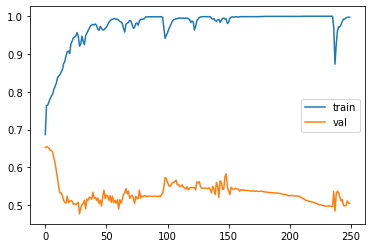

Epoch 1/250
86/87 [============================>.] - ETA: 0s - loss: 1.4140 - acc: 0.7765
Epoch 00001: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 1.4099 - acc: 0.7772 - val_loss: 2.3304 - val_acc: 0.6569
Epoch 2/250
86/87 [============================>.] - ETA: 0s - loss: 0.8356 - acc: 0.8234
Epoch 00002: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.8332 - acc: 0.8239 - val_loss: 1.9289 - val_acc: 0.6530
Epoch 3/250
83/87 [===========================>..] - ETA: 0s - loss: 0.5892 - acc: 0.8471
Epoch 00003: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.5782 - acc: 0.8496 - val_loss: 1.8012 - val_acc: 0.6496
Epoch 4/250
84/87 [===========================>..] - ETA: 0s - loss: 0.4611 - acc: 0.8568
Epoch 00004: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.4562 - acc: 0.85

84/87 [===========================>..] - ETA: 0s - loss: 0.0360 - acc: 0.9926
Epoch 00032: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0353 - acc: 0.9928 - val_loss: 2.0576 - val_acc: 0.6291
Epoch 33/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0521 - acc: 0.9888
Epoch 00033: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0509 - acc: 0.9891 - val_loss: 2.0003 - val_acc: 0.6268
Epoch 34/250
87/87 [==============================] - ETA: 0s - loss: 0.0645 - acc: 0.9855
Epoch 00034: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 20ms/step - loss: 0.0645 - acc: 0.9855 - val_loss: 2.0220 - val_acc: 0.6338
Epoch 35/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0429 - acc: 0.9888
Epoch 00035: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0419 - acc: 0.9891 - val_

84/87 [===========================>..] - ETA: 0s - loss: 0.0341 - acc: 0.9926
Epoch 00063: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0333 - acc: 0.9928 - val_loss: 2.0529 - val_acc: 0.6376
Epoch 64/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0283 - acc: 0.9933
Epoch 00064: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 17ms/step - loss: 0.0278 - acc: 0.9935 - val_loss: 2.0893 - val_acc: 0.6376
Epoch 65/250
85/87 [============================>.] - ETA: 0s - loss: 0.0205 - acc: 0.9956
Epoch 00065: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0203 - acc: 0.9957 - val_loss: 2.1023 - val_acc: 0.6380
Epoch 66/250
84/87 [===========================>..] - ETA: 0s - loss: 0.0234 - acc: 0.9952
Epoch 00066: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0229 - acc: 0.9953 - val_

85/87 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 1.0000
Epoch 00094: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.3897 - val_acc: 0.6438
Epoch 95/250
85/87 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00095: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.4107 - val_acc: 0.6415
Epoch 96/250
85/87 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00096: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.4201 - val_acc: 0.6430
Epoch 97/250
85/87 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 1.0000- ETA: 0s - loss: 0.0
Epoch 00097: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0021

84/87 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 1.0000
Epoch 00125: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.1585 - val_acc: 0.6453
Epoch 126/250
86/87 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 2.1902 - val_acc: 0.6442
Epoch 127/250
86/87 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.9996
Epoch 00127: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0064 - acc: 0.9996 - val_loss: 2.1832 - val_acc: 0.6480
Epoch 128/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0125 - acc: 0.9981
Epoch 00128: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 0.0123 - acc: 0.9982 - v

84/87 [===========================>..] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00156: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.6378 - val_acc: 0.6403
Epoch 157/250
83/87 [===========================>..] - ETA: 0s - loss: 0.0010 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.6517 - val_acc: 0.6407
Epoch 158/250
85/87 [============================>.] - ETA: 0s - loss: 0.0010 - acc: 1.0000 
Epoch 00158: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 9.9556e-04 - acc: 1.0000 - val_loss: 2.6656 - val_acc: 0.6407
Epoch 159/250
85/87 [============================>.] - ETA: 0s - loss: 9.5639e-04 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 9.4963e-04 - ac

85/87 [============================>.] - ETA: 0s - loss: 2.9246e-04 - acc: 1.0000
Epoch 00186: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 2.9058e-04 - acc: 1.0000 - val_loss: 3.0124 - val_acc: 0.6438
Epoch 187/250
85/87 [============================>.] - ETA: 0s - loss: 2.8063e-04 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 2.7883e-04 - acc: 1.0000 - val_loss: 3.0240 - val_acc: 0.6438
Epoch 188/250
85/87 [============================>.] - ETA: 0s - loss: 2.6930e-04 - acc: 1.0000
Epoch 00188: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - loss: 2.6758e-04 - acc: 1.0000 - val_loss: 3.0357 - val_acc: 0.6438
Epoch 189/250
86/87 [============================>.] - ETA: 0s - loss: 2.5717e-04 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - lo

Epoch 217/250
84/87 [===========================>..] - ETA: 0s - loss: 8.1444e-05 - acc: 1.0000
Epoch 00217: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 8.1814e-05 - acc: 1.0000 - val_loss: 3.3767 - val_acc: 0.6473
Epoch 218/250
83/87 [===========================>..] - ETA: 0s - loss: 7.8471e-05 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 17ms/step - loss: 7.8737e-05 - acc: 1.0000 - val_loss: 3.3888 - val_acc: 0.6473
Epoch 219/250
84/87 [===========================>..] - ETA: 0s - loss: 7.5455e-05 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 7.5786e-05 - acc: 1.0000 - val_loss: 3.4008 - val_acc: 0.6469
Epoch 220/250
84/87 [===========================>..] - ETA: 0s - loss: 7.2646e-05 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
87/87 [==============================] - 1s 

83/87 [===========================>..] - ETA: 0s - loss: 2.7775e-05 - acc: 1.0000
Epoch 00247: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 2.7755e-05 - acc: 1.0000 - val_loss: 3.7346 - val_acc: 0.6446
Epoch 248/250
84/87 [===========================>..] - ETA: 0s - loss: 2.6772e-05 - acc: 1.0000
Epoch 00248: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 2.6840e-05 - acc: 1.0000 - val_loss: 3.7494 - val_acc: 0.6442
Epoch 249/250
85/87 [============================>.] - ETA: 0s - loss: 2.6136e-05 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 18ms/step - loss: 2.5955e-05 - acc: 1.0000 - val_loss: 3.7613 - val_acc: 0.6442
Epoch 250/250
86/87 [============================>.] - ETA: 0s - loss: 2.5137e-05 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
87/87 [==============================] - 2s 19ms/step - lo

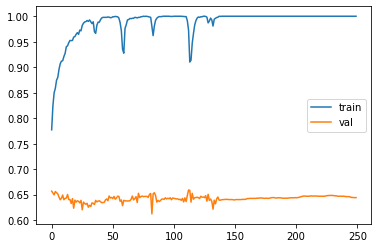

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 1.4881 - acc: 0.8210- ETA: 0s - loss: 1.8190 - acc: 
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 1.4738 - acc: 0.8224 - val_loss: 3.0652 - val_acc: 0.6685
Epoch 2/250
77/78 [============================>.] - ETA: 0s - loss: 0.9359 - acc: 0.8636
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.9265 - acc: 0.8650 - val_loss: 2.7218 - val_acc: 0.6611
Epoch 3/250
75/78 [===========================>..] - ETA: 0s - loss: 0.6603 - acc: 0.8658
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.6870 - acc: 0.8590 - val_loss: 2.3796 - val_acc: 0.6604
Epoch 4/250
76/78 [============================>.] - ETA: 0s - loss: 0.5182 - acc: 0.8746
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms

77/78 [============================>.] - ETA: 0s - loss: 0.0972 - acc: 0.9752
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0963 - acc: 0.9755 - val_loss: 1.7784 - val_acc: 0.6149
Epoch 33/250
78/78 [==============================] - ETA: 0s - loss: 0.0716 - acc: 0.9811
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0716 - acc: 0.9811 - val_loss: 1.8190 - val_acc: 0.6184
Epoch 34/250
78/78 [==============================] - ETA: 0s - loss: 0.0569 - acc: 0.9871- ETA: 0s - loss: 0.0504 - acc: 0
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0569 - acc: 0.9871 - val_loss: 1.8870 - val_acc: 0.6133
Epoch 35/250
77/78 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9903
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - 

75/78 [===========================>..] - ETA: 0s - loss: 0.0252 - acc: 0.9950
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0246 - acc: 0.9952 - val_loss: 2.3459 - val_acc: 0.5933
Epoch 64/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0222 - acc: 0.9958
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0218 - acc: 0.9960 - val_loss: 2.3877 - val_acc: 0.5898
Epoch 65/250
77/78 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9963
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0200 - acc: 0.9964 - val_loss: 2.3838 - val_acc: 0.5933
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.0194 - acc: 0.9963
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0192 - acc: 0.9964 - val_

Epoch 95/250
76/78 [============================>.] - ETA: 0s - loss: 0.0188 - acc: 0.9955
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0185 - acc: 0.9956 - val_loss: 2.3094 - val_acc: 0.6149
Epoch 96/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0133 - acc: 0.9962
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0145 - acc: 0.9956 - val_loss: 2.3415 - val_acc: 0.6103
Epoch 97/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0126 - acc: 0.9962
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0138 - acc: 0.9956 - val_loss: 2.4031 - val_acc: 0.6045
Epoch 98/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0125 - acc: 0.9962
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0150 - acc: 

74/78 [===========================>..] - ETA: 0s - loss: 0.0123 - acc: 0.9958
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0118 - acc: 0.9960 - val_loss: 2.4083 - val_acc: 0.6018
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9967
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0107 - acc: 0.9968 - val_loss: 2.4242 - val_acc: 0.6010
Epoch 128/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0101 - acc: 0.9967
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0099 - acc: 0.9968 - val_loss: 2.4418 - val_acc: 0.6010
Epoch 129/250
76/78 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9988
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.0092 - acc: 0.9988 - v

74/78 [===========================>..] - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.8602 - val_acc: 0.5891
Epoch 158/250
77/78 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.8745 - val_acc: 0.5891
Epoch 159/250
78/78 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.8901 - val_acc: 0.5887
Epoch 160/250
77/78 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0012 - acc: 1.0000 - v

Epoch 188/250
76/78 [============================>.] - ETA: 0s - loss: 0.0513 - acc: 0.9889
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.0514 - acc: 0.9888 - val_loss: 2.8671 - val_acc: 0.6234
Epoch 189/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2694 - acc: 0.9455
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2964 - acc: 0.9405 - val_loss: 2.5415 - val_acc: 0.6353
Epoch 190/250
76/78 [============================>.] - ETA: 0s - loss: 0.2573 - acc: 0.9297
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.2536 - acc: 0.9309 - val_loss: 2.4652 - val_acc: 0.6195
Epoch 191/250
76/78 [============================>.] - ETA: 0s - loss: 0.1349 - acc: 0.9659
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 0.1358 - a

77/78 [============================>.] - ETA: 0s - loss: 9.8980e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 9.8466e-04 - acc: 1.0000 - val_loss: 2.7888 - val_acc: 0.6052
Epoch 220/250
75/78 [===========================>..] - ETA: 0s - loss: 9.4568e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 9.3136e-04 - acc: 1.0000 - val_loss: 2.7991 - val_acc: 0.6056
Epoch 221/250
78/78 [==============================] - ETA: 0s - loss: 8.8230e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 8.8230e-04 - acc: 1.0000 - val_loss: 2.8094 - val_acc: 0.6056
Epoch 222/250
75/78 [===========================>..] - ETA: 0s - loss: 8.4927e-04 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - lo

78/78 [==============================] - ETA: 0s - loss: 2.4753e-04 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 2.4753e-04 - acc: 1.0000 - val_loss: 3.1169 - val_acc: 0.6068
Epoch 250/250
78/78 [==============================] - ETA: 0s - loss: 2.3855e-04 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 2.3855e-04 - acc: 1.0000 - val_loss: 3.1277 - val_acc: 0.6064


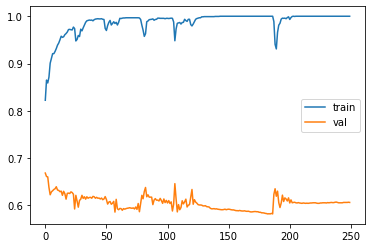

Epoch 1/250
 97/100 [============================>.] - ETA: 0s - loss: 1.2421 - acc: 0.7677
Epoch 00001: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 17ms/step - loss: 1.2549 - acc: 0.7604 - val_loss: 1.8824 - val_acc: 0.6696
Epoch 2/250
 97/100 [============================>.] - ETA: 0s - loss: 0.7646 - acc: 0.8254
Epoch 00002: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.7693 - acc: 0.8204 - val_loss: 1.5323 - val_acc: 0.6584
Epoch 3/250
 97/100 [============================>.] - ETA: 0s - loss: 0.6370 - acc: 0.8286
Epoch 00003: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.6423 - acc: 0.8239 - val_loss: 1.4097 - val_acc: 0.6550
Epoch 4/250
 97/100 [============================>.] - ETA: 0s - loss: 0.5372 - acc: 0.8463
Epoch 00004: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.

Epoch 32/250
 97/100 [============================>.] - ETA: 0s - loss: 0.1050 - acc: 0.9729
Epoch 00032: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 0.1061 - acc: 0.9723 - val_loss: 1.9398 - val_acc: 0.6091
Epoch 33/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0927 - acc: 0.9771
Epoch 00033: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0934 - acc: 0.9770 - val_loss: 1.9801 - val_acc: 0.6133
Epoch 34/250
 99/100 [============================>.] - ETA: 0s - loss: 0.0913 - acc: 0.9766
Epoch 00034: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0910 - acc: 0.9767 - val_loss: 1.9639 - val_acc: 0.6118
Epoch 35/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0978 - acc: 0.9762
Epoch 00035: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss

Epoch 63/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0376 - acc: 0.9916
Epoch 00063: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0397 - acc: 0.9912 - val_loss: 2.2942 - val_acc: 0.6060
Epoch 64/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0437 - acc: 0.9878
Epoch 00064: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 0.0473 - acc: 0.9874 - val_loss: 2.2060 - val_acc: 0.6195
Epoch 65/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0965 - acc: 0.9707
Epoch 00065: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 0.0972 - acc: 0.9708 - val_loss: 2.3267 - val_acc: 0.5998
Epoch 66/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0614 - acc: 0.9797
Epoch 00066: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss

Epoch 94/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0146 - acc: 0.9968
Epoch 00094: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0156 - acc: 0.9965 - val_loss: 2.3907 - val_acc: 0.6361
Epoch 95/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0174 - acc: 0.9961
Epoch 00095: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0181 - acc: 0.9959 - val_loss: 2.4318 - val_acc: 0.6369
Epoch 96/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0139 - acc: 0.9977
Epoch 00096: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0145 - acc: 0.9978 - val_loss: 2.4519 - val_acc: 0.6345
Epoch 97/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.9984
Epoch 00097: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss

 99/100 [============================>.] - ETA: 0s - loss: 8.5692e-04 - acc: 1.0000
Epoch 00124: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 8.5540e-04 - acc: 1.0000 - val_loss: 2.8097 - val_acc: 0.6357
Epoch 125/250
 97/100 [============================>.] - ETA: 0s - loss: 7.9395e-04 - acc: 1.0000- ETA: 0s - loss: 6.9031e-04 - acc: 1.
Epoch 00125: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 8.0626e-04 - acc: 1.0000 - val_loss: 2.8241 - val_acc: 0.6349
Epoch 126/250
 97/100 [============================>.] - ETA: 0s - loss: 7.4935e-04 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 7.6067e-04 - acc: 1.0000 - val_loss: 2.8382 - val_acc: 0.6349
Epoch 127/250
 99/100 [============================>.] - ETA: 0s - loss: 7.1952e-04 - acc: 1.0000
Epoch 00127: saving model to Model\lstm_model5.h5
100/10

Epoch 154/250
 97/100 [============================>.] - ETA: 0s - loss: 1.7888e-04 - acc: 1.0000
Epoch 00154: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 17ms/step - loss: 1.8125e-04 - acc: 1.0000 - val_loss: 3.1986 - val_acc: 0.6357
Epoch 155/250
 97/100 [============================>.] - ETA: 0s - loss: 1.7059e-04 - acc: 1.0000
Epoch 00155: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 1.7285e-04 - acc: 1.0000 - val_loss: 3.2110 - val_acc: 0.6353
Epoch 156/250
 97/100 [============================>.] - ETA: 0s - loss: 1.6270e-04 - acc: 1.0000- ETA: 1s - loss: 1.6538e
Epoch 00156: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 1.6486e-04 - acc: 1.0000 - val_loss: 3.2235 - val_acc: 0.6353
Epoch 157/250
 98/100 [============================>.] - ETA: 0s - loss: 1.5686e-04 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
100/1

Epoch 184/250
 97/100 [============================>.] - ETA: 0s - loss: 4.4839e-05 - acc: 1.0000
Epoch 00184: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 17ms/step - loss: 4.5455e-05 - acc: 1.0000 - val_loss: 3.5749 - val_acc: 0.6322
Epoch 185/250
 97/100 [============================>.] - ETA: 0s - loss: 4.2841e-05 - acc: 1.0000
Epoch 00185: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 4.3429e-05 - acc: 1.0000 - val_loss: 3.5875 - val_acc: 0.6326
Epoch 186/250
 99/100 [============================>.] - ETA: 0s - loss: 4.1551e-05 - acc: 1.0000
Epoch 00186: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 4.1494e-05 - acc: 1.0000 - val_loss: 3.6002 - val_acc: 0.6326
Epoch 187/250
 97/100 [============================>.] - ETA: 0s - loss: 3.9106e-05 - acc: 1.0000
Epoch 00187: saving model to Model\lstm_model5.h5
100/100 [=====================

Epoch 214/250
 97/100 [============================>.] - ETA: 0s - loss: 1.1141e-05 - acc: 1.0000
Epoch 00214: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 1.1291e-05 - acc: 1.0000 - val_loss: 3.9715 - val_acc: 0.6268
Epoch 215/250
 97/100 [============================>.] - ETA: 0s - loss: 1.0628e-05 - acc: 1.0000
Epoch 00215: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 1.0772e-05 - acc: 1.0000 - val_loss: 3.9852 - val_acc: 0.6268
Epoch 216/250
100/100 [==============================] - ETA: 0s - loss: 1.0276e-05 - acc: 1.0000
Epoch 00216: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 20ms/step - loss: 1.0276e-05 - acc: 1.0000 - val_loss: 3.9989 - val_acc: 0.6264
Epoch 217/250
 97/100 [============================>.] - ETA: 0s - loss: 9.6732e-06 - acc: 1.0000- ETA: 0s - loss: 9.1010e-06 - acc: 
Epoch 00217: saving model to Model\lstm_mode

Epoch 244/250
 97/100 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.9984
Epoch 00244: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 0.0081 - acc: 0.9984 - val_loss: 3.2785 - val_acc: 0.6503
Epoch 245/250
 99/100 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9978
Epoch 00245: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 19ms/step - loss: 0.0095 - acc: 0.9978 - val_loss: 3.2819 - val_acc: 0.6492
Epoch 246/250
 99/100 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 0.9987
Epoch 00246: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - loss: 0.0046 - acc: 0.9987 - val_loss: 3.2858 - val_acc: 0.6500
Epoch 247/250
 99/100 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.9987
Epoch 00247: saving model to Model\lstm_model5.h5
100/100 [==============================] - 2s 18ms/step - 

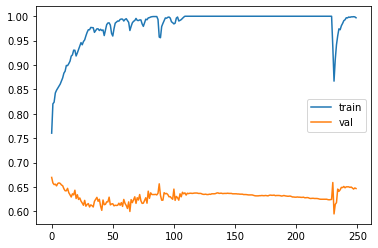

Epoch 1/250
89/92 [============================>.] - ETA: 0s - loss: 1.4606 - acc: 0.8076
Epoch 00001: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 20ms/step - loss: 1.5674 - acc: 0.7996 - val_loss: 3.1799 - val_acc: 0.6565
Epoch 2/250
89/92 [============================>.] - ETA: 0s - loss: 0.9466 - acc: 0.8532
Epoch 00002: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 19ms/step - loss: 1.0469 - acc: 0.8447 - val_loss: 2.9396 - val_acc: 0.6569
Epoch 3/250
89/92 [============================>.] - ETA: 0s - loss: 0.8158 - acc: 0.8641
Epoch 00003: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 19ms/step - loss: 0.9012 - acc: 0.8556 - val_loss: 2.5265 - val_acc: 0.6557
Epoch 4/250
88/92 [===========================>..] - ETA: 0s - loss: 0.7030 - acc: 0.8562
Epoch 00004: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.7727 - acc: 0.84

Epoch 33/250
92/92 [==============================] - ETA: 0s - loss: 0.1680 - acc: 0.9426
Epoch 00033: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 19ms/step - loss: 0.1680 - acc: 0.9426 - val_loss: 1.8896 - val_acc: 0.6442
Epoch 34/250
89/92 [============================>.] - ETA: 0s - loss: 0.2222 - acc: 0.9245
Epoch 00034: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.2208 - acc: 0.9256 - val_loss: 1.8308 - val_acc: 0.6480
Epoch 35/250
89/92 [============================>.] - ETA: 0s - loss: 0.2322 - acc: 0.9143
Epoch 00035: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.2325 - acc: 0.9150 - val_loss: 1.8274 - val_acc: 0.6488
Epoch 36/250
89/92 [============================>.] - ETA: 0s - loss: 0.1937 - acc: 0.9329
Epoch 00036: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.1915 - acc: 

Epoch 65/250
91/92 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9897
Epoch 00065: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0445 - acc: 0.9894 - val_loss: 2.2524 - val_acc: 0.6396
Epoch 66/250
89/92 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9902
Epoch 00066: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0444 - acc: 0.9901 - val_loss: 2.2595 - val_acc: 0.6469
Epoch 67/250
89/92 [============================>.] - ETA: 0s - loss: 0.0363 - acc: 0.9919
Epoch 00067: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 17ms/step - loss: 0.0357 - acc: 0.9921 - val_loss: 2.2733 - val_acc: 0.6388
Epoch 68/250
89/92 [============================>.] - ETA: 0s - loss: 0.0331 - acc: 0.9919
Epoch 00068: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 17ms/step - loss: 0.0325 - acc: 

Epoch 97/250
89/92 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9940
Epoch 00097: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0267 - acc: 0.9942 - val_loss: 2.4313 - val_acc: 0.6399
Epoch 98/250
91/92 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9928
Epoch 00098: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0274 - acc: 0.9928 - val_loss: 2.4355 - val_acc: 0.6384
Epoch 99/250
89/92 [============================>.] - ETA: 0s - loss: 0.0599 - acc: 0.9828
Epoch 00099: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0585 - acc: 0.9833 - val_loss: 2.4337 - val_acc: 0.6411
Epoch 100/250
89/92 [============================>.] - ETA: 0s - loss: 0.0562 - acc: 0.9824
Epoch 00100: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0549 - acc:

90/92 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9990
Epoch 00128: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0061 - acc: 0.9990 - val_loss: 2.4857 - val_acc: 0.6542
Epoch 129/250
91/92 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.9990
Epoch 00129: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0056 - acc: 0.9990 - val_loss: 2.5002 - val_acc: 0.6546
Epoch 130/250
90/92 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.9993
Epoch 00130: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0052 - acc: 0.9993 - val_loss: 2.5130 - val_acc: 0.6550
Epoch 131/250
90/92 [============================>.] - ETA: 0s - loss: 0.0049 - acc: 0.9993
Epoch 00131: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0048 - acc: 0.9993 - v

92/92 [==============================] - ETA: 0s - loss: 0.0099 - acc: 0.9980
Epoch 00159: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0099 - acc: 0.9980 - val_loss: 2.2957 - val_acc: 0.6665
Epoch 160/250
88/92 [===========================>..] - ETA: 0s - loss: 0.0275 - acc: 0.9929
Epoch 00160: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0305 - acc: 0.9921 - val_loss: 2.3495 - val_acc: 0.6658
Epoch 161/250
89/92 [============================>.] - ETA: 0s - loss: 0.0357 - acc: 0.9888
Epoch 00161: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0372 - acc: 0.9887 - val_loss: 2.3586 - val_acc: 0.6696
Epoch 162/250
91/92 [============================>.] - ETA: 0s - loss: 0.0144 - acc: 0.9966
Epoch 00162: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0158 - acc: 0.9962 - v

89/92 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9993
Epoch 00190: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 2.6353 - val_acc: 0.6681
Epoch 191/250
89/92 [============================>.] - ETA: 0s - loss: 0.0021 - acc: 0.9993
Epoch 00191: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 20ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 2.6428 - val_acc: 0.6669
Epoch 192/250
92/92 [==============================] - ETA: 0s - loss: 0.0020 - acc: 0.9997
Epoch 00192: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 21ms/step - loss: 0.0020 - acc: 0.9997 - val_loss: 2.6459 - val_acc: 0.6677
Epoch 193/250
92/92 [==============================] - ETA: 0s - loss: 0.0021 - acc: 0.9997
Epoch 00193: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 20ms/step - loss: 0.0021 - acc: 0.9997 - v

91/92 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 0.9997- ETA: 0s - loss: 0.0035 
Epoch 00221: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 19ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 2.5294 - val_acc: 0.6692
Epoch 222/250
92/92 [==============================] - ETA: 0s - loss: 0.0018 - acc: 0.9997
Epoch 00222: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 20ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 2.5380 - val_acc: 0.6685
Epoch 223/250
89/92 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9996
Epoch 00223: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 19ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 2.5465 - val_acc: 0.6692
Epoch 224/250
89/92 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9996
Epoch 00224: saving model to Model\lstm_model5.h5
92/92 [==============================] - 2s 18ms/step - loss:

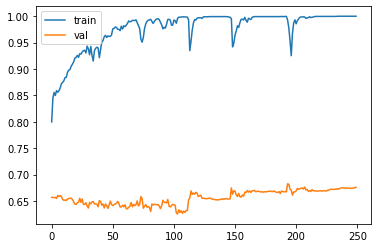

Epoch 1/250
104/106 [============================>.] - ETA: 0s - loss: 2.0376 - acc: 0.6241
Epoch 00001: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 19ms/step - loss: 2.0389 - acc: 0.6199 - val_loss: 1.6563 - val_acc: 0.6488
Epoch 2/250
105/106 [============================>.] - ETA: 0s - loss: 0.9033 - acc: 0.6961
Epoch 00002: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.9008 - acc: 0.6961 - val_loss: 1.3297 - val_acc: 0.5971
Epoch 3/250
104/106 [============================>.] - ETA: 0s - loss: 0.7821 - acc: 0.7209
Epoch 00003: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.7864 - acc: 0.7180 - val_loss: 1.3640 - val_acc: 0.5702
Epoch 4/250
104/106 [============================>.] - ETA: 0s - loss: 0.7060 - acc: 0.7434
Epoch 00004: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 19ms/step - loss: 0.

Epoch 32/250
104/106 [============================>.] - ETA: 0s - loss: 0.2219 - acc: 0.9312
Epoch 00032: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - loss: 0.2229 - acc: 0.9312 - val_loss: 2.5999 - val_acc: 0.5501
Epoch 33/250
104/106 [============================>.] - ETA: 0s - loss: 0.2450 - acc: 0.9156
Epoch 00033: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 20ms/step - loss: 0.2459 - acc: 0.9158 - val_loss: 2.6486 - val_acc: 0.5420
Epoch 34/250
104/106 [============================>.] - ETA: 0s - loss: 0.2504 - acc: 0.9186
Epoch 00034: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 20ms/step - loss: 0.2531 - acc: 0.9176 - val_loss: 2.6334 - val_acc: 0.5439
Epoch 35/250
106/106 [==============================] - ETA: 0s - loss: 0.2634 - acc: 0.9185
Epoch 00035: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss

Epoch 63/250
106/106 [==============================] - ETA: 0s - loss: 0.0757 - acc: 0.9817
Epoch 00063: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - loss: 0.0757 - acc: 0.9817 - val_loss: 3.9027 - val_acc: 0.5066
Epoch 64/250
106/106 [==============================] - ETA: 0s - loss: 0.0726 - acc: 0.9829
Epoch 00064: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - loss: 0.0726 - acc: 0.9829 - val_loss: 3.8327 - val_acc: 0.5116
Epoch 65/250
105/106 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9851
Epoch 00065: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0670 - acc: 0.9852 - val_loss: 3.9042 - val_acc: 0.5096
Epoch 66/250
105/106 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9848
Epoch 00066: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss

Epoch 94/250
105/106 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9905
Epoch 00094: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 19ms/step - loss: 0.0426 - acc: 0.9905 - val_loss: 4.1417 - val_acc: 0.5227
Epoch 95/250
104/106 [============================>.] - ETA: 0s - loss: 0.0808 - acc: 0.9778
Epoch 00095: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 20ms/step - loss: 0.0801 - acc: 0.9778 - val_loss: 3.8868 - val_acc: 0.5382
Epoch 96/250
106/106 [==============================] - ETA: 0s - loss: 0.1001 - acc: 0.9728
Epoch 00096: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - loss: 0.1001 - acc: 0.9728 - val_loss: 4.2483 - val_acc: 0.5120
Epoch 97/250
103/106 [============================>.] - ETA: 0s - loss: 0.1165 - acc: 0.9672
Epoch 00097: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - loss

Epoch 125/250
105/106 [============================>.] - ETA: 0s - loss: 0.0401 - acc: 0.9929
Epoch 00125: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 19ms/step - loss: 0.0399 - acc: 0.9929 - val_loss: 3.7016 - val_acc: 0.5355
Epoch 126/250
105/106 [============================>.] - ETA: 0s - loss: 0.0313 - acc: 0.9943
Epoch 00126: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0311 - acc: 0.9944 - val_loss: 3.7189 - val_acc: 0.5389
Epoch 127/250
105/106 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9958
Epoch 00127: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0274 - acc: 0.9959 - val_loss: 3.7935 - val_acc: 0.5347
Epoch 128/250
103/106 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9954
Epoch 00128: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 21ms/step - 

Epoch 156/250
105/106 [============================>.] - ETA: 0s - loss: 0.0240 - acc: 0.9946
Epoch 00156: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0239 - acc: 0.9947 - val_loss: 3.6435 - val_acc: 0.5613
Epoch 157/250
106/106 [==============================] - ETA: 0s - loss: 0.0198 - acc: 0.9956
Epoch 00157: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0198 - acc: 0.9956 - val_loss: 3.7651 - val_acc: 0.5613
Epoch 158/250
104/106 [============================>.] - ETA: 0s - loss: 0.0156 - acc: 0.9976
Epoch 00158: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0154 - acc: 0.9976 - val_loss: 3.9086 - val_acc: 0.5540
Epoch 159/250
105/106 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9982
Epoch 00159: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - 

Epoch 187/250
103/106 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 0.9997
Epoch 00187: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0036 - acc: 0.9997 - val_loss: 4.0428 - val_acc: 0.5493
Epoch 188/250
105/106 [============================>.] - ETA: 0s - loss: 0.0037 - acc: 0.9997- ETA: 0s - loss: 0.0044 - acc
Epoch 00188: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0037 - acc: 0.9997 - val_loss: 4.0482 - val_acc: 0.5490
Epoch 189/250
105/106 [============================>.] - ETA: 0s - loss: 0.0034 - acc: 0.9997
Epoch 00189: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0034 - acc: 0.9997 - val_loss: 4.0863 - val_acc: 0.5482
Epoch 190/250
105/106 [============================>.] - ETA: 0s - loss: 0.0036 - acc: 0.9997
Epoch 00190: saving model to Model\lstm_model5.h5
106/106 [===================

Epoch 218/250
103/106 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9994
Epoch 00218: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0042 - acc: 0.9994 - val_loss: 4.5067 - val_acc: 0.5054
Epoch 219/250
106/106 [==============================] - ETA: 0s - loss: 0.0054 - acc: 0.9991
Epoch 00219: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0054 - acc: 0.9991 - val_loss: 4.5432 - val_acc: 0.5077
Epoch 220/250
102/106 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.9994
Epoch 00220: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - loss: 0.0055 - acc: 0.9994 - val_loss: 4.5475 - val_acc: 0.5054
Epoch 221/250
105/106 [============================>.] - ETA: 0s - loss: 0.0484 - acc: 0.9857
Epoch 00221: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 17ms/step - 

Epoch 249/250
105/106 [============================>.] - ETA: 0s - loss: 0.0431 - acc: 0.9875
Epoch 00249: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0427 - acc: 0.9876 - val_loss: 4.0465 - val_acc: 0.5243
Epoch 250/250
105/106 [============================>.] - ETA: 0s - loss: 0.0346 - acc: 0.9923
Epoch 00250: saving model to Model\lstm_model5.h5
106/106 [==============================] - 2s 18ms/step - loss: 0.0344 - acc: 0.9923 - val_loss: 4.2437 - val_acc: 0.5085


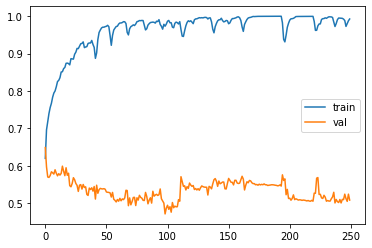

Epoch 1/250
81/84 [===========================>..] - ETA: 0s - loss: 1.4737 - acc: 0.7612
Epoch 00001: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 1.5140 - acc: 0.7519 - val_loss: 2.2858 - val_acc: 0.6503
Epoch 2/250
84/84 [==============================] - ETA: 0s - loss: 0.9295 - acc: 0.8295
Epoch 00002: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.9295 - acc: 0.8295 - val_loss: 1.6745 - val_acc: 0.6519
Epoch 3/250
81/84 [===========================>..] - ETA: 0s - loss: 0.6327 - acc: 0.8526
Epoch 00003: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.6571 - acc: 0.8463 - val_loss: 1.5255 - val_acc: 0.6399
Epoch 4/250
84/84 [==============================] - ETA: 0s - loss: 0.5106 - acc: 0.8647
Epoch 00004: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.5106 - acc: 0.86

Epoch 33/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1316 - acc: 0.9599
Epoch 00033: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.1331 - acc: 0.9599 - val_loss: 1.7000 - val_acc: 0.5794
Epoch 34/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1446 - acc: 0.9545
Epoch 00034: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.1449 - acc: 0.9539 - val_loss: 1.7118 - val_acc: 0.5771
Epoch 35/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1235 - acc: 0.9653- ETA: 0s - loss: 0.1313 - acc: 0.96
Epoch 00035: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.1246 - acc: 0.9651 - val_loss: 1.6887 - val_acc: 0.5856
Epoch 36/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1026 - acc: 0.9718
Epoch 00036: saving model to Model\lstm_model5.h5
84/84 [==============================] -

82/84 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9931
Epoch 00064: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 18ms/step - loss: 0.0371 - acc: 0.9929 - val_loss: 1.9185 - val_acc: 0.5971
Epoch 65/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0387 - acc: 0.9907
Epoch 00065: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 18ms/step - loss: 0.0388 - acc: 0.9906 - val_loss: 1.9090 - val_acc: 0.6006
Epoch 66/250
83/84 [============================>.] - ETA: 0s - loss: 0.0419 - acc: 0.9895- ETA: 0s - loss: 0.0673 - 
Epoch 00066: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.0417 - acc: 0.9895 - val_loss: 1.9657 - val_acc: 0.5964
Epoch 67/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0311 - acc: 0.9919
Epoch 00067: saving model to Model\lstm_model5.h5
84/84 [==============================] - 1s 18ms/step - loss: 

83/84 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.9989
Epoch 00095: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0071 - acc: 0.9989 - val_loss: 2.2499 - val_acc: 0.6052
Epoch 96/250
84/84 [==============================] - ETA: 0s - loss: 0.0075 - acc: 0.9985
Epoch 00096: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0075 - acc: 0.9985 - val_loss: 2.2855 - val_acc: 0.6025
Epoch 97/250
83/84 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9891
Epoch 00097: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0448 - acc: 0.9891 - val_loss: 2.2414 - val_acc: 0.6106
Epoch 98/250
84/84 [==============================] - ETA: 0s - loss: 0.0577 - acc: 0.9820
Epoch 00098: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0577 - acc: 0.9820 - val_

Epoch 126/250
84/84 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00126: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.5138 - val_acc: 0.6087
Epoch 127/250
83/84 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00127: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.5269 - val_acc: 0.6087
Epoch 128/250
82/84 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00128: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.5400 - val_acc: 0.6083
Epoch 129/250
82/84 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00129: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0012 - a

83/84 [============================>.] - ETA: 0s - loss: 0.0048 - acc: 1.0000
Epoch 00157: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 2.1531 - val_acc: 0.6396
Epoch 158/250
84/84 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.0000
Epoch 00158: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.1696 - val_acc: 0.6384
Epoch 159/250
82/84 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 1.0000- ETA: 1s - loss: 0.00
Epoch 00159: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.1855 - val_acc: 0.6392
Epoch 160/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00160: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.

Epoch 188/250
82/84 [============================>.] - ETA: 0s - loss: 0.0301 - acc: 0.9909
Epoch 00188: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0297 - acc: 0.9910 - val_loss: 2.3155 - val_acc: 0.6230
Epoch 189/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0162 - acc: 0.9958
Epoch 00189: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.0159 - acc: 0.9959 - val_loss: 2.3230 - val_acc: 0.6210
Epoch 190/250
83/84 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.9985
Epoch 00190: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.0112 - acc: 0.9985 - val_loss: 2.3041 - val_acc: 0.6261
Epoch 191/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0078 - acc: 0.9992- ETA: 0s - loss: 0.0086 - acc: 0.
Epoch 00191: saving model to Model\lstm_model5.h5
84/84 [==============================]

Epoch 219/250
84/84 [==============================] - ETA: 0s - loss: 8.9345e-04 - acc: 1.0000TA: 0s - loss: 0.0012 - acc: 1. - ETA: 0s - loss: 9.8380e-04 - acc
Epoch 00219: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 8.9345e-04 - acc: 1.0000 - val_loss: 2.7072 - val_acc: 0.6184
Epoch 220/250
83/84 [============================>.] - ETA: 0s - loss: 8.5770e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 8.5588e-04 - acc: 1.0000 - val_loss: 2.7198 - val_acc: 0.6180
Epoch 221/250
84/84 [==============================] - ETA: 0s - loss: 8.2025e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 8.2025e-04 - acc: 1.0000 - val_loss: 2.7320 - val_acc: 0.6176
Epoch 222/250
81/84 [===========================>..] - ETA: 0s - loss: 7.8345e-04 - acc: 1.0000
Epoch 00222: saving model to

Epoch 249/250
83/84 [============================>.] - ETA: 0s - loss: 2.7152e-04 - acc: 1.0000
Epoch 00249: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 2.7096e-04 - acc: 1.0000 - val_loss: 3.0736 - val_acc: 0.6160
Epoch 250/250
81/84 [===========================>..] - ETA: 0s - loss: 2.5814e-04 - acc: 1.0000
Epoch 00250: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 2.6057e-04 - acc: 1.0000 - val_loss: 3.0858 - val_acc: 0.6160


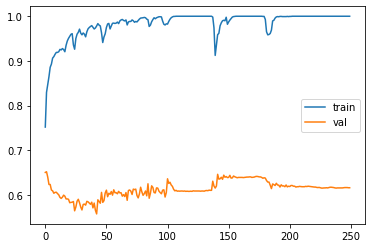

Epoch 1/250
82/84 [============================>.] - ETA: 0s - loss: 2.0223 - acc: 0.7188
Epoch 00001: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 25ms/step - loss: 1.9972 - acc: 0.7222 - val_loss: 2.3016 - val_acc: 0.6461
Epoch 2/250
83/84 [============================>.] - ETA: 0s - loss: 1.4005 - acc: 0.7210
Epoch 00002: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 1.4000 - acc: 0.7211 - val_loss: 1.7656 - val_acc: 0.6600
Epoch 3/250
83/84 [============================>.] - ETA: 0s - loss: 0.9773 - acc: 0.7545
Epoch 00003: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 25ms/step - loss: 0.9770 - acc: 0.7546 - val_loss: 1.4757 - val_acc: 0.6496
Epoch 4/250
82/84 [============================>.] - ETA: 0s - loss: 0.7529 - acc: 0.7748
Epoch 00004: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.7439 - acc: 0.77

81/84 [===========================>..] - ETA: 0s - loss: 0.1990 - acc: 0.9402
Epoch 00032: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.1949 - acc: 0.9417 - val_loss: 1.3547 - val_acc: 0.6253
Epoch 33/250
82/84 [============================>.] - ETA: 0s - loss: 0.2078 - acc: 0.9314
Epoch 00033: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.2057 - acc: 0.9323 - val_loss: 1.3796 - val_acc: 0.6234
Epoch 34/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1898 - acc: 0.9402
Epoch 00034: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.1859 - acc: 0.9417 - val_loss: 1.3458 - val_acc: 0.6245
Epoch 35/250
83/84 [============================>.] - ETA: 0s - loss: 0.1818 - acc: 0.9477
Epoch 00035: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.1817 - acc: 0.9477 - val_

Epoch 63/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0737 - acc: 0.9838
Epoch 00063: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0738 - acc: 0.9831 - val_loss: 1.6154 - val_acc: 0.6245
Epoch 64/250
81/84 [===========================>..] - ETA: 0s - loss: 0.1235 - acc: 0.9633
Epoch 00064: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.1236 - acc: 0.9635 - val_loss: 1.5431 - val_acc: 0.6365
Epoch 65/250
84/84 [==============================] - ETA: 0s - loss: 0.1002 - acc: 0.9718
Epoch 00065: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.1002 - acc: 0.9718 - val_loss: 1.5681 - val_acc: 0.6272
Epoch 66/250
82/84 [============================>.] - ETA: 0s - loss: 0.0867 - acc: 0.9752
Epoch 00066: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 25ms/step - loss: 0.0858 - acc: 

Epoch 94/250
84/84 [==============================] - ETA: 0s - loss: 0.0448 - acc: 0.9906
Epoch 00094: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0448 - acc: 0.9906 - val_loss: 1.8411 - val_acc: 0.6099
Epoch 95/250
83/84 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9729
Epoch 00095: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0897 - acc: 0.9729 - val_loss: 1.8023 - val_acc: 0.6079
Epoch 96/250
82/84 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9817
Epoch 00096: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0685 - acc: 0.9819 - val_loss: 1.7913 - val_acc: 0.6195
Epoch 97/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0582 - acc: 0.9857
Epoch 00097: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 25ms/step - loss: 0.0570 - acc: 

Epoch 125/250
83/84 [============================>.] - ETA: 0s - loss: 0.0532 - acc: 0.9872
Epoch 00125: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0531 - acc: 0.9872 - val_loss: 2.0001 - val_acc: 0.6126
Epoch 126/250
83/84 [============================>.] - ETA: 0s - loss: 0.0438 - acc: 0.9891
Epoch 00126: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0438 - acc: 0.9891 - val_loss: 2.1050 - val_acc: 0.6002
Epoch 127/250
83/84 [============================>.] - ETA: 0s - loss: 0.0558 - acc: 0.9849
Epoch 00127: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0558 - acc: 0.9849 - val_loss: 2.0126 - val_acc: 0.6045
Epoch 128/250
84/84 [==============================] - ETA: 0s - loss: 0.0468 - acc: 0.9876
Epoch 00128: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.0468 - a

Epoch 156/250
84/84 [==============================] - ETA: 0s - loss: 0.0300 - acc: 0.9928
Epoch 00156: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0300 - acc: 0.9928 - val_loss: 2.0907 - val_acc: 0.5952
Epoch 157/250
83/84 [============================>.] - ETA: 0s - loss: 0.0342 - acc: 0.9917
Epoch 00157: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0342 - acc: 0.9917 - val_loss: 2.1275 - val_acc: 0.5933
Epoch 158/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0690 - acc: 0.9803
Epoch 00158: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 23ms/step - loss: 0.0674 - acc: 0.9808 - val_loss: 1.9811 - val_acc: 0.6064
Epoch 159/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0314 - acc: 0.9927- ETA: 1s - loss: 0.
Epoch 00159: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/ste

83/84 [============================>.] - ETA: 0s - loss: 0.0223 - acc: 0.9955
Epoch 00187: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 24ms/step - loss: 0.0223 - acc: 0.9955 - val_loss: 2.2515 - val_acc: 0.5910
Epoch 188/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0160 - acc: 0.9969
Epoch 00188: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0157 - acc: 0.9970 - val_loss: 2.1978 - val_acc: 0.6006
Epoch 189/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0134 - acc: 0.9977
Epoch 00189: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0132 - acc: 0.9977 - val_loss: 2.2562 - val_acc: 0.5995
Epoch 190/250
83/84 [============================>.] - ETA: 0s - loss: 0.0160 - acc: 0.9966
Epoch 00190: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 22ms/step - loss: 0.0160 - acc: 0.9966 - v

83/84 [============================>.] - ETA: 0s - loss: 0.0853 - acc: 0.9763
Epoch 00218: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 21ms/step - loss: 0.0853 - acc: 0.9763 - val_loss: 1.9473 - val_acc: 0.6353
Epoch 219/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0647 - acc: 0.9830
Epoch 00219: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.0632 - acc: 0.9834 - val_loss: 2.0280 - val_acc: 0.6268
Epoch 220/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0318 - acc: 0.9904
Epoch 00220: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.0311 - acc: 0.9906 - val_loss: 2.0071 - val_acc: 0.6230
Epoch 221/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0140 - acc: 0.9973
Epoch 00221: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 20ms/step - loss: 0.0137 - acc: 0.9974 - v

Epoch 249/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0322 - acc: 0.9934
Epoch 00249: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.0314 - acc: 0.9936 - val_loss: 2.0439 - val_acc: 0.6384
Epoch 250/250
81/84 [===========================>..] - ETA: 0s - loss: 0.0953 - acc: 0.9753
Epoch 00250: saving model to Model\lstm_model5.h5
84/84 [==============================] - 2s 19ms/step - loss: 0.0930 - acc: 0.9759 - val_loss: 1.9864 - val_acc: 0.6503


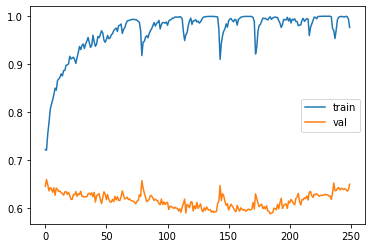

Epoch 1/250
88/89 [============================>.] - ETA: 0s - loss: 1.7927 - acc: 0.6257
Epoch 00001: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 21ms/step - loss: 1.7832 - acc: 0.6270 - val_loss: 1.2799 - val_acc: 0.6527
Epoch 2/250
89/89 [==============================] - ETA: 0s - loss: 1.0688 - acc: 0.6786
Epoch 00002: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 1.0688 - acc: 0.6786 - val_loss: 1.1108 - val_acc: 0.6457
Epoch 3/250
89/89 [==============================] - ETA: 0s - loss: 0.7784 - acc: 0.7211
Epoch 00003: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.7784 - acc: 0.7211 - val_loss: 1.1488 - val_acc: 0.6288
Epoch 4/250
87/89 [============================>.] - ETA: 0s - loss: 0.6351 - acc: 0.7629
Epoch 00004: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.6304 - acc: 0.76

89/89 [==============================] - ETA: 0s - loss: 0.1997 - acc: 0.9424
Epoch 00032: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.1997 - acc: 0.9424 - val_loss: 1.7299 - val_acc: 0.6002
Epoch 33/250
87/89 [============================>.] - ETA: 0s - loss: 0.2208 - acc: 0.9346
Epoch 00033: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.2182 - acc: 0.9354 - val_loss: 1.8141 - val_acc: 0.5998
Epoch 34/250
88/89 [============================>.] - ETA: 0s - loss: 0.2275 - acc: 0.9336
Epoch 00034: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.2259 - acc: 0.9343 - val_loss: 1.7467 - val_acc: 0.5998
Epoch 35/250
89/89 [==============================] - ETA: 0s - loss: 0.2275 - acc: 0.9312
Epoch 00035: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.2275 - acc: 0.9312 - val_

89/89 [==============================] - ETA: 0s - loss: 0.0854 - acc: 0.9772
Epoch 00063: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0854 - acc: 0.9772 - val_loss: 1.9489 - val_acc: 0.5894
Epoch 64/250
88/89 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9737
Epoch 00064: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 21ms/step - loss: 0.0894 - acc: 0.9740 - val_loss: 1.8201 - val_acc: 0.6060
Epoch 65/250
88/89 [============================>.] - ETA: 0s - loss: 0.0823 - acc: 0.9748
Epoch 00065: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.0816 - acc: 0.9751 - val_loss: 1.9300 - val_acc: 0.6033
Epoch 66/250
88/89 [============================>.] - ETA: 0s - loss: 0.0647 - acc: 0.9805
Epoch 00066: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 23ms/step - loss: 0.0642 - acc: 0.9807 - val_

86/89 [===========================>..] - ETA: 0s - loss: 0.0271 - acc: 0.9945
Epoch 00094: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 0.0267 - acc: 0.9947 - val_loss: 2.2009 - val_acc: 0.6049
Epoch 95/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0247 - acc: 0.9960
Epoch 00095: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0244 - acc: 0.9961 - val_loss: 2.2358 - val_acc: 0.6083
Epoch 96/250
87/89 [============================>.] - ETA: 0s - loss: 0.0223 - acc: 0.9957
Epoch 00096: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.0220 - acc: 0.9958 - val_loss: 2.2290 - val_acc: 0.6087
Epoch 97/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0874 - acc: 0.9804
Epoch 00097: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0925 - acc: 0.9786 - val_

87/89 [============================>.] - ETA: 0s - loss: 0.0211 - acc: 0.9957
Epoch 00125: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0209 - acc: 0.9958 - val_loss: 2.1807 - val_acc: 0.6002
Epoch 126/250
87/89 [============================>.] - ETA: 0s - loss: 0.0169 - acc: 0.9960
Epoch 00126: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0167 - acc: 0.9961 - val_loss: 2.3197 - val_acc: 0.5975
Epoch 127/250
88/89 [============================>.] - ETA: 0s - loss: 0.0124 - acc: 0.9982
Epoch 00127: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0123 - acc: 0.9982 - val_loss: 2.3057 - val_acc: 0.5998
Epoch 128/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0111 - acc: 0.9982
Epoch 00128: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 17ms/step - loss: 0.0110 - acc: 0.9982 - v

86/89 [===========================>..] - ETA: 0s - loss: 0.0204 - acc: 0.9956
Epoch 00156: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0201 - acc: 0.9958 - val_loss: 2.3810 - val_acc: 0.6018
Epoch 157/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0092 - acc: 0.9982
Epoch 00157: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0092 - acc: 0.9982 - val_loss: 2.3921 - val_acc: 0.6072
Epoch 158/250
88/89 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9993
Epoch 00158: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 20ms/step - loss: 0.0066 - acc: 0.9993 - val_loss: 2.4029 - val_acc: 0.6060
Epoch 159/250
87/89 [============================>.] - ETA: 0s - loss: 0.0049 - acc: 0.9986
Epoch 00159: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 23ms/step - loss: 0.0049 - acc: 0.9986 - v

88/89 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9982
Epoch 00187: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0117 - acc: 0.9982 - val_loss: 2.6368 - val_acc: 0.5941
Epoch 188/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0089 - acc: 0.9989
Epoch 00188: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0087 - acc: 0.9989 - val_loss: 2.7028 - val_acc: 0.5914
Epoch 189/250
87/89 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9989
Epoch 00189: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0082 - acc: 0.9989 - val_loss: 2.6612 - val_acc: 0.5902
Epoch 190/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0094 - acc: 0.9985
Epoch 00190: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0092 - acc: 0.9986 - v

Epoch 218/250
89/89 [==============================] - ETA: 0s - loss: 4.5077e-04 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 19ms/step - loss: 4.5077e-04 - acc: 1.0000 - val_loss: 3.1328 - val_acc: 0.5871
Epoch 219/250
86/89 [===========================>..] - ETA: 0s - loss: 4.2120e-04 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 4.3203e-04 - acc: 1.0000 - val_loss: 3.1475 - val_acc: 0.5867
Epoch 220/250
86/89 [===========================>..] - ETA: 0s - loss: 4.0383e-04 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 21ms/step - loss: 4.1418e-04 - acc: 1.0000 - val_loss: 3.1627 - val_acc: 0.5860
Epoch 221/250
88/89 [============================>.] - ETA: 0s - loss: 4.0020e-04 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 

Epoch 249/250
86/89 [===========================>..] - ETA: 0s - loss: 0.0380 - acc: 0.9924
Epoch 00249: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0370 - acc: 0.9926 - val_loss: 2.2703 - val_acc: 0.6095
Epoch 250/250
89/89 [==============================] - ETA: 0s - loss: 0.0411 - acc: 0.9909
Epoch 00250: saving model to Model\lstm_model5.h5
89/89 [==============================] - 2s 18ms/step - loss: 0.0411 - acc: 0.9909 - val_loss: 2.3101 - val_acc: 0.6052


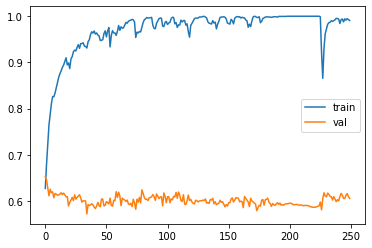

Epoch 1/250
94/95 [============================>.] - ETA: 0s - loss: 1.2147 - acc: 0.7789
Epoch 00001: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 1.2052 - acc: 0.7807 - val_loss: 1.8154 - val_acc: 0.6257
Epoch 2/250
92/95 [============================>.] - ETA: 0s - loss: 0.6389 - acc: 0.8512
Epoch 00002: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.6320 - acc: 0.8513 - val_loss: 1.6050 - val_acc: 0.6168
Epoch 3/250
92/95 [============================>.] - ETA: 0s - loss: 0.4800 - acc: 0.8682
Epoch 00003: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.4747 - acc: 0.8684 - val_loss: 1.5470 - val_acc: 0.6106
Epoch 4/250
94/95 [============================>.] - ETA: 0s - loss: 0.4423 - acc: 0.8664
Epoch 00004: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.4391 - acc: 0.86

Epoch 33/250
92/95 [============================>.] - ETA: 0s - loss: 0.2340 - acc: 0.9192
Epoch 00033: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.2304 - acc: 0.9205 - val_loss: 1.7615 - val_acc: 0.5709
Epoch 34/250
95/95 [==============================] - ETA: 0s - loss: 0.2122 - acc: 0.9281
Epoch 00034: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.2122 - acc: 0.9281 - val_loss: 1.8695 - val_acc: 0.5613
Epoch 35/250
93/95 [============================>.] - ETA: 0s - loss: 0.2163 - acc: 0.9254
Epoch 00035: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.2129 - acc: 0.9268 - val_loss: 1.8242 - val_acc: 0.5659
Epoch 36/250
94/95 [============================>.] - ETA: 0s - loss: 0.1978 - acc: 0.9315
Epoch 00036: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.1965 - acc: 

93/95 [============================>.] - ETA: 0s - loss: 0.1540 - acc: 0.9509
Epoch 00064: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.1514 - acc: 0.9518 - val_loss: 2.0154 - val_acc: 0.5698
Epoch 65/250
95/95 [==============================] - ETA: 0s - loss: 0.1308 - acc: 0.9594
Epoch 00065: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.1308 - acc: 0.9594 - val_loss: 2.1264 - val_acc: 0.5682
Epoch 66/250
95/95 [==============================] - ETA: 0s - loss: 0.1220 - acc: 0.9654
Epoch 00066: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.1220 - acc: 0.9654 - val_loss: 2.3285 - val_acc: 0.5578
Epoch 67/250
93/95 [============================>.] - ETA: 0s - loss: 0.1360 - acc: 0.9610
Epoch 00067: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 22ms/step - loss: 0.1337 - acc: 0.9617 - val_

Epoch 96/250
93/95 [============================>.] - ETA: 0s - loss: 0.0411 - acc: 0.9892
Epoch 00096: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.0404 - acc: 0.9894 - val_loss: 2.6065 - val_acc: 0.5594
Epoch 97/250
93/95 [============================>.] - ETA: 0s - loss: 0.0456 - acc: 0.9876
Epoch 00097: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0448 - acc: 0.9878 - val_loss: 2.5003 - val_acc: 0.5590
Epoch 98/250
95/95 [==============================] - ETA: 0s - loss: 0.0473 - acc: 0.9852
Epoch 00098: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0473 - acc: 0.9852 - val_loss: 2.4839 - val_acc: 0.5613
Epoch 99/250
94/95 [============================>.] - ETA: 0s - loss: 0.0809 - acc: 0.9784
Epoch 00099: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0803 - acc: 

94/95 [============================>.] - ETA: 0s - loss: 0.0765 - acc: 0.9747
Epoch 00127: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0760 - acc: 0.9749 - val_loss: 2.4133 - val_acc: 0.5567
Epoch 128/250
93/95 [============================>.] - ETA: 0s - loss: 0.0618 - acc: 0.9856
Epoch 00128: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0607 - acc: 0.9858 - val_loss: 2.4008 - val_acc: 0.5559
Epoch 129/250
93/95 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9896
Epoch 00129: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0459 - acc: 0.9898 - val_loss: 2.4333 - val_acc: 0.5555
Epoch 130/250
95/95 [==============================] - ETA: 0s - loss: 0.0425 - acc: 0.9921
Epoch 00130: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 17ms/step - loss: 0.0425 - acc: 0.9921 - v

94/95 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9990
Epoch 00158: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 2.7657 - val_acc: 0.5563
Epoch 159/250
95/95 [==============================] - ETA: 0s - loss: 0.0087 - acc: 0.9984
Epoch 00159: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0087 - acc: 0.9984 - val_loss: 2.5935 - val_acc: 0.5613
Epoch 160/250
94/95 [============================>.] - ETA: 0s - loss: 0.0113 - acc: 0.9970
Epoch 00160: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0112 - acc: 0.9970 - val_loss: 2.8022 - val_acc: 0.5544
Epoch 161/250
92/95 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.9966
Epoch 00161: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0125 - acc: 0.9967 - v

95/95 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00189: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 21ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.9957 - val_acc: 0.5532
Epoch 190/250
94/95 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00190: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.0146 - val_acc: 0.5532
Epoch 191/250
93/95 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00191: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0334 - val_acc: 0.5532
Epoch 192/250
94/95 [============================>.] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00192: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0011 - acc: 1.0000 - v

Epoch 220/250
93/95 [============================>.] - ETA: 0s - loss: 0.0047 - acc: 0.9993
Epoch 00220: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0046 - acc: 0.9993 - val_loss: 2.6284 - val_acc: 0.5578
Epoch 221/250
93/95 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 2.6848 - val_acc: 0.5590
Epoch 222/250
94/95 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 2.6951 - val_acc: 0.5590
Epoch 223/250
91/95 [===========================>..] - ETA: 0s - loss: 0.0028 - acc: 0.9997
Epoch 00223: saving model to Model\lstm_model5.h5
95/95 [==============================] - 2s 18ms/step - loss: 0.0028 - a

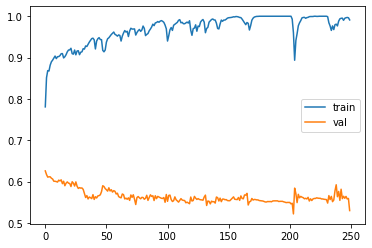

Epoch 1/250
77/77 [==============================] - ETA: 0s - loss: 1.8000 - acc: 0.6580
Epoch 00001: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 27ms/step - loss: 1.8000 - acc: 0.6580 - val_loss: 1.6819 - val_acc: 0.5625
Epoch 2/250
77/77 [==============================] - ETA: 0s - loss: 1.0165 - acc: 0.7106
Epoch 00002: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 23ms/step - loss: 1.0165 - acc: 0.7106 - val_loss: 1.4437 - val_acc: 0.5887
Epoch 3/250
76/77 [============================>.] - ETA: 0s - loss: 0.7686 - acc: 0.7447
Epoch 00003: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 24ms/step - loss: 0.7673 - acc: 0.7451 - val_loss: 1.3822 - val_acc: 0.5975
Epoch 4/250
76/77 [============================>.] - ETA: 0s - loss: 0.6792 - acc: 0.7775
Epoch 00004: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 22ms/step - loss: 0.6781 - acc: 0.77

Epoch 32/250
76/77 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9243
Epoch 00032: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 29ms/step - loss: 0.2132 - acc: 0.9245 - val_loss: 1.9370 - val_acc: 0.5806
Epoch 33/250
76/77 [============================>.] - ETA: 0s - loss: 0.2050 - acc: 0.9252
Epoch 00033: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 29ms/step - loss: 0.2047 - acc: 0.9253 - val_loss: 2.0292 - val_acc: 0.5671
Epoch 34/250
76/77 [============================>.] - ETA: 0s - loss: 0.1953 - acc: 0.9309
Epoch 00034: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 31ms/step - loss: 0.1950 - acc: 0.9310 - val_loss: 2.0437 - val_acc: 0.5694
Epoch 35/250
77/77 [==============================] - ETA: 0s - loss: 0.1755 - acc: 0.9397
Epoch 00035: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 44ms/step - loss: 0.1755 - acc: 

Epoch 63/250
77/77 [==============================] - ETA: 0s - loss: 0.0808 - acc: 0.9770
Epoch 00063: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 41ms/step - loss: 0.0808 - acc: 0.9770 - val_loss: 2.2790 - val_acc: 0.6018
Epoch 64/250
77/77 [==============================] - ETA: 0s - loss: 0.0869 - acc: 0.9725
Epoch 00064: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 37ms/step - loss: 0.0869 - acc: 0.9725 - val_loss: 2.5099 - val_acc: 0.5740
Epoch 65/250
77/77 [==============================] - ETA: 0s - loss: 0.0733 - acc: 0.9782
Epoch 00065: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 37ms/step - loss: 0.0733 - acc: 0.9782 - val_loss: 2.4633 - val_acc: 0.5775
Epoch 66/250
76/77 [============================>.] - ETA: 0s - loss: 0.0788 - acc: 0.9786
Epoch 00066: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 35ms/step - loss: 0.0787 - acc: 

75/77 [============================>.] - ETA: 0s - loss: 0.0242 - acc: 0.9967
Epoch 00094: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 39ms/step - loss: 0.0239 - acc: 0.9967 - val_loss: 2.8513 - val_acc: 0.5628
Epoch 95/250
76/77 [============================>.] - ETA: 0s - loss: 0.0231 - acc: 0.9975
Epoch 00095: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 35ms/step - loss: 0.0230 - acc: 0.9975 - val_loss: 2.8633 - val_acc: 0.5655
Epoch 96/250
75/77 [============================>.] - ETA: 0s - loss: 0.0232 - acc: 0.9975
Epoch 00096: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 33ms/step - loss: 0.0229 - acc: 0.9975 - val_loss: 2.8677 - val_acc: 0.5667
Epoch 97/250
77/77 [==============================] - ETA: 0s - loss: 0.0222 - acc: 0.9959- ETA: 1s - loss: 0.04
Epoch 00097: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 35ms/step - loss: 0.022

Epoch 125/250
76/77 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9975
Epoch 00125: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 40ms/step - loss: 0.0179 - acc: 0.9975 - val_loss: 3.0299 - val_acc: 0.5582
Epoch 126/250
75/77 [============================>.] - ETA: 0s - loss: 0.0177 - acc: 0.9971
Epoch 00126: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 40ms/step - loss: 0.0175 - acc: 0.9971 - val_loss: 3.0380 - val_acc: 0.5582
Epoch 127/250
76/77 [============================>.] - ETA: 0s - loss: 0.0200 - acc: 0.9975
Epoch 00127: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 41ms/step - loss: 0.0200 - acc: 0.9975 - val_loss: 3.0662 - val_acc: 0.5571
Epoch 128/250
75/77 [============================>.] - ETA: 0s - loss: 0.0318 - acc: 0.9908
Epoch 00128: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 41ms/step - loss: 0.0314 - a

76/77 [============================>.] - ETA: 0s - loss: 0.0463 - acc: 0.9852
Epoch 00156: saving model to Model\lstm_model5.h5
77/77 [==============================] - 4s 48ms/step - loss: 0.0462 - acc: 0.9852 - val_loss: 3.0309 - val_acc: 0.5478
Epoch 157/250
75/77 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9904
Epoch 00157: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 43ms/step - loss: 0.0347 - acc: 0.9906 - val_loss: 3.0031 - val_acc: 0.5517
Epoch 158/250
75/77 [============================>.] - ETA: 0s - loss: 0.0293 - acc: 0.9933
Epoch 00158: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 37ms/step - loss: 0.0289 - acc: 0.9934 - val_loss: 3.1023 - val_acc: 0.5463
Epoch 159/250
76/77 [============================>.] - ETA: 0s - loss: 0.1357 - acc: 0.9704- ETA: 
Epoch 00159: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 40ms/step - loss: 0.1355 - acc: 0.9

76/77 [============================>.] - ETA: 0s - loss: 0.0157 - acc: 0.9955
Epoch 00187: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 36ms/step - loss: 0.0157 - acc: 0.9955 - val_loss: 3.1936 - val_acc: 0.5617
Epoch 188/250
77/77 [==============================] - ETA: 0s - loss: 0.0464 - acc: 0.9869
Epoch 00188: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 43ms/step - loss: 0.0464 - acc: 0.9869 - val_loss: 3.0533 - val_acc: 0.5752
Epoch 189/250
74/77 [===========================>..] - ETA: 0s - loss: 0.0355 - acc: 0.9890
Epoch 00189: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 33ms/step - loss: 0.0346 - acc: 0.9893 - val_loss: 3.0462 - val_acc: 0.5752
Epoch 190/250
76/77 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9807
Epoch 00190: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 27ms/step - loss: 0.0875 - acc: 0.9807 - v

76/77 [============================>.] - ETA: 0s - loss: 0.0110 - acc: 0.9971
Epoch 00218: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 36ms/step - loss: 0.0110 - acc: 0.9971 - val_loss: 3.1857 - val_acc: 0.5505
Epoch 219/250
77/77 [==============================] - ETA: 0s - loss: 0.0096 - acc: 0.9975
Epoch 00219: saving model to Model\lstm_model5.h5
77/77 [==============================] - 3s 38ms/step - loss: 0.0096 - acc: 0.9975 - val_loss: 3.2127 - val_acc: 0.5463
Epoch 220/250
76/77 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9988
Epoch 00220: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 31ms/step - loss: 0.0061 - acc: 0.9988 - val_loss: 3.3025 - val_acc: 0.5436
Epoch 221/250
75/77 [============================>.] - ETA: 0s - loss: 0.0256 - acc: 0.9933- ETA: 0s - loss: 0.0474 -
Epoch 00221: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 26ms/step - loss

76/77 [============================>.] - ETA: 0s - loss: 0.0635 - acc: 0.9877- ETA: 0s - loss: 0.0688 - acc: 0.98
Epoch 00249: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 30ms/step - loss: 0.0634 - acc: 0.9877 - val_loss: 3.3212 - val_acc: 0.5443
Epoch 250/250
76/77 [============================>.] - ETA: 0s - loss: 0.0342 - acc: 0.9910
Epoch 00250: saving model to Model\lstm_model5.h5
77/77 [==============================] - 2s 28ms/step - loss: 0.0342 - acc: 0.9910 - val_loss: 3.2113 - val_acc: 0.5536


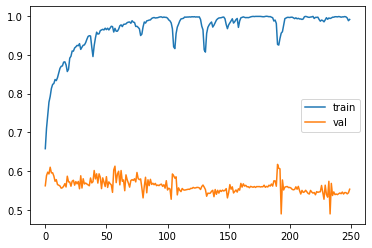

Epoch 1/250
83/83 [==============================] - ETA: 0s - loss: 1.7932 - acc: 0.7177
Epoch 00001: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 29ms/step - loss: 1.7932 - acc: 0.7177 - val_loss: 1.9347 - val_acc: 0.6685
Epoch 2/250
81/83 [============================>.] - ETA: 0s - loss: 1.0398 - acc: 0.7674
Epoch 00002: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 30ms/step - loss: 1.0508 - acc: 0.7594 - val_loss: 1.5089 - val_acc: 0.6615
Epoch 3/250
80/83 [===========================>..] - ETA: 0s - loss: 0.7291 - acc: 0.7879
Epoch 00003: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 27ms/step - loss: 0.7431 - acc: 0.7791 - val_loss: 1.3157 - val_acc: 0.6500
Epoch 4/250
81/83 [============================>.] - ETA: 0s - loss: 0.6307 - acc: 0.7944
Epoch 00004: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 25ms/step - loss: 0.6409 - acc: 0.78

Epoch 32/250
81/83 [============================>.] - ETA: 0s - loss: 0.1855 - acc: 0.9583
Epoch 00032: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 34ms/step - loss: 0.1870 - acc: 0.9576 - val_loss: 1.5167 - val_acc: 0.6118
Epoch 33/250
81/83 [============================>.] - ETA: 0s - loss: 0.1805 - acc: 0.9579
Epoch 00033: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 33ms/step - loss: 0.1808 - acc: 0.9583 - val_loss: 1.5233 - val_acc: 0.6056
Epoch 34/250
83/83 [==============================] - ETA: 0s - loss: 0.1984 - acc: 0.9530
Epoch 00034: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 32ms/step - loss: 0.1984 - acc: 0.9530 - val_loss: 1.5455 - val_acc: 0.6056
Epoch 35/250
82/83 [============================>.] - ETA: 0s - loss: 0.1853 - acc: 0.9546
Epoch 00035: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 33ms/step - loss: 0.1852 - acc: 

Epoch 63/250
82/83 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9665
Epoch 00063: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 29ms/step - loss: 0.1328 - acc: 0.9667 - val_loss: 1.9337 - val_acc: 0.5910
Epoch 64/250
81/83 [============================>.] - ETA: 0s - loss: 0.1416 - acc: 0.9641
Epoch 00064: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 28ms/step - loss: 0.1399 - acc: 0.9648 - val_loss: 1.9096 - val_acc: 0.5979
Epoch 65/250
82/83 [============================>.] - ETA: 0s - loss: 0.1194 - acc: 0.9668
Epoch 00065: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 31ms/step - loss: 0.1193 - acc: 0.9667 - val_loss: 1.8468 - val_acc: 0.6095
Epoch 66/250
81/83 [============================>.] - ETA: 0s - loss: 0.0787 - acc: 0.9826
Epoch 00066: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 31ms/step - loss: 0.0781 - acc: 

83/83 [==============================] - ETA: 0s - loss: 0.0289 - acc: 0.9947
Epoch 00094: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 27ms/step - loss: 0.0289 - acc: 0.9947 - val_loss: 2.4144 - val_acc: 0.5829
Epoch 95/250
82/83 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9939
Epoch 00095: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 27ms/step - loss: 0.0340 - acc: 0.9939 - val_loss: 2.3554 - val_acc: 0.5914
Epoch 96/250
82/83 [============================>.] - ETA: 0s - loss: 0.0514 - acc: 0.9867
Epoch 00096: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 27ms/step - loss: 0.0529 - acc: 0.9864 - val_loss: 2.3844 - val_acc: 0.5998
Epoch 97/250
82/83 [============================>.] - ETA: 0s - loss: 0.1156 - acc: 0.9688
Epoch 00097: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 26ms/step - loss: 0.1153 - acc: 0.9689 - val_

82/83 [============================>.] - ETA: 0s - loss: 0.0332 - acc: 0.9889
Epoch 00125: saving model to Model\lstm_model5.h5
83/83 [==============================] - 3s 33ms/step - loss: 0.0361 - acc: 0.9879 - val_loss: 2.5824 - val_acc: 0.5528
Epoch 126/250
82/83 [============================>.] - ETA: 0s - loss: 0.0401 - acc: 0.9901
Epoch 00126: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 29ms/step - loss: 0.0408 - acc: 0.9898 - val_loss: 2.5620 - val_acc: 0.5563
Epoch 127/250
82/83 [============================>.] - ETA: 0s - loss: 0.0330 - acc: 0.9928
Epoch 00127: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 29ms/step - loss: 0.0329 - acc: 0.9928 - val_loss: 2.4432 - val_acc: 0.5748
Epoch 128/250
82/83 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9962
Epoch 00128: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 29ms/step - loss: 0.0166 - acc: 0.9962 - v

82/83 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.9996
Epoch 00156: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 27ms/step - loss: 0.0059 - acc: 0.9996 - val_loss: 2.6550 - val_acc: 0.5786
Epoch 157/250
83/83 [==============================] - ETA: 0s - loss: 0.0051 - acc: 0.9989
Epoch 00157: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 26ms/step - loss: 0.0051 - acc: 0.9989 - val_loss: 2.7023 - val_acc: 0.5725
Epoch 158/250
82/83 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.9985
Epoch 00158: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 26ms/step - loss: 0.0079 - acc: 0.9985 - val_loss: 2.7153 - val_acc: 0.5705
Epoch 159/250
82/83 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9981
Epoch 00159: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 25ms/step - loss: 0.0094 - acc: 0.9981 - v

83/83 [==============================] - ETA: 0s - loss: 0.0610 - acc: 0.9822
Epoch 00187: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0610 - acc: 0.9822 - val_loss: 2.5130 - val_acc: 0.6072
Epoch 188/250
79/83 [===========================>..] - ETA: 0s - loss: 0.0648 - acc: 0.9814
Epoch 00188: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0680 - acc: 0.9803 - val_loss: 2.3952 - val_acc: 0.6153
Epoch 189/250
79/83 [===========================>..] - ETA: 0s - loss: 0.0441 - acc: 0.9869
Epoch 00189: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0442 - acc: 0.9871 - val_loss: 2.3997 - val_acc: 0.6261
Epoch 190/250
80/83 [===========================>..] - ETA: 0s - loss: 0.1299 - acc: 0.9664
Epoch 00190: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 22ms/step - loss: 0.1270 - acc: 0.9670 - v

81/83 [============================>.] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00218: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.9850 - val_acc: 0.5690
Epoch 219/250
83/83 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00219: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0200 - val_acc: 0.5678
Epoch 220/250
81/83 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 19ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0149 - val_acc: 0.5709
Epoch 221/250
81/83 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 19ms/step - loss: 0.0012 - acc: 1.0000 - v

82/83 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 0.9996
Epoch 00249: saving model to Model\lstm_model5.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.0025 - acc: 0.9996 - val_loss: 2.7679 - val_acc: 0.5844
Epoch 250/250
80/83 [===========================>..] - ETA: 0s - loss: 0.0022 - acc: 0.9996
Epoch 00250: saving model to Model\lstm_model5.h5
83/83 [==============================] - 2s 18ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 2.7819 - val_acc: 0.5871


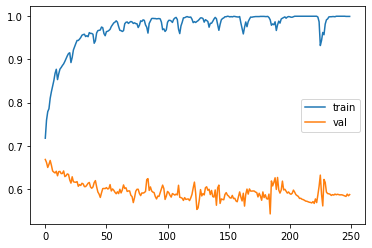

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 2.1184 - acc: 0.6542
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 2.0971 - acc: 0.6577 - val_loss: 2.0023 - val_acc: 0.6619
Epoch 2/250
77/78 [============================>.] - ETA: 0s - loss: 1.5128 - acc: 0.6372
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 19ms/step - loss: 1.4979 - acc: 0.6408 - val_loss: 1.3318 - val_acc: 0.6627
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 0.9732 - acc: 0.6938
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.9889 - acc: 0.6918 - val_loss: 1.1249 - val_acc: 0.6588
Epoch 4/250
78/78 [==============================] - ETA: 0s - loss: 0.8018 - acc: 0.7272
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.8018 - acc: 0.72

Epoch 33/250
77/78 [============================>.] - ETA: 0s - loss: 0.3238 - acc: 0.9006
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.3215 - acc: 0.9016 - val_loss: 1.4771 - val_acc: 0.5756
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3196 - acc: 0.9046
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3236 - acc: 0.9024 - val_loss: 1.4557 - val_acc: 0.5829
Epoch 35/250
76/78 [============================>.] - ETA: 0s - loss: 0.3117 - acc: 0.9030
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3070 - acc: 0.9052 - val_loss: 1.5155 - val_acc: 0.5702
Epoch 36/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2947 - acc: 0.9171
Epoch 00036: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2910 - acc: 

77/78 [============================>.] - ETA: 0s - loss: 0.1468 - acc: 0.9619
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1457 - acc: 0.9622 - val_loss: 1.9235 - val_acc: 0.5540
Epoch 65/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1415 - acc: 0.9624
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1385 - acc: 0.9638 - val_loss: 1.9001 - val_acc: 0.5590
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.1399 - acc: 0.9643
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1388 - acc: 0.9646 - val_loss: 2.0169 - val_acc: 0.5497
Epoch 67/250
76/78 [============================>.] - ETA: 0s - loss: 0.1596 - acc: 0.9560
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.1583 - acc: 0.9566 - val_

Epoch 96/250
76/78 [============================>.] - ETA: 0s - loss: 0.0960 - acc: 0.9733
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0941 - acc: 0.9739 - val_loss: 2.0187 - val_acc: 0.5609
Epoch 97/250
76/78 [============================>.] - ETA: 0s - loss: 0.0849 - acc: 0.9753
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0832 - acc: 0.9759 - val_loss: 2.0227 - val_acc: 0.5574
Epoch 98/250
77/78 [============================>.] - ETA: 0s - loss: 0.0941 - acc: 0.9736
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0934 - acc: 0.9739 - val_loss: 1.9827 - val_acc: 0.5713
Epoch 99/250
76/78 [============================>.] - ETA: 0s - loss: 0.1686 - acc: 0.9535
Epoch 00099: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1651 - acc: 

77/78 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9870
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0485 - acc: 0.9871 - val_loss: 2.2188 - val_acc: 0.5528
Epoch 128/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0464 - acc: 0.9871
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0451 - acc: 0.9875 - val_loss: 2.2543 - val_acc: 0.5536
Epoch 129/250
77/78 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9878
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0493 - acc: 0.9879 - val_loss: 2.2582 - val_acc: 0.5505
Epoch 130/250
78/78 [==============================] - ETA: 0s - loss: 0.0462 - acc: 0.9888
Epoch 00130: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0462 - acc: 0.9888 - v

78/78 [==============================] - ETA: 0s - loss: 0.0420 - acc: 0.9888
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0420 - acc: 0.9888 - val_loss: 2.3205 - val_acc: 0.5505
Epoch 159/250
77/78 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9903
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0381 - acc: 0.9904 - val_loss: 2.3223 - val_acc: 0.5501
Epoch 160/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0362 - acc: 0.9907
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0350 - acc: 0.9912 - val_loss: 2.3411 - val_acc: 0.5501
Epoch 161/250
76/78 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9918
Epoch 00161: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0335 - acc: 0.9920 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.0989 - acc: 0.9696
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0959 - acc: 0.9707 - val_loss: 2.2194 - val_acc: 0.5678
Epoch 190/250
76/78 [============================>.] - ETA: 0s - loss: 0.0810 - acc: 0.9729
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0800 - acc: 0.9731 - val_loss: 2.1547 - val_acc: 0.5833
Epoch 191/250
76/78 [============================>.] - ETA: 0s - loss: 0.0810 - acc: 0.9774
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0794 - acc: 0.9779 - val_loss: 2.2714 - val_acc: 0.5671
Epoch 192/250
77/78 [============================>.] - ETA: 0s - loss: 0.1191 - acc: 0.9683
Epoch 00192: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1180 - acc: 0.9687 - v

74/78 [===========================>..] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.8250 - val_acc: 0.5497
Epoch 221/250
77/78 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.8395 - val_acc: 0.5505
Epoch 222/250
78/78 [==============================] - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.8540 - val_acc: 0.5501
Epoch 223/250
77/78 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00223: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0020 - acc: 1.0000 - v

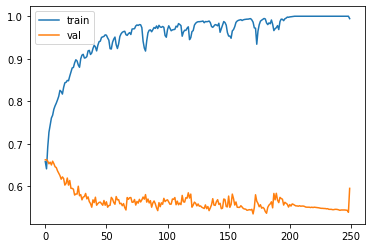

Epoch 1/250
90/91 [============================>.] - ETA: 0s - loss: 1.4223 - acc: 0.7521
Epoch 00001: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 1.4189 - acc: 0.7527 - val_loss: 1.9093 - val_acc: 0.6777
Epoch 2/250
91/91 [==============================] - ETA: 0s - loss: 0.7496 - acc: 0.7794
Epoch 00002: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 20ms/step - loss: 0.7496 - acc: 0.7794 - val_loss: 1.4896 - val_acc: 0.6866
Epoch 3/250
89/91 [============================>.] - ETA: 0s - loss: 0.5886 - acc: 0.7886
Epoch 00003: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.5818 - acc: 0.7915 - val_loss: 1.4002 - val_acc: 0.6866
Epoch 4/250
90/91 [============================>.] - ETA: 0s - loss: 0.4774 - acc: 0.8087
Epoch 00004: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.4763 - acc: 0.80

89/91 [============================>.] - ETA: 0s - loss: 0.1937 - acc: 0.9375
Epoch 00032: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1996 - acc: 0.9349 - val_loss: 1.4918 - val_acc: 0.6793
Epoch 33/250
91/91 [==============================] - ETA: 0s - loss: 0.1476 - acc: 0.9505
Epoch 00033: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1476 - acc: 0.9505 - val_loss: 1.4873 - val_acc: 0.6823
Epoch 34/250
87/91 [===========================>..] - ETA: 0s - loss: 0.1231 - acc: 0.9616
Epoch 00034: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1235 - acc: 0.9616 - val_loss: 1.5132 - val_acc: 0.6793
Epoch 35/250
90/91 [============================>.] - ETA: 0s - loss: 0.1003 - acc: 0.9722- ETA: 0s - loss: 0.0838 - acc: 0.9
Epoch 00035: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step 

87/91 [===========================>..] - ETA: 0s - loss: 0.0442 - acc: 0.9896
Epoch 00063: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.0556 - acc: 0.9872 - val_loss: 1.9673 - val_acc: 0.6685
Epoch 64/250
88/91 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9915
Epoch 00064: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0495 - acc: 0.9893 - val_loss: 2.0045 - val_acc: 0.6600
Epoch 65/250
89/91 [============================>.] - ETA: 0s - loss: 0.0401 - acc: 0.9916
Epoch 00065: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0468 - acc: 0.9893 - val_loss: 2.0062 - val_acc: 0.6611
Epoch 66/250
88/91 [============================>.] - ETA: 0s - loss: 0.0937 - acc: 0.9776
Epoch 00066: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0936 - acc: 0.9775 - val_

90/91 [============================>.] - ETA: 0s - loss: 0.1024 - acc: 0.9771
Epoch 00094: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1022 - acc: 0.9771 - val_loss: 1.9966 - val_acc: 0.6735
Epoch 95/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0903 - acc: 0.9802
Epoch 00095: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.0925 - acc: 0.9792 - val_loss: 1.9901 - val_acc: 0.6696
Epoch 96/250
89/91 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.9807- ETA: 0s - loss: 0.0306 - acc: 
Epoch 00096: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0762 - acc: 0.9809 - val_loss: 1.9795 - val_acc: 0.6704
Epoch 97/250
90/91 [============================>.] - ETA: 0s - loss: 0.0664 - acc: 0.9844
Epoch 00097: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - l

87/91 [===========================>..] - ETA: 0s - loss: 0.0518 - acc: 0.9881
Epoch 00125: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0520 - acc: 0.9879 - val_loss: 1.9614 - val_acc: 0.6681
Epoch 126/250
89/91 [============================>.] - ETA: 0s - loss: 0.0836 - acc: 0.9772
Epoch 00126: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0826 - acc: 0.9775 - val_loss: 1.9409 - val_acc: 0.6692
Epoch 127/250
89/91 [============================>.] - ETA: 0s - loss: 0.1048 - acc: 0.9709
Epoch 00127: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1036 - acc: 0.9713 - val_loss: 1.8832 - val_acc: 0.6762
Epoch 128/250
90/91 [============================>.] - ETA: 0s - loss: 0.1011 - acc: 0.9722
Epoch 00128: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1009 - acc: 0.9723 - v

90/91 [============================>.] - ETA: 0s - loss: 0.0388 - acc: 0.9927
Epoch 00156: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.0387 - acc: 0.9927 - val_loss: 1.8822 - val_acc: 0.6689
Epoch 157/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0400 - acc: 0.9921
Epoch 00157: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0404 - acc: 0.9913 - val_loss: 1.8494 - val_acc: 0.6700
Epoch 158/250
91/91 [==============================] - ETA: 0s - loss: 0.0386 - acc: 0.9910
Epoch 00158: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 18ms/step - loss: 0.0386 - acc: 0.9910 - val_loss: 1.8490 - val_acc: 0.6689
Epoch 159/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0351 - acc: 0.9935
Epoch 00159: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0377 - acc: 0.9920 - v

91/91 [==============================] - ETA: 0s - loss: 0.0400 - acc: 0.9924
Epoch 00187: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0400 - acc: 0.9924 - val_loss: 1.7621 - val_acc: 0.6739
Epoch 188/250
89/91 [============================>.] - ETA: 0s - loss: 0.0391 - acc: 0.9930- ETA: 0s - loss: 0.0119 - acc
Epoch 00188: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0391 - acc: 0.9927 - val_loss: 1.7764 - val_acc: 0.6739
Epoch 189/250
88/91 [============================>.] - ETA: 0s - loss: 0.0366 - acc: 0.9943
Epoch 00189: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0364 - acc: 0.9941 - val_loss: 1.8085 - val_acc: 0.6727
Epoch 190/250
89/91 [============================>.] - ETA: 0s - loss: 0.0350 - acc: 0.9944
Epoch 00190: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - 

Epoch 218/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0907 - acc: 0.9784
Epoch 00218: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0964 - acc: 0.9768 - val_loss: 1.7515 - val_acc: 0.6758
Epoch 219/250
90/91 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9708
Epoch 00219: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.1116 - acc: 0.9709 - val_loss: 1.7240 - val_acc: 0.6700
Epoch 220/250
88/91 [============================>.] - ETA: 0s - loss: 0.0726 - acc: 0.9826
Epoch 00220: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0725 - acc: 0.9827 - val_loss: 1.7207 - val_acc: 0.6746
Epoch 221/250
87/91 [===========================>..] - ETA: 0s - loss: 0.0478 - acc: 0.9896
Epoch 00221: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0506 - a

90/91 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9927
Epoch 00249: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0345 - acc: 0.9927 - val_loss: 1.9132 - val_acc: 0.6692
Epoch 250/250
89/91 [============================>.] - ETA: 0s - loss: 0.0510 - acc: 0.9909
Epoch 00250: saving model to Model\lstm_model5.h5
91/91 [==============================] - 2s 17ms/step - loss: 0.0513 - acc: 0.9910 - val_loss: 1.9236 - val_acc: 0.6719


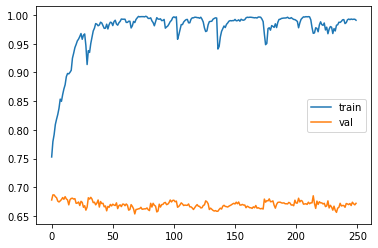

Epoch 1/250
95/98 [============================>.] - ETA: 0s - loss: 1.3205 - acc: 0.6747
Epoch 00001: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 1.2949 - acc: 0.6801 - val_loss: 1.0887 - val_acc: 0.6750
Epoch 2/250
95/98 [============================>.] - ETA: 0s - loss: 0.8008 - acc: 0.7329
Epoch 00002: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.7867 - acc: 0.7394 - val_loss: 0.9183 - val_acc: 0.6777
Epoch 3/250
95/98 [============================>.] - ETA: 0s - loss: 0.6730 - acc: 0.7572
Epoch 00003: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.6638 - acc: 0.7628 - val_loss: 0.8612 - val_acc: 0.6793
Epoch 4/250
95/98 [============================>.] - ETA: 0s - loss: 0.6360 - acc: 0.7681
Epoch 00004: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.6275 - acc: 0.77

Epoch 33/250
94/98 [===========================>..] - ETA: 0s - loss: 0.2587 - acc: 0.9122
Epoch 00033: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.2555 - acc: 0.9141 - val_loss: 1.2953 - val_acc: 0.6484
Epoch 34/250
98/98 [==============================] - ETA: 0s - loss: 0.2519 - acc: 0.9157
Epoch 00034: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.2519 - acc: 0.9157 - val_loss: 1.3131 - val_acc: 0.6527
Epoch 35/250
96/98 [============================>.] - ETA: 0s - loss: 0.2411 - acc: 0.9212
Epoch 00035: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.2392 - acc: 0.9221 - val_loss: 1.3547 - val_acc: 0.6561
Epoch 36/250
97/98 [============================>.] - ETA: 0s - loss: 0.2268 - acc: 0.9259
Epoch 00036: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.2261 - acc: 

Epoch 65/250
94/98 [===========================>..] - ETA: 0s - loss: 0.1405 - acc: 0.9624
Epoch 00065: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1380 - acc: 0.9628 - val_loss: 1.8519 - val_acc: 0.6434
Epoch 66/250
95/98 [============================>.] - ETA: 0s - loss: 0.1689 - acc: 0.9500
Epoch 00066: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1654 - acc: 0.9513 - val_loss: 1.7020 - val_acc: 0.6538
Epoch 67/250
95/98 [============================>.] - ETA: 0s - loss: 0.3409 - acc: 0.8964
Epoch 00067: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.3517 - acc: 0.8942 - val_loss: 1.5659 - val_acc: 0.6442
Epoch 68/250
95/98 [============================>.] - ETA: 0s - loss: 0.3212 - acc: 0.8961
Epoch 00068: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.3201 - acc: 

97/98 [============================>.] - ETA: 0s - loss: 0.1163 - acc: 0.9707
Epoch 00096: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1158 - acc: 0.9708 - val_loss: 1.7350 - val_acc: 0.6465
Epoch 97/250
95/98 [============================>.] - ETA: 0s - loss: 0.1511 - acc: 0.9592
Epoch 00097: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1613 - acc: 0.9583 - val_loss: 1.7372 - val_acc: 0.6484
Epoch 98/250
98/98 [==============================] - ETA: 0s - loss: 0.1467 - acc: 0.9612
Epoch 00098: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1467 - acc: 0.9612 - val_loss: 1.7536 - val_acc: 0.6449
Epoch 99/250
95/98 [============================>.] - ETA: 0s - loss: 0.1412 - acc: 0.9592
Epoch 00099: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1433 - acc: 0.9596 - val_

97/98 [============================>.] - ETA: 0s - loss: 0.1042 - acc: 0.9691
Epoch 00127: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1038 - acc: 0.9692 - val_loss: 1.8448 - val_acc: 0.6534
Epoch 128/250
95/98 [============================>.] - ETA: 0s - loss: 0.1132 - acc: 0.9674
Epoch 00128: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1220 - acc: 0.9670 - val_loss: 1.8474 - val_acc: 0.6577
Epoch 129/250
96/98 [============================>.] - ETA: 0s - loss: 0.0879 - acc: 0.9772
Epoch 00129: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0940 - acc: 0.9766 - val_loss: 1.8726 - val_acc: 0.6608
Epoch 130/250
98/98 [==============================] - ETA: 0s - loss: 0.0834 - acc: 0.9824
Epoch 00130: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0834 - acc: 0.9824 - v

97/98 [============================>.] - ETA: 0s - loss: 0.0708 - acc: 0.9800
Epoch 00158: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0705 - acc: 0.9801 - val_loss: 1.9674 - val_acc: 0.6438
Epoch 159/250
97/98 [============================>.] - ETA: 0s - loss: 0.0765 - acc: 0.9791
Epoch 00159: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 16ms/step - loss: 0.0761 - acc: 0.9792 - val_loss: 1.9349 - val_acc: 0.6453
Epoch 160/250
97/98 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9778
Epoch 00160: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0816 - acc: 0.9779 - val_loss: 1.8912 - val_acc: 0.6449
Epoch 161/250
98/98 [==============================] - ETA: 0s - loss: 0.0687 - acc: 0.9814- ETA: 0s - loss: 0.0400 - 
Epoch 00161: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - los

95/98 [============================>.] - ETA: 0s - loss: 0.1034 - acc: 0.9717
Epoch 00189: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1010 - acc: 0.9724 - val_loss: 2.0329 - val_acc: 0.6596
Epoch 190/250
95/98 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9589
Epoch 00190: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1169 - acc: 0.9590 - val_loss: 2.1054 - val_acc: 0.6554
Epoch 191/250
94/98 [===========================>..] - ETA: 0s - loss: 0.1553 - acc: 0.9535
Epoch 00191: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.1526 - acc: 0.9545 - val_loss: 1.9897 - val_acc: 0.6392
Epoch 192/250
96/98 [============================>.] - ETA: 0s - loss: 0.0812 - acc: 0.9762
Epoch 00192: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0802 - acc: 0.9766 - v

Epoch 220/250
96/98 [============================>.] - ETA: 0s - loss: 0.0396 - acc: 0.9902
Epoch 00220: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0396 - acc: 0.9901 - val_loss: 2.1901 - val_acc: 0.6592
Epoch 221/250
98/98 [==============================] - ETA: 0s - loss: 0.0365 - acc: 0.9894
Epoch 00221: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0365 - acc: 0.9894 - val_loss: 2.2932 - val_acc: 0.6430
Epoch 222/250
94/98 [===========================>..] - ETA: 0s - loss: 0.0347 - acc: 0.9920
Epoch 00222: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 17ms/step - loss: 0.0351 - acc: 0.9920 - val_loss: 2.2611 - val_acc: 0.6488
Epoch 223/250
97/98 [============================>.] - ETA: 0s - loss: 0.0238 - acc: 0.9948
Epoch 00223: saving model to Model\lstm_model5.h5
98/98 [==============================] - 2s 16ms/step - loss: 0.0237 - a

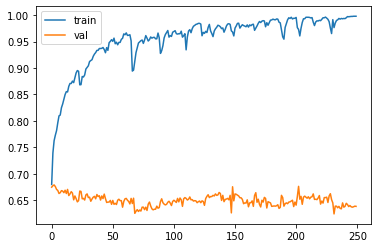

Epoch 1/250
75/78 [===========================>..] - ETA: 0s - loss: 2.1041 - acc: 0.6167
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 2.0876 - acc: 0.6135 - val_loss: 1.3741 - val_acc: 0.6654
Epoch 2/250
75/78 [===========================>..] - ETA: 0s - loss: 1.0770 - acc: 0.6808
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.0751 - acc: 0.6794 - val_loss: 1.1265 - val_acc: 0.6685
Epoch 3/250
76/78 [============================>.] - ETA: 0s - loss: 0.8485 - acc: 0.7031
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.8571 - acc: 0.6979 - val_loss: 1.0638 - val_acc: 0.6631
Epoch 4/250
78/78 [==============================] - ETA: 0s - loss: 0.7769 - acc: 0.7111
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.7769 - acc: 0.71

74/78 [===========================>..] - ETA: 0s - loss: 0.4067 - acc: 0.8467
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4033 - acc: 0.8473 - val_loss: 1.2965 - val_acc: 0.6253
Epoch 33/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3964 - acc: 0.8505
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.3935 - acc: 0.8526 - val_loss: 1.3084 - val_acc: 0.6237
Epoch 34/250
77/78 [============================>.] - ETA: 0s - loss: 0.4093 - acc: 0.8446
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4071 - acc: 0.8461 - val_loss: 1.2620 - val_acc: 0.6326
Epoch 35/250
76/78 [============================>.] - ETA: 0s - loss: 0.4190 - acc: 0.8421
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4174 - acc: 0.8429 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.2596 - acc: 0.8883
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2550 - acc: 0.8911 - val_loss: 1.6916 - val_acc: 0.6295
Epoch 64/250
77/78 [============================>.] - ETA: 0s - loss: 0.2429 - acc: 0.8957
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2414 - acc: 0.8967 - val_loss: 1.7004 - val_acc: 0.6299
Epoch 65/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2355 - acc: 0.8944
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2299 - acc: 0.8980 - val_loss: 1.7020 - val_acc: 0.6322
Epoch 66/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2236 - acc: 0.8988
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2199 - acc: 0.9012 - val_

Epoch 95/250
78/78 [==============================] - ETA: 0s - loss: 0.1633 - acc: 0.9514
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1633 - acc: 0.9514 - val_loss: 2.1028 - val_acc: 0.5682
Epoch 96/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2054 - acc: 0.9388
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2017 - acc: 0.9405 - val_loss: 2.1689 - val_acc: 0.5555
Epoch 97/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2376 - acc: 0.9162
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2330 - acc: 0.9188 - val_loss: 2.1062 - val_acc: 0.5617
Epoch 98/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2057 - acc: 0.9337
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2025 - acc: 

75/78 [===========================>..] - ETA: 0s - loss: 0.1364 - acc: 0.9546
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1343 - acc: 0.9546 - val_loss: 2.4676 - val_acc: 0.5436
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9663
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0987 - acc: 0.9650 - val_loss: 2.4588 - val_acc: 0.5474
Epoch 128/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1250 - acc: 0.9611
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1213 - acc: 0.9618 - val_loss: 2.5481 - val_acc: 0.5347
Epoch 129/250
77/78 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9789
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0819 - acc: 0.9791 - v

78/78 [==============================] - ETA: 0s - loss: 0.0517 - acc: 0.9916
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0517 - acc: 0.9916 - val_loss: 2.6307 - val_acc: 0.5501
Epoch 158/250
78/78 [==============================] - ETA: 0s - loss: 0.0583 - acc: 0.9879
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0583 - acc: 0.9879 - val_loss: 2.6314 - val_acc: 0.5528
Epoch 159/250
77/78 [============================>.] - ETA: 0s - loss: 0.0633 - acc: 0.9850- ETA: 0s - loss: 0.0702 - acc: 0.
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0628 - acc: 0.9851 - val_loss: 2.6956 - val_acc: 0.5474
Epoch 160/250
76/78 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9926
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/ste

76/78 [============================>.] - ETA: 0s - loss: 0.1529 - acc: 0.9515
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1618 - acc: 0.9494 - val_loss: 2.6097 - val_acc: 0.5675
Epoch 189/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1581 - acc: 0.9550
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1628 - acc: 0.9530 - val_loss: 2.6615 - val_acc: 0.5590
Epoch 190/250
77/78 [============================>.] - ETA: 0s - loss: 0.1246 - acc: 0.9655
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1242 - acc: 0.9654 - val_loss: 2.6226 - val_acc: 0.5732
Epoch 191/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0851 - acc: 0.9750
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0916 - acc: 0.9735 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0945 - acc: 0.9778
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1005 - acc: 0.9755 - val_loss: 2.7533 - val_acc: 0.5702
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.0767 - acc: 0.9815
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0787 - acc: 0.9807 - val_loss: 2.7021 - val_acc: 0.5694
Epoch 221/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9854
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 21ms/step - loss: 0.0680 - acc: 0.9847 - val_loss: 2.6889 - val_acc: 0.5748
Epoch 222/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0577 - acc: 0.9896
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.0599 - acc: 0.9888 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.0434 - acc: 0.9908
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0520 - acc: 0.9883 - val_loss: 2.8066 - val_acc: 0.5721


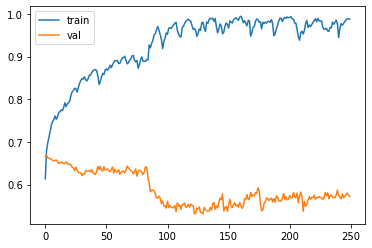

Epoch 1/250
74/78 [===========================>..] - ETA: 0s - loss: 2.3410 - acc: 0.5612
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 2.2990 - acc: 0.5621 - val_loss: 1.7509 - val_acc: 0.5420
Epoch 2/250
76/78 [============================>.] - ETA: 0s - loss: 1.3102 - acc: 0.6571
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 1.2892 - acc: 0.6629 - val_loss: 1.7222 - val_acc: 0.5740
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 1.0591 - acc: 0.6993
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.0444 - acc: 0.7031 - val_loss: 1.6107 - val_acc: 0.5667
Epoch 4/250
75/78 [===========================>..] - ETA: 0s - loss: 0.8612 - acc: 0.7433
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.8413 - acc: 0.74

Epoch 33/250
77/78 [============================>.] - ETA: 0s - loss: 0.3406 - acc: 0.8904
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3377 - acc: 0.8915 - val_loss: 1.4729 - val_acc: 0.5844
Epoch 34/250
76/78 [============================>.] - ETA: 0s - loss: 0.3368 - acc: 0.8935
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3303 - acc: 0.8959 - val_loss: 1.4759 - val_acc: 0.5844
Epoch 35/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3367 - acc: 0.8927
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3336 - acc: 0.8939 - val_loss: 1.5187 - val_acc: 0.5783
Epoch 36/250
77/78 [============================>.] - ETA: 0s - loss: 0.3273 - acc: 0.8933
Epoch 00036: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3244 - acc: 

Epoch 65/250
76/78 [============================>.] - ETA: 0s - loss: 0.2687 - acc: 0.9149
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2639 - acc: 0.9168 - val_loss: 1.6147 - val_acc: 0.5752
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.2743 - acc: 0.9176
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2718 - acc: 0.9184 - val_loss: 1.6495 - val_acc: 0.5798
Epoch 67/250
77/78 [============================>.] - ETA: 0s - loss: 0.2635 - acc: 0.9115
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2612 - acc: 0.9124 - val_loss: 1.6745 - val_acc: 0.5725
Epoch 68/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2315 - acc: 0.9303
Epoch 00068: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2335 - acc: 

Epoch 97/250
78/78 [==============================] - ETA: 0s - loss: 0.1616 - acc: 0.9522
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1616 - acc: 0.9522 - val_loss: 1.9147 - val_acc: 0.5675
Epoch 98/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1779 - acc: 0.9483
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1728 - acc: 0.9498 - val_loss: 1.8483 - val_acc: 0.5744
Epoch 99/250
78/78 [==============================] - ETA: 0s - loss: 0.1592 - acc: 0.9518
Epoch 00099: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1592 - acc: 0.9518 - val_loss: 1.8567 - val_acc: 0.5763
Epoch 100/250
78/78 [==============================] - ETA: 0s - loss: 0.1351 - acc: 0.9614
Epoch 00100: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1351 - acc:

75/78 [===========================>..] - ETA: 0s - loss: 0.0739 - acc: 0.9829
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0718 - acc: 0.9835 - val_loss: 2.0680 - val_acc: 0.5493
Epoch 129/250
76/78 [============================>.] - ETA: 0s - loss: 0.0692 - acc: 0.9864
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0679 - acc: 0.9867 - val_loss: 2.1007 - val_acc: 0.5540
Epoch 130/250
76/78 [============================>.] - ETA: 0s - loss: 0.0658 - acc: 0.9877
Epoch 00130: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0645 - acc: 0.9879 - val_loss: 2.0759 - val_acc: 0.5555
Epoch 131/250
76/78 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9840
Epoch 00131: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0763 - acc: 0.9843 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9794
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0740 - acc: 0.9799 - val_loss: 2.2168 - val_acc: 0.5705
Epoch 160/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0770 - acc: 0.9792
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0757 - acc: 0.9795 - val_loss: 2.1031 - val_acc: 0.5748
Epoch 161/250
77/78 [============================>.] - ETA: 0s - loss: 0.0957 - acc: 0.9712
Epoch 00161: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0949 - acc: 0.9715 - val_loss: 2.2977 - val_acc: 0.5586
Epoch 162/250
76/78 [============================>.] - ETA: 0s - loss: 0.0868 - acc: 0.9729
Epoch 00162: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0851 - acc: 0.9735 - v

78/78 [==============================] - ETA: 0s - loss: 0.0531 - acc: 0.9871
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0531 - acc: 0.9871 - val_loss: 2.3340 - val_acc: 0.5652
Epoch 191/250
76/78 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9852
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0486 - acc: 0.9855 - val_loss: 2.3673 - val_acc: 0.5632
Epoch 192/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0421 - acc: 0.9879
Epoch 00192: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0408 - acc: 0.9883 - val_loss: 2.3712 - val_acc: 0.5798
Epoch 193/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0439 - acc: 0.9871
Epoch 00193: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0425 - acc: 0.9875 - v

77/78 [============================>.] - ETA: 0s - loss: 0.0503 - acc: 0.9866
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0499 - acc: 0.9867 - val_loss: 2.2925 - val_acc: 0.5767
Epoch 222/250
74/78 [===========================>..] - ETA: 0s - loss: 0.0543 - acc: 0.9869
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0526 - acc: 0.9871 - val_loss: 2.3427 - val_acc: 0.5798
Epoch 223/250
76/78 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9881
Epoch 00223: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0454 - acc: 0.9883 - val_loss: 2.3435 - val_acc: 0.5779
Epoch 224/250
75/78 [===========================>..] - ETA: 0s - loss: 0.0395 - acc: 0.9917
Epoch 00224: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0383 - acc: 0.9920 - v

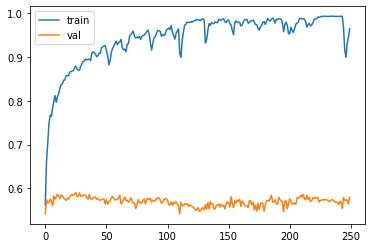

Epoch 1/250
74/78 [===========================>..] - ETA: 0s - loss: 1.6543 - acc: 0.6119
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.6869 - acc: 0.6055 - val_loss: 1.7422 - val_acc: 0.6164
Epoch 2/250
78/78 [==============================] - ETA: 0s - loss: 1.0242 - acc: 0.7115
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.0242 - acc: 0.7115 - val_loss: 1.5988 - val_acc: 0.6064
Epoch 3/250
74/78 [===========================>..] - ETA: 0s - loss: 0.8200 - acc: 0.7247
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.8606 - acc: 0.7131 - val_loss: 1.4774 - val_acc: 0.6191
Epoch 4/250
76/78 [============================>.] - ETA: 0s - loss: 0.7757 - acc: 0.7249
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 2s 20ms/step - loss: 0.7643 - acc: 0.73

78/78 [==============================] - ETA: 0s - loss: 0.5209 - acc: 0.8160
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5209 - acc: 0.8160 - val_loss: 1.3989 - val_acc: 0.6122
Epoch 33/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4877 - acc: 0.8292
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4928 - acc: 0.8256 - val_loss: 1.4048 - val_acc: 0.6149
Epoch 34/250
78/78 [==============================] - ETA: 0s - loss: 0.4868 - acc: 0.8309
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4868 - acc: 0.8309 - val_loss: 1.4034 - val_acc: 0.6141
Epoch 35/250
74/78 [===========================>..] - ETA: 0s - loss: 0.4652 - acc: 0.8395
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4793 - acc: 0.8321 - val_

74/78 [===========================>..] - ETA: 0s - loss: 0.3543 - acc: 0.8801
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3651 - acc: 0.8779 - val_loss: 1.4197 - val_acc: 0.6257
Epoch 64/250
77/78 [============================>.] - ETA: 0s - loss: 0.3751 - acc: 0.8754
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3737 - acc: 0.8767 - val_loss: 1.4631 - val_acc: 0.6133
Epoch 65/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3680 - acc: 0.8699
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3780 - acc: 0.8686 - val_loss: 1.4400 - val_acc: 0.6210
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8795
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3569 - acc: 0.8807 - val_

74/78 [===========================>..] - ETA: 0s - loss: 0.2933 - acc: 0.9092
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.2891 - acc: 0.9112 - val_loss: 1.5440 - val_acc: 0.6357
Epoch 95/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3841 - acc: 0.8788
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3761 - acc: 0.8831 - val_loss: 1.5058 - val_acc: 0.6295
Epoch 96/250
77/78 [============================>.] - ETA: 0s - loss: 0.3504 - acc: 0.8900
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3491 - acc: 0.8907 - val_loss: 1.5427 - val_acc: 0.6253
Epoch 97/250
76/78 [============================>.] - ETA: 0s - loss: 0.3356 - acc: 0.8927
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3326 - acc: 0.8951 - val_

77/78 [============================>.] - ETA: 0s - loss: 0.2263 - acc: 0.9253
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2280 - acc: 0.9241 - val_loss: 1.8403 - val_acc: 0.6076
Epoch 126/250
76/78 [============================>.] - ETA: 0s - loss: 0.2312 - acc: 0.9276
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2316 - acc: 0.9281 - val_loss: 1.8342 - val_acc: 0.6195
Epoch 127/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4227 - acc: 0.8637
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4123 - acc: 0.8678 - val_loss: 1.7095 - val_acc: 0.6245
Epoch 128/250
78/78 [==============================] - ETA: 0s - loss: 0.3271 - acc: 0.8984
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3271 - acc: 0.8984 - v

76/78 [============================>.] - ETA: 0s - loss: 0.2397 - acc: 0.9227
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2374 - acc: 0.9241 - val_loss: 1.8943 - val_acc: 0.5852
Epoch 157/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2689 - acc: 0.9122
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2639 - acc: 0.9144 - val_loss: 1.9431 - val_acc: 0.5794
Epoch 158/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2353 - acc: 0.9271
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2315 - acc: 0.9285 - val_loss: 1.9593 - val_acc: 0.5744
Epoch 159/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2089 - acc: 0.9375
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2039 - acc: 0.9397 - v

77/78 [============================>.] - ETA: 0s - loss: 0.1714 - acc: 0.9481
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1705 - acc: 0.9486 - val_loss: 1.9971 - val_acc: 0.5902
Epoch 188/250
76/78 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9597
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1317 - acc: 0.9606 - val_loss: 2.0577 - val_acc: 0.5840
Epoch 189/250
77/78 [============================>.] - ETA: 0s - loss: 0.1197 - acc: 0.9667
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1193 - acc: 0.9671 - val_loss: 2.0709 - val_acc: 0.5821
Epoch 190/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1214 - acc: 0.9667
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1189 - acc: 0.9679 - v

78/78 [==============================] - ETA: 0s - loss: 0.1815 - acc: 0.9494
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1815 - acc: 0.9494 - val_loss: 1.7714 - val_acc: 0.6118
Epoch 219/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1583 - acc: 0.9554
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1544 - acc: 0.9566 - val_loss: 1.8061 - val_acc: 0.6114
Epoch 220/250
78/78 [==============================] - ETA: 0s - loss: 0.1333 - acc: 0.9602
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1333 - acc: 0.9602 - val_loss: 1.8449 - val_acc: 0.6041
Epoch 221/250
76/78 [============================>.] - ETA: 0s - loss: 0.1338 - acc: 0.9634
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1321 - acc: 0.9642 - v

76/78 [============================>.] - ETA: 0s - loss: 0.1590 - acc: 0.9581
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1566 - acc: 0.9590 - val_loss: 1.6350 - val_acc: 0.6076
Epoch 250/250
78/78 [==============================] - ETA: 0s - loss: 0.1648 - acc: 0.9554
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1648 - acc: 0.9554 - val_loss: 1.6609 - val_acc: 0.6083


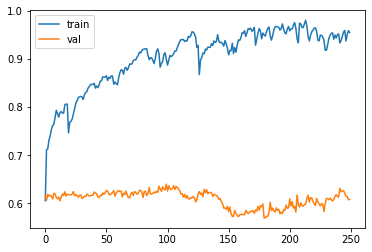

Epoch 1/250
90/94 [===========================>..] - ETA: 0s - loss: 1.2685 - acc: 0.6243
Epoch 00001: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 1.2242 - acc: 0.6378 - val_loss: 1.3836 - val_acc: 0.6719
Epoch 2/250
93/94 [============================>.] - ETA: 0s - loss: 0.9546 - acc: 0.6801
Epoch 00002: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.9510 - acc: 0.6819 - val_loss: 1.1251 - val_acc: 0.6689
Epoch 3/250
92/94 [============================>.] - ETA: 0s - loss: 0.7501 - acc: 0.6960- ETA: 0s - loss: 0.7439 - acc: 
Epoch 00003: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.7432 - acc: 0.7006 - val_loss: 1.0946 - val_acc: 0.6619
Epoch 4/250
90/94 [===========================>..] - ETA: 0s - loss: 0.7214 - acc: 0.7069
Epoch 00004: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms

Epoch 32/250
93/94 [============================>.] - ETA: 0s - loss: 0.5027 - acc: 0.7718
Epoch 00032: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.5009 - acc: 0.7725 - val_loss: 1.1899 - val_acc: 0.6403
Epoch 33/250
90/94 [===========================>..] - ETA: 0s - loss: 0.5042 - acc: 0.7684
Epoch 00033: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.4913 - acc: 0.7761 - val_loss: 1.1977 - val_acc: 0.6376
Epoch 34/250
93/94 [============================>.] - ETA: 0s - loss: 0.4838 - acc: 0.7826
Epoch 00034: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.4821 - acc: 0.7832 - val_loss: 1.2201 - val_acc: 0.6334
Epoch 35/250
94/94 [==============================] - ETA: 0s - loss: 0.4816 - acc: 0.7781
Epoch 00035: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.4816 - acc: 

Epoch 63/250
94/94 [==============================] - ETA: 0s - loss: 0.4029 - acc: 0.8386
Epoch 00063: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.4029 - acc: 0.8386 - val_loss: 1.4748 - val_acc: 0.5744
Epoch 64/250
93/94 [============================>.] - ETA: 0s - loss: 0.3669 - acc: 0.8542
Epoch 00064: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.3654 - acc: 0.8547 - val_loss: 1.5228 - val_acc: 0.5709
Epoch 65/250
93/94 [============================>.] - ETA: 0s - loss: 0.3570 - acc: 0.8602- ETA: 0s - loss: 0.3781 - acc: 0
Epoch 00065: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.3556 - acc: 0.8607 - val_loss: 1.5397 - val_acc: 0.5752
Epoch 66/250
92/94 [============================>.] - ETA: 0s - loss: 0.3426 - acc: 0.8679
Epoch 00066: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s

93/94 [============================>.] - ETA: 0s - loss: 0.2545 - acc: 0.9143
Epoch 00094: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2534 - acc: 0.9148 - val_loss: 1.8163 - val_acc: 0.5470
Epoch 95/250
93/94 [============================>.] - ETA: 0s - loss: 0.2487 - acc: 0.9157
Epoch 00095: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2477 - acc: 0.9161 - val_loss: 1.8110 - val_acc: 0.5428
Epoch 96/250
91/94 [============================>.] - ETA: 0s - loss: 0.2419 - acc: 0.9214
Epoch 00096: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2377 - acc: 0.9235 - val_loss: 1.8466 - val_acc: 0.5412
Epoch 97/250
94/94 [==============================] - ETA: 0s - loss: 0.2301 - acc: 0.9268
Epoch 00097: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2301 - acc: 0.9268 - val_

92/94 [============================>.] - ETA: 0s - loss: 0.2061 - acc: 0.9355
Epoch 00125: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2039 - acc: 0.9365 - val_loss: 1.9654 - val_acc: 0.5359
Epoch 126/250
92/94 [============================>.] - ETA: 0s - loss: 0.2067 - acc: 0.9378
Epoch 00126: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2044 - acc: 0.9389 - val_loss: 1.9519 - val_acc: 0.5386
Epoch 127/250
90/94 [===========================>..] - ETA: 0s - loss: 0.2086 - acc: 0.9337
Epoch 00127: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2028 - acc: 0.9359 - val_loss: 1.9842 - val_acc: 0.5405
Epoch 128/250
91/94 [============================>.] - ETA: 0s - loss: 0.1959 - acc: 0.9361
Epoch 00128: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1923 - acc: 0.9379 - v

Epoch 156/250
90/94 [===========================>..] - ETA: 0s - loss: 0.1827 - acc: 0.9420
Epoch 00156: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1769 - acc: 0.9442 - val_loss: 1.9934 - val_acc: 0.5428
Epoch 157/250
90/94 [===========================>..] - ETA: 0s - loss: 0.1780 - acc: 0.9486
Epoch 00157: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1734 - acc: 0.9502 - val_loss: 1.8990 - val_acc: 0.5409
Epoch 158/250
94/94 [==============================] - ETA: 0s - loss: 0.2065 - acc: 0.9342
Epoch 00158: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2065 - acc: 0.9342 - val_loss: 1.8736 - val_acc: 0.5509
Epoch 159/250
92/94 [============================>.] - ETA: 0s - loss: 0.1778 - acc: 0.9433
Epoch 00159: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1753 - a

92/94 [============================>.] - ETA: 0s - loss: 0.2088 - acc: 0.9375- ETA: 0s - loss: 0.2101 - acc: 0.9
Epoch 00187: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2061 - acc: 0.9385 - val_loss: 1.8860 - val_acc: 0.5605
Epoch 188/250
91/94 [============================>.] - ETA: 0s - loss: 0.1903 - acc: 0.9430
Epoch 00188: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1870 - acc: 0.9442 - val_loss: 1.9339 - val_acc: 0.5640
Epoch 189/250
93/94 [============================>.] - ETA: 0s - loss: 0.2162 - acc: 0.9284
Epoch 00189: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.2153 - acc: 0.9288 - val_loss: 1.9029 - val_acc: 0.5466
Epoch 190/250
91/94 [============================>.] - ETA: 0s - loss: 0.1547 - acc: 0.9512
Epoch 00190: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/st

90/94 [===========================>..] - ETA: 0s - loss: 0.2041 - acc: 0.9424
Epoch 00218: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1990 - acc: 0.9442 - val_loss: 1.7564 - val_acc: 0.5794
Epoch 219/250
92/94 [============================>.] - ETA: 0s - loss: 0.1586 - acc: 0.9545
Epoch 00219: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1570 - acc: 0.9552 - val_loss: 1.7318 - val_acc: 0.5821
Epoch 220/250
94/94 [==============================] - ETA: 0s - loss: 0.1360 - acc: 0.9629
Epoch 00220: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1360 - acc: 0.9629 - val_loss: 1.7466 - val_acc: 0.5752
Epoch 221/250
90/94 [===========================>..] - ETA: 0s - loss: 0.1214 - acc: 0.9653
Epoch 00221: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 16ms/step - loss: 0.1197 - acc: 0.9659 - v

91/94 [============================>.] - ETA: 0s - loss: 0.1232 - acc: 0.9639
Epoch 00249: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1209 - acc: 0.9649 - val_loss: 1.9129 - val_acc: 0.5717
Epoch 250/250
90/94 [===========================>..] - ETA: 0s - loss: 0.1205 - acc: 0.9639
Epoch 00250: saving model to Model\lstm_model5.h5
94/94 [==============================] - 2s 17ms/step - loss: 0.1172 - acc: 0.9653 - val_loss: 1.9573 - val_acc: 0.5705


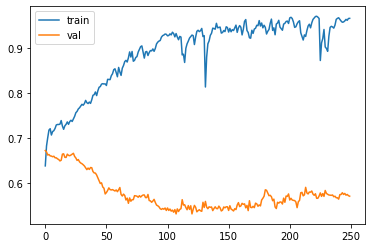

Epoch 1/250
83/86 [===========================>..] - ETA: 0s - loss: 1.5279 - acc: 0.6570
Epoch 00001: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 1.4968 - acc: 0.6629 - val_loss: 1.5495 - val_acc: 0.6264
Epoch 2/250
82/86 [===========================>..] - ETA: 0s - loss: 0.9700 - acc: 0.7123
Epoch 00002: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.9513 - acc: 0.7154 - val_loss: 1.2588 - val_acc: 0.6303
Epoch 3/250
83/86 [===========================>..] - ETA: 0s - loss: 0.7522 - acc: 0.7300
Epoch 00003: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.7387 - acc: 0.7355 - val_loss: 1.2118 - val_acc: 0.6311
Epoch 4/250
84/86 [============================>.] - ETA: 0s - loss: 0.6785 - acc: 0.7496
Epoch 00004: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.6707 - acc: 0.75

84/86 [============================>.] - ETA: 0s - loss: 0.3965 - acc: 0.8534
Epoch 00032: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.3906 - acc: 0.8559 - val_loss: 1.3918 - val_acc: 0.5914
Epoch 33/250
82/86 [===========================>..] - ETA: 0s - loss: 0.3678 - acc: 0.8620
Epoch 00033: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.3625 - acc: 0.8639 - val_loss: 1.3529 - val_acc: 0.6068
Epoch 34/250
85/86 [============================>.] - ETA: 0s - loss: 0.3391 - acc: 0.8827
Epoch 00034: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.3370 - acc: 0.8836 - val_loss: 1.3635 - val_acc: 0.5937
Epoch 35/250
85/86 [============================>.] - ETA: 0s - loss: 0.3223 - acc: 0.8901
Epoch 00035: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.3202 - acc: 0.8909 - val_

82/86 [===========================>..] - ETA: 0s - loss: 0.1979 - acc: 0.9364
Epoch 00063: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1948 - acc: 0.9369 - val_loss: 1.6085 - val_acc: 0.5975
Epoch 64/250
82/86 [===========================>..] - ETA: 0s - loss: 0.1947 - acc: 0.9394
Epoch 00064: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1922 - acc: 0.9394 - val_loss: 1.6067 - val_acc: 0.5875
Epoch 65/250
85/86 [============================>.] - ETA: 0s - loss: 0.1975 - acc: 0.9371
Epoch 00065: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1962 - acc: 0.9376 - val_loss: 1.5492 - val_acc: 0.5952
Epoch 66/250
84/86 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9275
Epoch 00066: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.2119 - acc: 0.9289 - val_

Epoch 94/250
85/86 [============================>.] - ETA: 0s - loss: 0.1599 - acc: 0.9544- ETA: 0s - loss: 0.1779 - acc:
Epoch 00094: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1622 - acc: 0.9537 - val_loss: 1.7796 - val_acc: 0.5902
Epoch 95/250
85/86 [============================>.] - ETA: 0s - loss: 0.1569 - acc: 0.9548
Epoch 00095: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1588 - acc: 0.9540 - val_loss: 1.7885 - val_acc: 0.6060
Epoch 96/250
86/86 [==============================] - ETA: 0s - loss: 0.1477 - acc: 0.9529
Epoch 00096: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1477 - acc: 0.9529 - val_loss: 1.7579 - val_acc: 0.6014
Epoch 97/250
84/86 [============================>.] - ETA: 0s - loss: 0.1319 - acc: 0.9647
Epoch 00097: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 1

Epoch 125/250
84/86 [============================>.] - ETA: 0s - loss: 0.0901 - acc: 0.9784
Epoch 00125: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0918 - acc: 0.9777 - val_loss: 1.9596 - val_acc: 0.5975
Epoch 126/250
84/86 [============================>.] - ETA: 0s - loss: 0.1076 - acc: 0.9688
Epoch 00126: saving model to Model\lstm_model5.h5
86/86 [==============================] - 2s 18ms/step - loss: 0.1064 - acc: 0.9690 - val_loss: 1.9453 - val_acc: 0.5910
Epoch 127/250
83/86 [===========================>..] - ETA: 0s - loss: 0.1504 - acc: 0.9499
Epoch 00127: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1528 - acc: 0.9493 - val_loss: 1.8182 - val_acc: 0.6272
Epoch 128/250
86/86 [==============================] - ETA: 0s - loss: 0.1775 - acc: 0.9482- ETA: 0s - loss: 0.175
Epoch 00128: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/

83/86 [===========================>..] - ETA: 0s - loss: 0.1282 - acc: 0.9612
Epoch 00156: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1279 - acc: 0.9606 - val_loss: 2.0119 - val_acc: 0.5786
Epoch 157/250
86/86 [==============================] - ETA: 0s - loss: 0.1028 - acc: 0.9701
Epoch 00157: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1028 - acc: 0.9701 - val_loss: 1.9198 - val_acc: 0.5933
Epoch 158/250
86/86 [==============================] - ETA: 0s - loss: 0.0981 - acc: 0.9712
Epoch 00158: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0981 - acc: 0.9712 - val_loss: 1.9832 - val_acc: 0.5952
Epoch 159/250
83/86 [===========================>..] - ETA: 0s - loss: 0.0946 - acc: 0.9752
Epoch 00159: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0925 - acc: 0.9759 - v

86/86 [==============================] - ETA: 0s - loss: 0.0698 - acc: 0.9788
Epoch 00187: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0698 - acc: 0.9788 - val_loss: 1.9665 - val_acc: 0.6022
Epoch 188/250
84/86 [============================>.] - ETA: 0s - loss: 0.0646 - acc: 0.9840- ETA: 0s - loss: 0.0549 - acc: 0.98
Epoch 00188: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0639 - acc: 0.9843 - val_loss: 1.9799 - val_acc: 0.6056
Epoch 189/250
86/86 [==============================] - ETA: 0s - loss: 0.0706 - acc: 0.9843
Epoch 00189: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0706 - acc: 0.9843 - val_loss: 2.0004 - val_acc: 0.5910
Epoch 190/250
82/86 [===========================>..] - ETA: 0s - loss: 0.0459 - acc: 0.9882
Epoch 00190: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/s

84/86 [============================>.] - ETA: 0s - loss: 0.1498 - acc: 0.9643
Epoch 00218: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1484 - acc: 0.9646 - val_loss: 1.9372 - val_acc: 0.6022
Epoch 219/250
82/86 [===========================>..] - ETA: 0s - loss: 0.1211 - acc: 0.9695
Epoch 00219: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1282 - acc: 0.9661 - val_loss: 1.9388 - val_acc: 0.5975
Epoch 220/250
83/86 [===========================>..] - ETA: 0s - loss: 0.1059 - acc: 0.9691
Epoch 00220: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1059 - acc: 0.9686 - val_loss: 1.8778 - val_acc: 0.6160
Epoch 221/250
83/86 [===========================>..] - ETA: 0s - loss: 0.0874 - acc: 0.9770- ETA: 0s - loss: 0.0467 - acc: 0.99
Epoch 00221: saving model to Model\lstm_model5.h5
86/86 [==============================] - 2s 18ms/s

84/86 [============================>.] - ETA: 0s - loss: 0.1176 - acc: 0.9665
Epoch 00249: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.1154 - acc: 0.9672 - val_loss: 1.9751 - val_acc: 0.6184
Epoch 250/250
83/86 [===========================>..] - ETA: 0s - loss: 0.0727 - acc: 0.9763
Epoch 00250: saving model to Model\lstm_model5.h5
86/86 [==============================] - 1s 17ms/step - loss: 0.0706 - acc: 0.9770 - val_loss: 2.0000 - val_acc: 0.6199


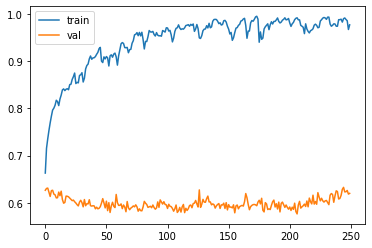

Epoch 1/250
75/78 [===========================>..] - ETA: 0s - loss: 1.9459 - acc: 0.5542
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.9141 - acc: 0.5589 - val_loss: 1.8044 - val_acc: 0.6330
Epoch 2/250
75/78 [===========================>..] - ETA: 0s - loss: 1.3860 - acc: 0.6279
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.3592 - acc: 0.6300 - val_loss: 1.6820 - val_acc: 0.6172
Epoch 3/250
77/78 [============================>.] - ETA: 0s - loss: 0.9873 - acc: 0.6802
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.9831 - acc: 0.6806 - val_loss: 1.5934 - val_acc: 0.6226
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.8404 - acc: 0.7163
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.8367 - acc: 0.71

76/78 [============================>.] - ETA: 0s - loss: 0.3845 - acc: 0.8684
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3797 - acc: 0.8702 - val_loss: 1.7426 - val_acc: 0.5887
Epoch 33/250
76/78 [============================>.] - ETA: 0s - loss: 0.3774 - acc: 0.8709
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3738 - acc: 0.8718 - val_loss: 1.8500 - val_acc: 0.5786
Epoch 34/250
78/78 [==============================] - ETA: 0s - loss: 0.3756 - acc: 0.8702
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3756 - acc: 0.8702 - val_loss: 1.8286 - val_acc: 0.5798
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3558 - acc: 0.8829
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3467 - acc: 0.8863 - val_

Epoch 64/250
77/78 [============================>.] - ETA: 0s - loss: 0.3145 - acc: 0.8953
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3135 - acc: 0.8959 - val_loss: 2.0071 - val_acc: 0.5659
Epoch 65/250
77/78 [============================>.] - ETA: 0s - loss: 0.3313 - acc: 0.8904
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3305 - acc: 0.8903 - val_loss: 2.0998 - val_acc: 0.5652
Epoch 66/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2596 - acc: 0.9202
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2546 - acc: 0.9209 - val_loss: 2.0900 - val_acc: 0.5625
Epoch 67/250
74/78 [===========================>..] - ETA: 0s - loss: 0.2302 - acc: 0.9329
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2283 - acc: 

77/78 [============================>.] - ETA: 0s - loss: 0.1852 - acc: 0.9440
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1849 - acc: 0.9442 - val_loss: 2.2679 - val_acc: 0.5586
Epoch 96/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1756 - acc: 0.9481
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1701 - acc: 0.9502 - val_loss: 2.2833 - val_acc: 0.5590
Epoch 97/250
74/78 [===========================>..] - ETA: 0s - loss: 0.1771 - acc: 0.9489
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1722 - acc: 0.9506 - val_loss: 2.3260 - val_acc: 0.5609
Epoch 98/250
76/78 [============================>.] - ETA: 0s - loss: 0.1811 - acc: 0.9461
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1788 - acc: 0.9470 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.1386 - acc: 0.9592
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.1354 - acc: 0.9602 - val_loss: 2.4395 - val_acc: 0.5759
Epoch 127/250
76/78 [============================>.] - ETA: 0s - loss: 0.1193 - acc: 0.9692
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1193 - acc: 0.9687 - val_loss: 2.4491 - val_acc: 0.5794
Epoch 128/250
76/78 [============================>.] - ETA: 0s - loss: 0.1119 - acc: 0.9696
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1108 - acc: 0.9699 - val_loss: 2.4731 - val_acc: 0.5798
Epoch 129/250
78/78 [==============================] - ETA: 0s - loss: 0.1310 - acc: 0.9634
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 19ms/step - loss: 0.1310 - acc: 0.9634 - v

77/78 [============================>.] - ETA: 0s - loss: 0.1307 - acc: 0.9586
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1297 - acc: 0.9590 - val_loss: 2.7733 - val_acc: 0.5490
Epoch 158/250
76/78 [============================>.] - ETA: 0s - loss: 0.1350 - acc: 0.9585
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1326 - acc: 0.9594 - val_loss: 2.7680 - val_acc: 0.5563
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.2347 - acc: 0.9346
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2299 - acc: 0.9357 - val_loss: 2.5530 - val_acc: 0.5513
Epoch 160/250
78/78 [==============================] - ETA: 0s - loss: 0.2970 - acc: 0.9076
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2970 - acc: 0.9076 - v

78/78 [==============================] - ETA: 0s - loss: 0.0508 - acc: 0.9896
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0508 - acc: 0.9896 - val_loss: 2.7255 - val_acc: 0.5536
Epoch 189/250
77/78 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9894
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0488 - acc: 0.9896 - val_loss: 2.7305 - val_acc: 0.5544
Epoch 190/250
77/78 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9899
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0478 - acc: 0.9900 - val_loss: 2.7420 - val_acc: 0.5509
Epoch 191/250
78/78 [==============================] - ETA: 0s - loss: 0.0452 - acc: 0.9912
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0452 - acc: 0.9912 - v

76/78 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9807
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0663 - acc: 0.9811 - val_loss: 2.8706 - val_acc: 0.5289
Epoch 220/250
77/78 [============================>.] - ETA: 0s - loss: 0.0585 - acc: 0.9838
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0581 - acc: 0.9839 - val_loss: 2.9140 - val_acc: 0.5274
Epoch 221/250
76/78 [============================>.] - ETA: 0s - loss: 0.0857 - acc: 0.9741
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0840 - acc: 0.9747 - val_loss: 2.7564 - val_acc: 0.5528
Epoch 222/250
77/78 [============================>.] - ETA: 0s - loss: 0.0825 - acc: 0.9765
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.0818 - acc: 0.9767 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.0279 - acc: 0.9954
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.0273 - acc: 0.9956 - val_loss: 2.8652 - val_acc: 0.5320


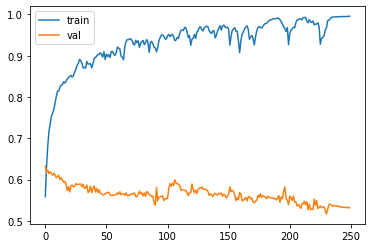

Epoch 1/250
77/78 [============================>.] - ETA: 0s - loss: 2.2305 - acc: 0.5877
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 2.2765 - acc: 0.5822 - val_loss: 1.7686 - val_acc: 0.6049
Epoch 2/250
76/78 [============================>.] - ETA: 0s - loss: 1.4146 - acc: 0.6065
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.4166 - acc: 0.6067 - val_loss: 1.3420 - val_acc: 0.6276
Epoch 3/250
77/78 [============================>.] - ETA: 0s - loss: 1.0183 - acc: 0.6230
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.0273 - acc: 0.6195 - val_loss: 1.2092 - val_acc: 0.6272
Epoch 4/250
78/78 [==============================] - ETA: 0s - loss: 0.9177 - acc: 0.6444
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.9177 - acc: 0.64

77/78 [============================>.] - ETA: 0s - loss: 0.4622 - acc: 0.8093
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4606 - acc: 0.8112 - val_loss: 1.0919 - val_acc: 0.5906
Epoch 33/250
78/78 [==============================] - ETA: 0s - loss: 0.4460 - acc: 0.8164
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4460 - acc: 0.8164 - val_loss: 1.1065 - val_acc: 0.5806
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.4382 - acc: 0.8252
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4407 - acc: 0.8244 - val_loss: 1.1155 - val_acc: 0.5786
Epoch 35/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4449 - acc: 0.8250
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4454 - acc: 0.8260 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.3348 - acc: 0.8783
Epoch 00063: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3319 - acc: 0.8807 - val_loss: 1.2985 - val_acc: 0.5601
Epoch 64/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3263 - acc: 0.8821
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3268 - acc: 0.8827 - val_loss: 1.3379 - val_acc: 0.5478
Epoch 65/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3274 - acc: 0.8846
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3258 - acc: 0.8855 - val_loss: 1.3170 - val_acc: 0.5513
Epoch 66/250
77/78 [============================>.] - ETA: 0s - loss: 0.3686 - acc: 0.8555
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3670 - acc: 0.8570 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.2308 - acc: 0.9264
Epoch 00094: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2280 - acc: 0.9277 - val_loss: 1.5691 - val_acc: 0.5505
Epoch 95/250
78/78 [==============================] - ETA: 0s - loss: 0.2023 - acc: 0.9401
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2023 - acc: 0.9401 - val_loss: 1.6084 - val_acc: 0.5412
Epoch 96/250
77/78 [============================>.] - ETA: 0s - loss: 0.2225 - acc: 0.9334
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2208 - acc: 0.9341 - val_loss: 1.5695 - val_acc: 0.5409
Epoch 97/250
77/78 [============================>.] - ETA: 0s - loss: 0.2461 - acc: 0.9164
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2443 - acc: 0.9172 - val_

76/78 [============================>.] - ETA: 0s - loss: 0.1809 - acc: 0.9453
Epoch 00125: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1787 - acc: 0.9462 - val_loss: 1.6496 - val_acc: 0.5590
Epoch 126/250
77/78 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9330
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2027 - acc: 0.9337 - val_loss: 1.6486 - val_acc: 0.5671
Epoch 127/250
78/78 [==============================] - ETA: 0s - loss: 0.1990 - acc: 0.9405
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1990 - acc: 0.9405 - val_loss: 1.7466 - val_acc: 0.5428
Epoch 128/250
78/78 [==============================] - ETA: 0s - loss: 0.1950 - acc: 0.9393
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1950 - acc: 0.9393 - v

75/78 [===========================>..] - ETA: 0s - loss: 0.2268 - acc: 0.9262
Epoch 00156: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.2388 - acc: 0.9229 - val_loss: 1.6890 - val_acc: 0.5544
Epoch 157/250
76/78 [============================>.] - ETA: 0s - loss: 0.2048 - acc: 0.9301
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.2025 - acc: 0.9313 - val_loss: 1.7258 - val_acc: 0.5513
Epoch 158/250
76/78 [============================>.] - ETA: 0s - loss: 0.1916 - acc: 0.9433
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.1894 - acc: 0.9442 - val_loss: 1.6883 - val_acc: 0.5675
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.1614 - acc: 0.9558
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.1668 - acc: 0.9542 - v

77/78 [============================>.] - ETA: 0s - loss: 0.3617 - acc: 0.8787
Epoch 00187: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3605 - acc: 0.8787 - val_loss: 1.3311 - val_acc: 0.5698
Epoch 188/250
78/78 [==============================] - ETA: 0s - loss: 0.3551 - acc: 0.8819
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3551 - acc: 0.8819 - val_loss: 1.3153 - val_acc: 0.5744
Epoch 189/250
75/78 [===========================>..] - ETA: 0s - loss: 0.3583 - acc: 0.8788
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3514 - acc: 0.8807 - val_loss: 1.2934 - val_acc: 0.5786
Epoch 190/250
78/78 [==============================] - ETA: 0s - loss: 0.3887 - acc: 0.8670
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3887 - acc: 0.8670 - v

76/78 [============================>.] - ETA: 0s - loss: 0.3329 - acc: 0.8939
Epoch 00218: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3282 - acc: 0.8959 - val_loss: 1.3687 - val_acc: 0.5821
Epoch 219/250
76/78 [============================>.] - ETA: 0s - loss: 0.3466 - acc: 0.8902
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3421 - acc: 0.8919 - val_loss: 1.3293 - val_acc: 0.5906
Epoch 220/250
76/78 [============================>.] - ETA: 0s - loss: 0.3272 - acc: 0.8960
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3237 - acc: 0.8975 - val_loss: 1.3296 - val_acc: 0.5914
Epoch 221/250
74/78 [===========================>..] - ETA: 0s - loss: 0.3138 - acc: 0.8986
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3064 - acc: 0.9020 - v

78/78 [==============================] - ETA: 0s - loss: 0.3528 - acc: 0.8779
Epoch 00249: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.3528 - acc: 0.8779 - val_loss: 1.3114 - val_acc: 0.5995
Epoch 250/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4742 - acc: 0.8446
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4642 - acc: 0.8485 - val_loss: 1.2467 - val_acc: 0.6033


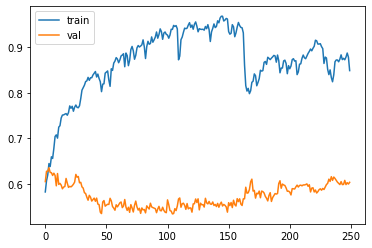

Epoch 1/250
78/78 [==============================] - ETA: 0s - loss: 1.0869 - acc: 0.5834- ETA: 0s - loss: 1.1065 - acc: 0.59
Epoch 00001: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 1.0869 - acc: 0.5834 - val_loss: 0.9256 - val_acc: 0.6349
Epoch 2/250
74/78 [===========================>..] - ETA: 0s - loss: 0.8404 - acc: 0.6229
Epoch 00002: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.8323 - acc: 0.6280 - val_loss: 0.8692 - val_acc: 0.6392
Epoch 3/250
78/78 [==============================] - ETA: 0s - loss: 0.7836 - acc: 0.6336
Epoch 00003: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.7836 - acc: 0.6336 - val_loss: 0.8578 - val_acc: 0.6326
Epoch 4/250
77/78 [============================>.] - ETA: 0s - loss: 0.7418 - acc: 0.6546
Epoch 00004: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 

Epoch 32/250
78/78 [==============================] - ETA: 0s - loss: 0.6141 - acc: 0.7244
Epoch 00032: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.6141 - acc: 0.7244 - val_loss: 0.8749 - val_acc: 0.6426
Epoch 33/250
74/78 [===========================>..] - ETA: 0s - loss: 0.6124 - acc: 0.7230
Epoch 00033: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.6044 - acc: 0.7280 - val_loss: 0.8677 - val_acc: 0.6461
Epoch 34/250
74/78 [===========================>..] - ETA: 0s - loss: 0.6233 - acc: 0.7128
Epoch 00034: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.6139 - acc: 0.7180 - val_loss: 0.8638 - val_acc: 0.6469
Epoch 35/250
77/78 [============================>.] - ETA: 0s - loss: 0.6107 - acc: 0.7183
Epoch 00035: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.6086 - acc: 

Epoch 64/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5112 - acc: 0.7850
Epoch 00064: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5047 - acc: 0.7903 - val_loss: 0.9332 - val_acc: 0.6515
Epoch 65/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5026 - acc: 0.7917
Epoch 00065: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4971 - acc: 0.7971 - val_loss: 0.9557 - val_acc: 0.6507
Epoch 66/250
78/78 [==============================] - ETA: 0s - loss: 0.4966 - acc: 0.7939
Epoch 00066: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4966 - acc: 0.7939 - val_loss: 0.9578 - val_acc: 0.6449
Epoch 67/250
77/78 [============================>.] - ETA: 0s - loss: 0.5109 - acc: 0.7857
Epoch 00067: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5099 - acc: 

76/78 [============================>.] - ETA: 0s - loss: 0.5220 - acc: 0.7763
Epoch 00095: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5188 - acc: 0.7794 - val_loss: 0.9819 - val_acc: 0.6638
Epoch 96/250
78/78 [==============================] - ETA: 0s - loss: 0.5105 - acc: 0.7806
Epoch 00096: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5105 - acc: 0.7806 - val_loss: 0.9653 - val_acc: 0.6577
Epoch 97/250
78/78 [==============================] - ETA: 0s - loss: 0.5127 - acc: 0.7814
Epoch 00097: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5127 - acc: 0.7814 - val_loss: 0.9655 - val_acc: 0.6596
Epoch 98/250
78/78 [==============================] - ETA: 0s - loss: 0.5070 - acc: 0.7822
Epoch 00098: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5070 - acc: 0.7822 - val_

75/78 [===========================>..] - ETA: 0s - loss: 0.5808 - acc: 0.7275
Epoch 00126: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5777 - acc: 0.7300 - val_loss: 1.0231 - val_acc: 0.6353
Epoch 127/250
74/78 [===========================>..] - ETA: 0s - loss: 0.5836 - acc: 0.7183- ETA: 0s - loss: 0.5349 - acc: 0.7
Epoch 00127: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5777 - acc: 0.7228 - val_loss: 1.0068 - val_acc: 0.6318
Epoch 128/250
77/78 [============================>.] - ETA: 0s - loss: 0.5856 - acc: 0.7163
Epoch 00128: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5850 - acc: 0.7164 - val_loss: 1.0239 - val_acc: 0.6376
Epoch 129/250
78/78 [==============================] - ETA: 0s - loss: 0.5599 - acc: 0.7312
Epoch 00129: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/st

Epoch 157/250
78/78 [==============================] - ETA: 0s - loss: 0.5707 - acc: 0.7368
Epoch 00157: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5707 - acc: 0.7368 - val_loss: 1.0168 - val_acc: 0.6415
Epoch 158/250
76/78 [============================>.] - ETA: 0s - loss: 0.5240 - acc: 0.7640
Epoch 00158: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5266 - acc: 0.7626 - val_loss: 1.0487 - val_acc: 0.6245
Epoch 159/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5376 - acc: 0.7529
Epoch 00159: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.5345 - acc: 0.7553 - val_loss: 1.0315 - val_acc: 0.6330
Epoch 160/250
75/78 [===========================>..] - ETA: 0s - loss: 0.5775 - acc: 0.7379
Epoch 00160: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.5726 - a

Epoch 188/250
75/78 [===========================>..] - ETA: 0s - loss: 0.4932 - acc: 0.7763
Epoch 00188: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4852 - acc: 0.7814 - val_loss: 1.1135 - val_acc: 0.6099
Epoch 189/250
77/78 [============================>.] - ETA: 0s - loss: 0.4648 - acc: 0.7902
Epoch 00189: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4626 - acc: 0.7915 - val_loss: 1.0608 - val_acc: 0.6288
Epoch 190/250
77/78 [============================>.] - ETA: 0s - loss: 0.4690 - acc: 0.7881
Epoch 00190: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4664 - acc: 0.7899 - val_loss: 1.1187 - val_acc: 0.6253
Epoch 191/250
76/78 [============================>.] - ETA: 0s - loss: 0.4529 - acc: 0.7965
Epoch 00191: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4467 - a

74/78 [===========================>..] - ETA: 0s - loss: 0.4364 - acc: 0.8074
Epoch 00219: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 17ms/step - loss: 0.4281 - acc: 0.8124 - val_loss: 1.1589 - val_acc: 0.6403
Epoch 220/250
78/78 [==============================] - ETA: 0s - loss: 0.4311 - acc: 0.8220
Epoch 00220: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4311 - acc: 0.8220 - val_loss: 1.1915 - val_acc: 0.6234
Epoch 221/250
76/78 [============================>.] - ETA: 0s - loss: 0.4137 - acc: 0.8236
Epoch 00221: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4090 - acc: 0.8256 - val_loss: 1.1565 - val_acc: 0.6218
Epoch 222/250
78/78 [==============================] - ETA: 0s - loss: 0.4019 - acc: 0.8224
Epoch 00222: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.4019 - acc: 0.8224 - v

76/78 [============================>.] - ETA: 0s - loss: 0.3530 - acc: 0.8516
Epoch 00250: saving model to Model\lstm_model5.h5
78/78 [==============================] - 1s 18ms/step - loss: 0.3471 - acc: 0.8550 - val_loss: 1.3221 - val_acc: 0.6045


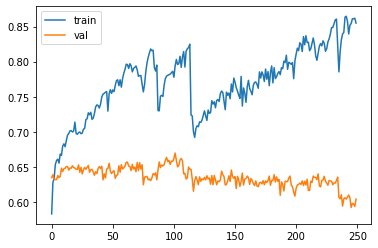

In [8]:
for train_name in range(0,50):
  df = pd.read_csv(datalist[train_name])
  df = signal_to_catagorical(df)

  x_train = df[['MACD-SL_n','DMI_n','Close_n']].values
  x_train = add_shift_day(x_train,30)
  y_train = df['Signal']
  y_train = to_categorical(y_train)
  y_train = y_train.tolist()
  del y_train[0:30]
  y_train = np.array(y_train)

#   r = random.randint(0,4)
  val = val_list[0]
  val = signal_to_catagorical(val)
  x_val = val[['MACD-SL_n','DMI_n','Close_n']].values
  x_val = add_shift_day(x_val,30)
  y_val = val['Signal']
  y_val = to_categorical(y_val)
  y_val = y_val.tolist()
  del y_val[0:30]
  y_val = np.array(y_val)

  h = model.fit(x_train, y_train, epochs=250,validation_data=(x_val,y_val),callbacks=[checkpoint],shuffle=False)
  plt.plot(h.history['acc'])
  plt.plot(h.history['val_acc'])
  plt.legend(['train', 'val'])
  plt.show()

In [6]:
for test in test_list:
  # print(test)
  test = signal_to_catagorical(test)
#   print(test)
  x_test = test[['MACD-SL_n','DMI_n','Close_n']].values
  x_test = add_shift_day(x_test,30)
  y_test = test['Signal'].values
  y_test = y_test.tolist()
  del y_test[0:30]
  y_test = np.array(y_test)

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred,axis = -1)
  y_test = y_test.astype('int64')
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix")
  print(cm)

Confusion Matrix
[[ 246    0   70]
 [   5   62  243]
 [ 912   93 1362]]
Confusion Matrix
[[ 119    2  105]
 [   0   40  218]
 [ 274  281 1450]]
Confusion Matrix
[[   6   31   49]
 [   0   52   32]
 [  65 1149 1293]]
Confusion Matrix
[[ 221    6  253]
 [  54   36  266]
 [ 544  175 1522]]
Confusion Matrix
[[ 162    1  104]
 [  22   63  304]
 [ 507  215 1489]]


In [25]:
model.save('Model/Lstm_model5.h5')